<h1>1.전처리 및 데이터 병합<h1>

In [406]:
import os
import re
import numpy as np
import pandas as pd



<h3>NCAA_STAT<h3>

In [407]:
#NLoad DATA: NCAA_stat 

# import os
# import re
# import pandas as pd

# 파일 경로
folder_path_ncaa = r"C:\Users\31ind\Desktop\데이터사이언티스트로가는길\성균관대SIS대학원\재영논문자료\데이터수집_크롤링\NCAA_stat"

# 해당 폴더에 있는 모든 파일의 이름을 리스트에 저장
file_list_ncaa = os.listdir(folder_path_ncaa)

# 각 파일을 각각 읽어들여 병합
data_frames = []  # 각 파일에서 읽은 데이터프레임을 저장할 리스트
for file in file_list_ncaa:
    if file.endswith('.csv'):  # CSV 파일만 읽어오기
        file_path = os.path.join(folder_path_ncaa, file)
        try:
            temp_data = pd.read_csv(file_path, encoding='latin1')  # 데이터 로드, 인코딩을 'latin1'으로 설정
            data_frames.append(temp_data)  # 읽은 데이터프레임을 리스트에 추가
        except Exception as e:
            print(f'Error occurred while processing {file}: {e}')
            continue

# 모든 데이터프레임을 병합
ncaa_stat = pd.concat(data_frames, ignore_index=True)

# 병합 결과 확인
print(ncaa_stat.head())

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24596\1487458159.py:19: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_data = pd.read_csv(file_path, encoding='latin1')  # 데이터 로드, 인코딩을 'latin1'으로 설정
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24596\1487458159.py:19: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_data = pd.read_csv(file_path, encoding='latin1')  # 데이터 로드, 인코딩을 'latin1'으로 설정
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24596\1487458159.py:19: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_data = pd.read_csv(file_path, encoding='latin1')  # 데이터 로드, 인코딩을 'latin1'으로 설정
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24596\1487458159.py:19: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_data = pd.read

    Season          School          Player Class Pos Height  \
0  1985-86  north-carolina  Brad Daugherty    SR   C    7-0   
1  1985-86  north-carolina     Kenny Smith    JR   G    6-3   
2  1985-86  north-carolina      Steve Hale    SR   G    6-4   
3  1985-86  north-carolina        Joe Wolf    JR   F   6-11   
4  1985-86  north-carolina       Jeff Lebo    FR   G    6-2   

                      Summary  Rk_per_game  G_per_game  GS_per_game  \
0  20.2 Pts, 9.0 Reb, 1.8 Ast            1        34.0         34.0   
1  12.0 Pts, 2.2 Reb, 6.2 Ast            2        34.0         34.0   
2  11.3 Pts, 3.2 Reb, 4.9 Ast            3        31.0         31.0   
3  10.0 Pts, 6.6 Reb, 2.1 Ast            4        34.0         34.0   
4   9.2 Pts, 2.5 Reb, 4.0 Ast            5        34.0         10.0   

   MP_per_game  FG_per_game  FGA_per_game  FG%_per_game  2P_per_game  \
0         32.0          8.4          12.9         0.648          NaN   
1         32.6          4.8           9.4         

In [687]:
#ncaa_stat 복사본 생성
ncaa_stat_new = ncaa_stat.copy()
# 원래의 컬럼 순서를 복사
new_order = ncaa_stat_new.columns.tolist()

# 각 컬럼 위치 변경
new_order.insert(new_order.index('Player') + 1, new_order.pop(new_order.index('#')))
new_order.insert(new_order.index('Height') + 1, new_order.pop(new_order.index('Weight')))
new_order.insert(new_order.index('School') + 1, new_order.pop(new_order.index('Hometown')))
new_order.insert(new_order.index('Hometown') + 1, new_order.pop(new_order.index('High School')))
new_order.insert(new_order.index('Summary') + 1, new_order.pop(new_order.index('RSCI Top 100')))

# 새로운 컬럼 순서를 데이터프레임에 적용
ncaa_stat_new = ncaa_stat_new[new_order]

# 결과 확인
print(ncaa_stat_new.tail())



         Season School        Hometown                High School  \
160572  2021-22  iupui  Prattville, AL           Robert E. Lee HS   
160573  2021-22  iupui     Wichita, KS         Wichita North (KS)   
160574  2021-22  iupui  Lewisville, TX  Sunrise Christian Academy   
160575  2021-22  iupui             NaN     The Skill Factory (GA)   
160576  2021-22  iupui     Chicago, IL             Hillcrest (IL)   

                Player     # Class Pos Height  Weight  \
160572    Azariah Seay  12.0    SR   G    6-4   195.0   
160573  Jonah Carrasco  24.0    SR   F    6-9   220.0   
160574       KJ Pruitt   1.0    FR   G    6-4   203.0   
160575  Dimitar Pandev  33.0    SR   F   6-10   225.0   
160576    Bobby Harvey   2.0    SR   G    6-3   200.0   

                          Summary RSCI Top 100  Rk_per_game  G_per_game  \
160572  6.4 Pts, 2.9 Reb, 0.7 Ast          NaN            5        17.0   
160573  4.4 Pts, 3.8 Reb, 0.4 Ast          NaN            9        19.0   
160574  5.0 Pts, 

In [409]:
pd.set_option('display.max_rows', None)

In [410]:
#컬럼 별 결측치 check

missing_counts = ncaa_stat_new.isnull().sum()
missing_ratios = (missing_counts / len(ncaa_stat_new)) * 100
print(missing_ratios)

Season              0.000000
School              0.000000
Hometown           43.475716
High School        70.293380
Player              0.000000
#                  40.144604
Class               0.675688
Pos                 1.183233
Height              0.868119
Weight             39.957155
Summary             0.260311
RSCI Top 100       95.691164
Rk_per_game         0.000000
G_per_game          0.239760
GS_per_game        12.452593
MP_per_game        12.061503
FG_per_game         0.267784
FGA_per_game        0.269653
FG%_per_game        2.679089
2P_per_game         2.555783
2PA_per_game        2.565747
2P%_per_game        6.576284
3P_per_game         2.548933
3PA_per_game        2.558897
3P%_per_game       24.558312
FT_per_game         0.279617
FTA_per_game        0.282108
FT%_per_game        8.993193
TRB_per_game        0.271521
AST_per_game        0.278994
STL_per_game        0.305772
BLK_per_game        0.315114
TOV_per_game       13.295179
PF_per_game        11.468641
PTS_per_game  

In [411]:
#불필요한 컬럼 삭제처리: 중복되는 값, 크롤링 과정에서의 불필요한 정보 등

ncaa_stat_new = ncaa_stat_new.drop(["Rk_per_game", "Rk_totals", "Rk_per_min", "Rk_per_poss", "RSCI Top 100",
                                    "Rk_advanced", "High School", "Hometown", "#", "Summary", 'GS_totals',
                                    'G_per_game', 'GS_per_game', 'MP_per_game', 'FG_per_game', 'FGA_per_game', 
                                    'FG%_per_game', '2P_per_game', '2PA_per_game', '2P%_per_game', '3P_per_game', 
                                    '3PA_per_game', '3P%_per_game', 'FT_per_game', 'FTA_per_game', 'FT%_per_game', 
                                    'ORB_per_game', 'DRB_per_game','TRB_per_game', 'AST_per_game', 'STL_per_game', 
                                    'BLK_per_game', 'TOV_per_game', 'PF_per_game', 'PTS_per_game', "G_per_min", 
                                    "GS_per_min", 'MP_per_min', 'FG%_per_min', '2P%_per_min', '3P%_per_min', 'FT%_per_min',
                                    "G_advanced", "GS_advanced",'MP_advanced', "_advanced", "G_per_poss", "GS_per_poss", 
                                    'MP_per_poss', "_per_poss", 'FG%_per_poss', '2P%_per_poss', '3P%_per_poss','FT%_per_poss'], axis=1)


#학교명 형식 수정.
ncaa_stat_new['School'] = ncaa_stat_new['School'].str.replace('-', '_')

In [412]:
#선수별 ID생성: 선수이름+학교

ncaa_stat_new['Player_ID'] = ncaa_stat_new['Player'] + '_' + ncaa_stat_new['School']
ncaa_stat_new['Player_ID'] = ncaa_stat_new.apply(lambda row: row['Player_ID'] + ' _None' if pd.isna(row['School']) else row['Player_ID'], axis=1)
player_id_col = ncaa_stat_new.pop('Player_ID')
ncaa_stat_new.insert(0, 'Player_ID', player_id_col)

In [413]:
#3P%_totals 결측치 0 대체(3점슛을 한 번도 시도하지 않은 선수가 결측치로 되어 있음)
ncaa_stat_new['3P%_totals'].fillna(0, inplace=True)

In [415]:
#'Height'컬럼 '피트-인치' --> '인치'로 변환


# import pandas as pd

# "Height" 컬럼을 문자열로 변환
ncaa_stat_new['Height'] = ncaa_stat_new['Height'].astype(str)

# "0-0" 또는 "00-00" 값을 결측값으로 처리
ncaa_stat_new['Height'] = ncaa_stat_new['Height'].apply(lambda x: None if x in ['0-0', '00-00'] else x)

# 피트와 인치를 인치 단위로 변환하는 함수
def height_to_inches(height_str):
    # 이미 숫자로 표현된 경우 그대로 반환
     if re.match(r'^\d+(\.\d+)?$', height_str):
        return float(height_str)
    
# 피트와 인치를 추출
     match = re.match(r'(\d+)[-](\d+)', height_str)
     if match:
        feet = float(match.group(1))
        inches = float(match.group(2))
        if len(match.group(1)) == 1:  # 피트가 한 자릿수인 경우 '0'을 추가하여 두 자릿수로 변환
            feet = float('0' + match.group(1))
        return feet * 12 + inches
    
    # 매칭되지 않는 경우 NaN 반환
     return float('9999999999999')

# "Height_inch" 컬럼에 변환 결과 저장
ncaa_stat_new['Height_inch'] = ncaa_stat_new['Height'].apply(height_to_inches)

# "Height_inch" 컬럼을 "Height" 컬럼 다음에 위치시킴
ncaa_stat_new = ncaa_stat_new[['Height'] + [col for col in ncaa_stat_new.columns if col != 'Height']]

# 결과 확인
print(ncaa_stat_new[['Height', 'Height_inch']].head())


  Height  Height_inch
0    7-0         84.0
1    6-3         75.0
2    6-4         76.0
3   6-11         83.0
4    6-2         74.0


In [416]:
#컬럼 별 결측치 재확인

missing_counts = ncaa_stat_new.isnull().sum()
missing_ratios = (missing_counts / len(ncaa_stat_new)) * 100
print(missing_ratios)

Height             0.000000
Player_ID          0.000000
Season             0.000000
School             0.000000
Player             0.000000
Class              0.675688
Pos                1.183233
Weight            39.957155
G_totals           0.239760
MP_totals         12.035970
FG_totals          0.240383
FGA_totals         0.242874
FG%_totals         2.679089
2P_totals          2.529628
2PA_totals         2.538969
2P%_totals         6.576284
3P_totals          2.522154
3PA_totals         2.532119
3P%_totals         0.000000
FT_totals          0.252215
FTA_totals         0.255952
FT%_totals         8.993193
TRB_totals         0.242874
AST_totals         0.249724
STL_totals         0.276503
BLK_totals         0.285844
TOV_totals        13.270892
PF_totals         11.443731
PTS_totals         0.227305
FG_per_min        12.224042
FGA_per_min       12.227156
2P_per_min        13.781550
2PA_per_min       13.789646
3P_per_min        13.780305
3PA_per_min       13.788401
FT_per_min        12

In [417]:
#화면 출력 옵션_reset
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [418]:
#불필요한 컬럼 삭제처리 및 컬럼 순서 변경처리

ncaa_stat_new = ncaa_stat_new.drop(['Height'], axis=1)

new_order = ['Player_ID', 'Season', 'School', 'Player', 'Class', 'Pos', 'Height_inch', 'Weight',
              'G_totals', 'MP_totals', 'FG_totals', 'FGA_totals', 'FG%_totals', '2P_totals', 
              '2PA_totals', '2P%_totals', '3P_totals', '3PA_totals', '3P%_totals', 'FT_totals', 'FTA_totals', 
              'FT%_totals', 'ORB_totals', 'DRB_totals','TRB_totals', 'AST_totals', 'STL_totals', 'BLK_totals', 
              'TOV_totals', 'PF_totals', 'PTS_totals', 
              'FG_per_min', 'FGA_per_min',  '2P_per_min', '2PA_per_min',  
              '3P_per_min', '3PA_per_min',  'FT_per_min', 'FTA_per_min',  
              'TRB_per_min', 'AST_per_min', 'STL_per_min', 'BLK_per_min', 'TOV_per_min', 'PF_per_min', 
              'PTS_per_min', 
              'TS%_advanced', 'eFG%_advanced', '3PAr_advanced', 'FTr_advanced', 'PProd_advanced', 
              'ORB%_advanced', 'DRB%_advanced', 'TRB%_advanced', 'AST%_advanced', 'OBPM_advanced', 
              'DBPM_advanced', 'BPM_advanced', 'STL%_advanced', 'BLK%_advanced', 'TOV%_advanced', 
              'USG%_advanced',  'OWS_advanced', 'DWS_advanced', 'WS_advanced', 'WS/40_advanced', 'PER_advanced',
               'FG_per_poss', 'FGA_per_poss', '2P_per_poss', '2PA_per_poss', 
              '3P_per_poss', '3PA_per_poss', 'FT_per_poss', 'FTA_per_poss',  
              'TRB_per_poss', 'AST_per_poss', 'STL_per_poss', 'BLK_per_poss', 'TOV_per_poss', 'PF_per_poss', 
              'PTS_per_poss', 'ORtg_per_poss', 'DRtg_per_poss'
              ]  # 변경하고 싶은 순서대로 컬럼명을 리스트에 저장
ncaa_stat_new = ncaa_stat_new[new_order]  # 데이터프레임의 컬럼 순서를 변경


In [419]:
#Save the data as a file

# ncaa_stat_new.to_excel("ncaa_stat_new.xlsx", index=False)
# ncaa_stat_new.to_csv("ncaa_stat_new.csv", index=False)


In [420]:
#ncaa_stat_new데이터 파일 분할 저장

# # import pandas as pd

# # 1단계: Excel 파일을 CSV 파일로 변환하는 함수
# def convert_excel_to_csv(file_path, output_csv_path, sheet_name=0):
#     df = pd.read_excel(file_path, sheet_name=sheet_name)
#     df.to_csv(output_csv_path, index=False)
#     print(f"Excel to CSV conversion complete: {output_csv_path}")

# # 2단계: CSV 파일을 분할하는 함수
# def split_csv_file(file_path, output_folder, chunk_size=10000):
#     iterator = pd.read_csv(file_path, chunksize=chunk_size)
#     for i, chunk in enumerate(iterator):
#         output_file = f"{output_folder}/chunk_{i}.csv"
#         chunk.to_csv(output_file, index=False)
#         print(f"Chunk {i} saved as {output_file}")

# # 함수 사용 예시
# excel_file_path = "C:\\Users\\31ind\\ncaa_stat_new.xlsx"
# temp_csv_path = "C:\\Users\\31ind\\ncaa_stat_new.csv"
# output_folder_path = "C:\\Users\\31ind\\ncaa_stat_new_split"

# # Excel 파일을 CSV로 변환
# convert_excel_to_csv(excel_file_path, temp_csv_path)

# # CSV 파일을 분할
# split_csv_file(temp_csv_path, output_folder_path)



<h3>COLLEGE MAPPING<h3>

In [421]:
#Load DATA

# import os
# import re
# import pandas as pd

# 파일 경로
file_path = "C:\\Users\\31ind\\Desktop\\데이터사이언티스트로가는길\\성균관대SIS대학원\\재영논문자료\\데이터수집_크롤링\\college_mapping.xlsx"

# 엑셀 파일 읽어오기
college_mapping = pd.read_excel(file_path)

# 데이터프레임의 처음 몇 행을 출력하여 확인
print(college_mapping.head())

                  NBA draft           NCAA   비고
0                   Alabama        alabama  NaN
1  Alabama State University  alabama_state  NaN
2                   Arizona        arizona  NaN
3             Arizona State  arizona_state  NaN
4                  Arkansas       arkansas  NaN


In [422]:
college_mapping = college_mapping.rename(columns={"NBA draft": "NBA"})
college_mapping = college_mapping.drop(college_mapping.columns[2], axis=1)
college_mapping

,NBA,NCAA
0,Alabama,alabama
1,Alabama State University,alabama_state
2,Arizona,arizona
3,Arizona State,arizona_state
4,Arkansas,arkansas
...,...,...
237,Meridian Community College,not_NCAA_Division_1
238,Midland College,not_NCAA_Division_1
239,Globe Tech Junior College,not_NCAA_Division_1
240,Siena College,siena


<h3>Career Length (target variable포함)<h3>

In [423]:
# Load DATA

# import os
# import re
# import pandas as pd

# 파일 경로
file_path = "C:\\Users\\31ind\\Desktop\\데이터사이언티스트로가는길\\성균관대SIS대학원\\재영논문자료\\데이터수집_크롤링\\NBA_Player_CareerLength_1990_2021_Inactive_modified.csv"

# 엑셀 파일 읽어오기
CareerLength = pd.read_csv(file_path, encoding='CP949')

# 데이터프레임의 처음 몇 행을 출력하여 확인
print(CareerLength.head())

                 Name                            Twitter Instagram  \
0     Derrick Coleman    https://twitter.com/44TheLegend       NaN   
1         Gary Payton     https://twitter.com/GaryPayton       NaN   
2  Mahmoud Abdul-Rauf                                NaN       NaN   
3        Dennis Scott  https://twitter.com/dennis3dscott       NaN   
4        Kendall Gill     https://twitter.com/kendallg13       NaN   

                           Position Shoots Height_inch Weight_lb Height_cm  \
0          Power Forward and Center   Left     06월 10일     230lb     208cm   
1                       Point Guard  Right     06월 04일     180lb     193cm   
2                       Point Guard  Right     06월 01일     162lb     185cm   
3  Small Forward and Shooting Guard  Right     06월 08일     229lb     203cm   
4  Shooting Guard and Small Forward  Right     06월 05일     195lb     196cm   

  Weight_kg                                           Born  ... College_2  \
0     104kg           June 21, 19

In [424]:
#불필요한 컬럼 삭제 처리.

CareerLength = CareerLength.drop(["Height_inch", "Twitter", "Instagram", "Shoots", "Weight_lb", 
                                  "Born", "Age", "High School"], axis=1)

In [425]:
# #특정컬럼 형식 수정

# CareerLength['Height_inch'] = CareerLength['Height_inch'].str.replace(' ', '-')
# CareerLength['Height_inch'] = CareerLength['Height_inch'].str.replace(r'[월일]', '', regex=True)

In [426]:
#컬럼 별 결측치 비율 확인

missing_counts = CareerLength.isnull().sum()
missing_ratios = (missing_counts / len(CareerLength)) * 100
print(missing_ratios)

Name                0.000000
Position            0.215983
Height_cm           0.143988
Weight_kg           0.143988
College_1          17.782577
College_2          91.000720
College_3          99.856012
College_4          99.928006
Recruiting Rank    72.498200
Draft_team          0.000000
Draft_num           0.000000
Draft_year          0.000000
NBA Debut          14.182865
Experience          0.000000
dtype: float64


In [427]:
# 추출한 샘플의 행과 열 수 카운트
row_count, column_count = CareerLength.shape
row_count, column_count

(1389, 14)

In [428]:
##college변수에 값이 복수일 경우 split(college1,2,3,4) 및 ncaa기준으로 학교mapping
#학교이름 맵핑(nba-ncaa)

CareerLength.insert(5, 'College_ncaa_1', CareerLength['College_1'].map(college_mapping.set_index('NBA')['NCAA']))
CareerLength.insert(7, 'College_ncaa_2', CareerLength['College_2'].map(college_mapping.set_index('NBA')['NCAA']))
CareerLength.insert(9, 'College_ncaa_3', CareerLength['College_3'].map(college_mapping.set_index('NBA')['NCAA']))
CareerLength.insert(17, 'College_ncaa_4', CareerLength['College_4'].map(college_mapping.set_index('NBA')['NCAA']))

In [429]:
#target variable 형식 수정.

CareerLength['Experience'] = CareerLength['Experience'].str.replace(' years', '').str.replace(' year', '')
CareerLength['Experience'] = CareerLength['Experience'].str.replace('Rookie', '0')
CareerLength['Experience'] = CareerLength['Experience'].astype(int)

In [430]:
# "Draft_num" 컬럼에서 숫자 추출하여 새로운 컬럼 생성

# career_length['Draft_pick'] = career_length['Draft_num'].str.extract(r'(\d+)\w+ pick')[0]
CareerLength['Draft_overall'] = CareerLength['Draft_num'].str.extract(r'(\d+)\w+ overall')[0]


# 결과 출력
print(CareerLength[['Draft_overall']])

     Draft_overall
0                1
1                2
2                3
3                4
4                5
...            ...
1384            39
1385            40
1386            55
1387            56
1388            60

[1389 rows x 1 columns]


In [431]:
#불필요한 컬럼 삭제 처리.

CareerLength = CareerLength.drop(["Draft_num"], axis=1)

#단위 삭제 처리.

# 'Weight_kg' 컬럼에서 'kg'를 제거합니다.
CareerLength['Weight_kg'] = CareerLength['Weight_kg'].str.replace('kg', '').astype(float)
# 'Height_cm' 컬럼에서 'cm'를 제거합니다.
CareerLength['Height_cm'] = CareerLength['Height_cm'].str.replace('cm', '').astype(float)

In [432]:
#데이터병합(ncaa_stat+nba_draft)과정에서 발견된 선수누락에 대한 처리

##School_ncaa_1 확인 결과 및 처리
# 1. Frank Mason III(Kansas): Frank Mason(NCAA)-->Frank Mason으로 맞춰 줌
CareerLength['Name'].replace({'Frank Mason III': 'Frank Mason'}, inplace=True)

# 2. Glen Rice Jr.(georgia-tech): Glen Rice (NCAA) --> Glen Rice로 맞춰 줌
CareerLength['Name'].replace({'Glen Rice Jr.': 'Glen Rice'}, inplace=True)

# 3. God Shammgod(providence): nba와 ncaa모두 이상없는데 왜 누락됐지?? 추후 확인!!!!!!!

# 4. James Ennis III(long-beach-state): James Ennis(NCAA) -->James Ennis로 맞춰 줌
CareerLength['Name'].replace({'James Ennis III': 'James Ennis'}, inplace=True)

# 5. Jeff Taylor(Vanderbilt): Jeffery Taylor(NCAA) --> Jeffery Tylor로 맞춰 줌
CareerLength['Name'].replace({'Jeff Taylor': 'Jeffery Taylor'}, inplace=True)

# 6. Maurice Taylor(louisiana-tech): nba쪽 데이터에는 LSU가 있지만 실제로는 미시간 데이터만 존재. 추후 미시간 데이터 잘 가져왔는지 확인!!!!!!!!

# 7. Michael McDonald(utah-valley): Utah-valley의 경우 현재는 Division1이나 당시에는 division1아님. 추후 다른 뉴올리언스 데이터 잘 가져왔는지 확인!!

# 8. Travis Hansen(utah-valley): Utah-valley의 경우 현재는 Division1이나 당시에는 division1아님. 추후 브리검영 데이터 잘 가져왔는지 확인!!!

# 9. Glenn Robinson lll(michigan): Glenn Robinson(ncaa) --> Glenn Robinson으로 맞춰 줌.
CareerLength['Name'].replace({'Glenn Robinson III': 'Glenn Robinson'}, inplace=True)
#Glenn Robinson(perdue)도 있음. Glenn Robinson III(michigan)의 아빠

##School_ncaa_2 전수조사 결과 및 처리
#1. David Young --> Dave Young:ncaa에서의 표기법으로 맞춰 줌.
# ' David Young(nba)'를 'Dave Young(ncaa)'로 변경
CareerLength['Name'].replace({'David Young': 'Dave Young'}, inplace=True)

#2. Kebu Stewart: 이 선수의 소속대학이었던 cal-state-bakersfeild가 현재는 division1이지만 이 선수가 소속되었던 당시에는 division1이 아니었음-->nba_draft데이터에서 두 번째 학교를 Not_division1으로 수정.
# Kebu Stewart는 Nevada-Las Vegas (UNLV)와 cal-state-bakersfield 소속이었으나
#cal-state-bakersfield의 경우 현재는 division1이라 전처리된 데이터에서는 division1으로 처리되었지만 해당 선수가 뛰었던 시기에는 division2였고 
#이에 따라 ncaa 데이터에는 UNLV시절 데이터만 있음. 
#데이터에 별도로 Not_division1으로 처리!!
CareerLength.loc[(CareerLength['Name'] == 'Kebu Stewart') & (CareerLength['College_ncaa_2'] == 'cal-state-bakersfield'), 'College_ncaa_2'] = 'not_NCAA_Division1'

#3. Patrick Ewing --> Pat Ewing:ncaa에서의 표기법으로 맞춰 줌.
# 'Patrick Ewing(nba)'를 'Pat Ewing(ncaa)'으로 변경
CareerLength['Name'].replace({'Patrick Ewing': 'Pat Ewing'}, inplace=True)

#4. Wesley Johnson --> Wes Johnson:ncaa에서의 표기법으로 맞춰 줌.
# 'Wesley Johnson(nba)'을 'Wes Johnson(ncaa)'으로 변경
CareerLength['Name'].replace({'Wesley Johnson': 'Wes Johnson'}, inplace=True)



In [433]:
#특정컬럼 형식 수정
CareerLength['Name'] = CareerLength['Name'].astype(str)  # 'Name'을 문자열로 변환
CareerLength['College_ncaa_1'] = CareerLength['College_ncaa_1'].astype(str)  # 'School'을 문자열로 변환
CareerLength['College_ncaa_2'] = CareerLength['College_ncaa_2'].astype(str)  # 'School'을 문자열로 변환
CareerLength['College_ncaa_3'] = CareerLength['College_ncaa_3'].astype(str)  # 'School'을 문자열로 변환
CareerLength['College_ncaa_4'] = CareerLength['College_ncaa_4'].astype(str)  # 'School'을 문자열로 변환


#값 형태 수정
CareerLength['College_ncaa_1'] = CareerLength['College_ncaa_1'].str.replace('-', '_')
CareerLength['College_ncaa_2'] = CareerLength['College_ncaa_2'].str.replace('-', '_')
CareerLength['College_ncaa_3'] = CareerLength['College_ncaa_3'].str.replace('-', '_')
CareerLength['College_ncaa_4'] = CareerLength['College_ncaa_4'].str.replace('-', '_')

In [434]:
#선수id생성: 선수이름+학교명(복수의 학교에 소속되었던 선수들은 각각의 학교별로 id생성)

CareerLength['Player_ID_1'] = CareerLength['Name'] + '_' + CareerLength['College_ncaa_1']
CareerLength['Player_ID_1'] = CareerLength.apply(lambda row: row['Player_ID_1'] + ' _None' if pd.isna(row['College_ncaa_1']) else row['Player_ID_1'], axis=1)
player_id_col = CareerLength.pop('Player_ID_1')
CareerLength.insert(0, 'Player_ID_1', player_id_col)


CareerLength['Player_ID_2'] = CareerLength['Name'] + '_' + CareerLength['College_ncaa_2']
CareerLength['Player_ID_2'] = CareerLength.apply(lambda row: row['Player_ID_2'] + ' _None' if pd.isna(row['College_ncaa_2']) else row['Player_ID_2'], axis=1)
player_id_col = CareerLength.pop('Player_ID_2')
CareerLength.insert(1, 'Player_ID_2', player_id_col)


CareerLength['Player_ID_3'] = CareerLength['Name'] + '_' + CareerLength['College_ncaa_3']
CareerLength['Player_ID_3'] = CareerLength.apply(lambda row: row['Player_ID_3'] + ' _None' if pd.isna(row['College_ncaa_3']) else row['Player_ID_3'], axis=1)
player_id_col = CareerLength.pop('Player_ID_3')
CareerLength.insert(2, 'Player_ID_3', player_id_col)



CareerLength['Player_ID_4'] = CareerLength['Name'] + '_' + CareerLength['College_ncaa_4']
CareerLength['Player_ID_4'] = CareerLength.apply(lambda row: row['Player_ID_4'] + ' _None' if pd.isna(row['College_ncaa_4']) else row['Player_ID_4'], axis=1)
player_id_col = CareerLength.pop('Player_ID_4')
CareerLength.insert(3, 'Player_ID_4', player_id_col)


In [435]:
#ncaa_stat_new + Careerlength 데이터셋을 선수id와 학교명을 key값으로 병합. 


# Career length의 "Name"과 "College_ncaa_1"의 값을 기준으로 Ncaa_stat의 "Player", "School"이 일치하는 데이터만 추출
merged_data_1 = pd.merge(ncaa_stat_new, CareerLength, left_on=["Player_ID", "School"], right_on=["Player_ID_1", "College_ncaa_1"], how='inner')

# Career length의 "Name"과 "College_ncaa_1"의 값을 기준으로 Ncaa_stat의 "Player", "School"이 일치하는 데이터만 추출
merged_data_2 = pd.merge(ncaa_stat_new, CareerLength, left_on=["Player_ID", "School"], right_on=["Player_ID_2", "College_ncaa_2"], how='inner')

# Career length의 "Name"과 "College_ncaa_1"의 값을 기준으로 Ncaa_stat의 "Player", "School"이 일치하는 데이터만 추출
merged_data_3 = pd.merge(ncaa_stat_new, CareerLength, left_on=["Player_ID", "School"], right_on=["Player_ID_3", "College_ncaa_3"], how='inner')

# Career length의 "Name"과 "College_ncaa_1"의 값을 기준으로 Ncaa_stat의 "Player", "School"이 일치하는 데이터만 추출
merged_data_4 = pd.merge(ncaa_stat_new, CareerLength, left_on=["Player_ID", "School"], right_on=["Player_ID_4", "College_ncaa_4"], how='inner')




In [436]:
#Save the data as a file

# CareerLength.to_excel("CareerLength.xlsx", index=False)
# CareerLength.to_csv("CareerLength.csv", index=False)

<h3>데이터 병합: ncaa_stat_new + CareerLength<h3>

In [437]:
merged_all = pd.concat([merged_data_1, merged_data_2, merged_data_3], axis = 0)

In [438]:
#불필요한 컬럼 삭제처리

merged_all = merged_all.drop(["Player_ID_1", "Player_ID_2", "Player_ID_3", "Player_ID_4", 
                              "Player","Position", "Recruiting Rank",  "NBA Debut",
                              "College_1","College_ncaa_1", "College_2", "College_ncaa_2", 
                              "College_3", "College_ncaa_3", "College_4", "College_ncaa_4"], axis=1)

In [439]:
#데이터 형식 변경

# merged_all['Draft_year'] = merged_all['Draft_year'].astype(float)
merged_all['Experience'] = merged_all['Experience'].astype(float)
merged_all['Draft_year'] = merged_all['Draft_year'].astype(int)


In [440]:
#컬럼 위치 조정

new_order = ["Player_ID", "Season", "Draft_year", "School", "Name", "Class", "Pos", 'Height_cm','Weight_kg', 
              "Draft_team", "Draft_overall",'G_totals', 'MP_totals', 'FG_totals', 'FGA_totals', 'FG%_totals', '2P_totals', 
              '2PA_totals', '2P%_totals', '3P_totals', '3PA_totals', '3P%_totals', 'FT_totals', 'FTA_totals', 
              'FT%_totals', 'ORB_totals', 'DRB_totals','TRB_totals', 'AST_totals', 'STL_totals', 'BLK_totals', 
              'TOV_totals', 'PF_totals', 'PTS_totals', 
              'FG_per_min', 'FGA_per_min', '2P_per_min', '2PA_per_min', 
              '3P_per_min', '3PA_per_min',  'FT_per_min', 'FTA_per_min', 
              'TRB_per_min', 'AST_per_min', 'STL_per_min', 'BLK_per_min', 'TOV_per_min', 'PF_per_min', 
              'PTS_per_min', 
              'TS%_advanced', 'eFG%_advanced', '3PAr_advanced', 'FTr_advanced', 'PProd_advanced', 
              'ORB%_advanced', 'DRB%_advanced', 'TRB%_advanced', 'AST%_advanced', 'OBPM_advanced', 
              'DBPM_advanced', 'BPM_advanced', 'STL%_advanced', 'BLK%_advanced', 'TOV%_advanced', 
              'USG%_advanced',  'OWS_advanced', 'DWS_advanced', 'WS_advanced', 'WS/40_advanced', 'PER_advanced',
               'FG_per_poss', 'FGA_per_poss', '2P_per_poss', '2PA_per_poss','3P_per_poss', '3PA_per_poss', 
             'FT_per_poss', 'FTA_per_poss', 'TRB_per_poss', 'AST_per_poss', 'STL_per_poss', 'BLK_per_poss', 'TOV_per_poss', 
             'PF_per_poss', 'PTS_per_poss', 'ORtg_per_poss', 'DRtg_per_poss', "Experience"]  # 변경하고 싶은 순서대로 컬럼명을 리스트에 저장
merged_all = merged_all[new_order]  # 데이터프레임의 컬럼 순서를 변경

In [441]:
pd.set_option('display.max_rows', None)

In [442]:
#컬럼 별 결측치 비율 확인

missing_counts = merged_all.isnull().sum()
missing_ratios = (missing_counts / len(merged_all)) * 100
print(missing_ratios)

Player_ID          0.000000
Season             0.000000
Draft_year         0.000000
School             0.000000
Name               0.000000
Class              0.000000
Pos                0.027801
Height_cm          0.000000
Weight_kg          0.000000
Draft_team         0.000000
Draft_overall      0.000000
G_totals           0.000000
MP_totals          0.083403
FG_totals          0.000000
FGA_totals         0.000000
FG%_totals         0.027801
2P_totals          0.139005
2PA_totals         0.166806
2P%_totals         0.222408
3P_totals          0.139005
3PA_totals         0.166806
3P%_totals         0.000000
FT_totals          0.000000
FTA_totals         0.000000
FT%_totals         0.194607
ORB_totals        52.571587
DRB_totals        52.571587
TRB_totals         0.000000
AST_totals         0.000000
STL_totals         0.000000
BLK_totals         0.000000
TOV_totals         0.250209
PF_totals          0.166806
PTS_totals         0.000000
FG_per_min         0.083403
FGA_per_min        0

In [443]:
pd.reset_option('display.max_rows')

In [444]:
merged_all

,Player_ID,Season,Draft_year,School,Name,Class,Pos,Height_cm,Weight_kg,Draft_team,...,TRB_per_poss,AST_per_poss,STL_per_poss,BLK_per_poss,TOV_per_poss,PF_per_poss,PTS_per_poss,ORtg_per_poss,DRtg_per_poss,Experience
0,Tony Massenburg_maryland,1985-86,1990,maryland,Tony Massenburg,FR,F,206.0,99.0,San Antonio Spurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
1,Tony Massenburg_maryland,1987-88,1990,maryland,Tony Massenburg,SO,F,206.0,99.0,San Antonio Spurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
2,Tony Massenburg_maryland,1988-89,1990,maryland,Tony Massenburg,JR,F,206.0,99.0,San Antonio Spurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
3,Tony Massenburg_maryland,1989-90,1990,maryland,Tony Massenburg,SR,F,206.0,99.0,San Antonio Spurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
4,Lance Blanks_virginia,1985-86,1990,virginia,Lance Blanks,FR,G,193.0,86.0,Detroit Pistons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Abdel Nader_iowa_state,2015-16,2016,iowa_state,Abdel Nader,SR,F,196.0,102.0,Boston Celtics,...,8.9,2.8,1.9,1.2,4.1,5.0,23.2,105.4,104.3,5.0
235,Damyean Dotson_houston,2015-16,2017,houston,Damyean Dotson,JR,G,196.0,95.0,New York Knicks,...,13.2,2.4,1.3,0.4,2.0,3.7,27.1,132.1,103.1,5.0
236,Damyean Dotson_houston,2016-17,2017,houston,Damyean Dotson,SR,G,196.0,95.0,New York Knicks,...,12.3,2.0,1.6,0.3,1.8,2.9,30.8,127.0,98.3,5.0
237,Semi Ojeleye_southern_methodist,2016-17,2017,southern_methodist,Semi Ojeleye,JR,F,198.0,108.0,Boston Celtics,...,12.6,2.8,0.8,0.7,2.6,3.3,34.9,131.8,98.0,5.0


In [445]:
#Save the data as a file

# merged_all.to_excel("merged_all.xlsx", index=False)
# merged_all.to_csv("merged_all.csv", index=False)

<h3>데이터 병합: merged_all + Draft_combine <h3>

In [446]:
#Draft_combine 데이터셋 id생성(merged_data_all과 병합위한 처리)

merged_all['Draft_year'] = merged_all['Draft_year'].astype(str)

In [447]:
#Draft_combine 데이터셋 id생성(merged_data_all과 병합위한 처리)
merged_all['Player_ID'] = merged_all['Draft_year'] + '_' + merged_all['Name']

In [448]:
merged_all

,Player_ID,Season,Draft_year,School,Name,Class,Pos,Height_cm,Weight_kg,Draft_team,...,TRB_per_poss,AST_per_poss,STL_per_poss,BLK_per_poss,TOV_per_poss,PF_per_poss,PTS_per_poss,ORtg_per_poss,DRtg_per_poss,Experience
0,1990_Tony Massenburg,1985-86,1990,maryland,Tony Massenburg,FR,F,206.0,99.0,San Antonio Spurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
1,1990_Tony Massenburg,1987-88,1990,maryland,Tony Massenburg,SO,F,206.0,99.0,San Antonio Spurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
2,1990_Tony Massenburg,1988-89,1990,maryland,Tony Massenburg,JR,F,206.0,99.0,San Antonio Spurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
3,1990_Tony Massenburg,1989-90,1990,maryland,Tony Massenburg,SR,F,206.0,99.0,San Antonio Spurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
4,1990_Lance Blanks,1985-86,1990,virginia,Lance Blanks,FR,G,193.0,86.0,Detroit Pistons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2016_Abdel Nader,2015-16,2016,iowa_state,Abdel Nader,SR,F,196.0,102.0,Boston Celtics,...,8.9,2.8,1.9,1.2,4.1,5.0,23.2,105.4,104.3,5.0
235,2017_Damyean Dotson,2015-16,2017,houston,Damyean Dotson,JR,G,196.0,95.0,New York Knicks,...,13.2,2.4,1.3,0.4,2.0,3.7,27.1,132.1,103.1,5.0
236,2017_Damyean Dotson,2016-17,2017,houston,Damyean Dotson,SR,G,196.0,95.0,New York Knicks,...,12.3,2.0,1.6,0.3,1.8,2.9,30.8,127.0,98.3,5.0
237,2017_Semi Ojeleye,2016-17,2017,southern_methodist,Semi Ojeleye,JR,F,198.0,108.0,Boston Celtics,...,12.6,2.8,0.8,0.7,2.6,3.3,34.9,131.8,98.0,5.0


In [449]:
#Draft combine results








import os
import re
import pandas as pd

# 파일 경로
folder_path_draft_combine = r"C:\Users\31ind\Desktop\데이터사이언티스트로가는길\성균관대SIS대학원\재영논문자료\데이터수집_크롤링\draft_combine"

# 해당 폴더에 있는 모든 파일의 이름을 리스트에 저장
file_list_draft_combine = os.listdir(folder_path_draft_combine)

# 각 파일을 각각 읽어들여 병합
data_frames = []  # 각 파일에서 읽은 데이터프레임을 저장할 리스트
for file in file_list_draft_combine:
    if file.endswith('.csv'):  # CSV 파일만 읽어오기
        file_path = os.path.join(folder_path_draft_combine, file)
        try:
            temp_data = pd.read_csv(file_path, encoding='latin1')  # 데이터 로드, 인코딩을 'latin1'으로 설정
            data_frames.append(temp_data)  # 읽은 데이터프레임을 리스트에 추가
        except Exception as e:
            print(f'Error occurred while processing {file}: {e}')
            continue

# 모든 데이터프레임을 병합
draft_combine = pd.concat(data_frames, ignore_index=True)

# 병합 결과 확인
print(draft_combine.head())

   Season              Name    Pos LANE_AGILITY_sec SHUTTLE_RUN_sec  \
0  Jan-00       Malik Allen   PF-C            11.83               -   
1  Jan-00  Harold Arceneaux  SG-SF             13.8               -   
2  Jan-00     Lamont Barnes   PF-C             12.3               -   
3  Jan-00       Mario Bland     PF            13.04               -   
4  Jan-00     Primoz Brezec      C            11.53               -   

  THREE_QUATER_SPRINT STANDING_VERTICAL_LEAP_inch MAX_VERTICAL_LEAP_inch  \
0                3.38                        25.5                     29   
1                   -                           -                     29   
2                 3.4                          28                   29.5   
3                3.47                          27                     31   
4                3.55                          26                   29.5   

  MAX_BENCH_PRESS Body_fat_pct  ... COLLEGE_BREAK_left_pct  \
0              13           -%  ...                   

In [450]:
#Season 표기형식 수정(일부)

draft_combine.loc[draft_combine['Season'] == 'Jan-00', 'Season'] = '2000-01'
draft_combine.loc[draft_combine['Season'] == 'Feb-01', 'Season'] = '2001-02'
draft_combine.loc[draft_combine['Season'] == 'Mar-02', 'Season'] = '2002-03'
draft_combine.loc[draft_combine['Season'] == 'Apr-03', 'Season'] = '2003-04'

In [451]:
draft_combine['Draft_year'] = draft_combine['Season'].apply(lambda x: x.split('-')[0])  # 연도 추출

In [452]:
# 특정 컬럼 값 형태 수정
# 'Body_fat_pct' 컬럼에서 '%'를 제거.

draft_combine['Body_fat_pct'] = draft_combine['Body_fat_pct'].str.replace('%', '').astype(object)

In [453]:
# 모든 컬럼에 대해 '-'(값 존재x)를 NaN으로 대체.

for column in draft_combine.columns:
    draft_combine[column] = draft_combine[column].replace('-', np.nan)

In [454]:
#특정 컬럼 '피트-인치' --> '피트'로 변환 처리.

import re

# 데이터프레임의 컬럼을 문자열로 변환
for col in ['Wingspan_inch', 'Standing_Reach_inch', 'Height_wo_Shoes', 'Height_w_Shoes']:
    draft_combine[col] = draft_combine[col].astype(str)

# 피트와 인치를 인치 단위로 변환하는 함수
def height_to_inches(height_str):
    # 이미 숫자인 경우 그대로 반환
    if re.match(r'^\d+(\.\d+)?$', height_str):
        return float(height_str)
    
    # 피트와 인치를 추출
    match = re.match(r'(\d+)[\'"]\s*(\d+(\.\d+)?)["]?', height_str)
    if match:
        feet = float(match.group(1))
        inches = float(match.group(2))
        return feet * 12 + inches
    
    # 매칭되지 않는 경우 NaN 반환
    return float('NaN')

# 변환 함수를 데이터프레임의 해당 컬럼에 적용
for col in ['Wingspan_inch', 'Standing_Reach_inch', 'Height_wo_Shoes', 'Height_w_Shoes']:
    draft_combine[col] = draft_combine[col].apply(height_to_inches)




In [455]:
#불필요한 컬럼 삭제처리

draft_combine = draft_combine.drop(['Pos', 'Season', 'OFF_DRIBBLE_COELLEGE_BREAK_left_pct', 'OFF_DRIBBLE_COELLEGE_BREAK_right_pct',
                                        'OFF_DRIBBLE_COELLEGE_TOP_KEY_pct','OFF_DRIBBLE_FIFTEEN_BREAK_left_pct', 
                                        'OFF_DRIBBLE_FIFTEEN_BREAK_right_pct', 'OFF_DRIBBLE_FIFTEEN_TOP_KEY_pct',
                                        'ON_THE_MOVE_COLLEGE_pct','ON_THE_MOVE_FIFTEEN_pct','NBA_BREAK_left_pct',
                                        'NBA_BREAK_right_pct', 'NBA_CORNER_left_pct', 'NBA_CORNER_right_pct',
                                        'NBA_TOP_KEY_pct', 'COLLEGE_BREAK_left_pct','COLLEGE_BREAK_right_pct',
                                        'COLLEGE_CORNER_left_pct','COLLEGE_CORNER_right_pct','COLLEGE_TOP_KEY_pct',
                                        'FIFTEEN_BREAK_left_pct','FIFTEEN_BREAK_right_pct','FIFTEEN_CORNER_left_pct',
                                        'FIFTEEN_CORNER_right_pct','FIFTEEN_TOP_KEY_pct','FIFTEEN_TOP_KEY_pct'], axis=1)

In [456]:
# 특정 컬럼 데이터 타입 변경.('Season', 'Name', 'Pos'를 제외한 모든 컬럼을 float으로)

cols_to_convert = [col for col in draft_combine.columns if col not in ['Player_ID','Season', 'Name', 'Pos', 'Draft_year']]
draft_combine[cols_to_convert] = draft_combine[cols_to_convert].astype(float)

In [457]:
#컬럼 별 데이터타입 확인

data_types = draft_combine.dtypes
print(data_types)

Name                            object
LANE_AGILITY_sec               float64
SHUTTLE_RUN_sec                float64
THREE_QUATER_SPRINT            float64
STANDING_VERTICAL_LEAP_inch    float64
MAX_VERTICAL_LEAP_inch         float64
MAX_BENCH_PRESS                float64
Body_fat_pct                   float64
Hand_Length_inch               float64
Hand_width_inch                float64
Height_wo_Shoes                float64
Height_w_Shoes                 float64
Standing_Reach_inch            float64
Weight_lbs                     float64
Wingspan_inch                  float64
Draft_year                      object
dtype: object


In [458]:
#Draft_combine 데이터셋 id생성(merged_data_all과 병합위한 처리)

draft_combine['Player_ID'] = draft_combine['Draft_year'] + '_' + draft_combine['Name']
# draft_combine['Player_ID'] = draft_combine.apply(lambda row: row['Player_ID_1'] + ' _None' if pd.isna(row['College_ncaa_1']) else row['Player_ID_1'], axis=1)
# player_id_col = draft_combine.pop('Player_ID')
# draft_combine.insert(0, 'Player_ID', player_id_col)

In [459]:
# #컬럼 순서 변경

# columns = draft_combine.columns.tolist()  # 현재 열 순서를 리스트로 얻습니다.
# columns = columns[:-1] + [columns[-1]] + [columns[-2]]  # 순서를 조정함
# draft_combine = draft_combine[columns]  # 변경된 순서대로 데이터프레임을 재구성합니다.

In [460]:
new_order = [ 'Player_ID', 'Draft_year', 'Name', 'Body_fat_pct',
       'Hand_Length_inch', 'Hand_width_inch', 'Height_wo_Shoes',
       'Height_w_Shoes', 'Standing_Reach_inch', 'Weight_lbs', 'Wingspan_inch', 
             'LANE_AGILITY_sec', 'SHUTTLE_RUN_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch',
       'MAX_VERTICAL_LEAP_inch', 'MAX_BENCH_PRESS']  # 변경하고 싶은 순서대로 컬럼명을 리스트에 저장
draft_combine = draft_combine[new_order]  # 데이터프레임의 컬럼 순서를 변경

In [461]:
#불필요한 컬럼 삭제처리
draft_combine = draft_combine.drop(['Draft_year'], axis=1)

In [462]:
draft_combine

,Player_ID,Name,Body_fat_pct,Hand_Length_inch,Hand_width_inch,Height_wo_Shoes,Height_w_Shoes,Standing_Reach_inch,Weight_lbs,Wingspan_inch,LANE_AGILITY_sec,SHUTTLE_RUN_sec,THREE_QUATER_SPRINT,STANDING_VERTICAL_LEAP_inch,MAX_VERTICAL_LEAP_inch,MAX_BENCH_PRESS
0,2000_Malik Allen,Malik Allen,NaN,NaN,NaN,80.25,NaN,109.0,271.0,86.50,11.83,NaN,3.38,25.5,29.0,13.0
1,2000_Harold Arceneaux,Harold Arceneaux,NaN,NaN,NaN,76.50,NaN,103.0,219.0,80.50,13.80,NaN,NaN,NaN,29.0,NaN
2,2000_Lamont Barnes,Lamont Barnes,NaN,NaN,NaN,80.50,NaN,108.0,235.5,87.50,12.30,NaN,3.40,28.0,29.5,10.0
3,2000_Mario Bland,Mario Bland,NaN,NaN,NaN,77.50,NaN,103.0,287.0,84.00,13.04,NaN,3.47,27.0,31.0,15.0
4,2000_Primoz Brezec,Primoz Brezec,NaN,NaN,NaN,84.75,NaN,110.0,243.0,86.00,11.53,NaN,3.55,26.0,29.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,2021_Aaron Wiggins,Aaron Wiggins,5.0,8.75,8.50,76.50,77.00,103.0,190.0,81.75,11.20,3.00,3.04,29.5,36.0,NaN
1465,2021_Ziaire Williams,Ziaire Williams,4.4,9.00,8.75,80.25,81.75,106.5,188.4,82.25,10.69,3.04,3.12,34.0,39.5,NaN
1466,2021_Moses Wright,Moses Wright,5.6,9.00,9.50,79.75,81.00,107.0,225.8,84.75,11.20,3.42,3.15,31.5,38.0,NaN
1467,2021_McKinley Wright IV,McKinley Wright IV,6.7,8.50,9.00,71.25,72.25,94.0,192.2,77.25,10.76,3.12,3.08,31.5,38.0,NaN


In [463]:
#컬럼별 결측치 비율 확인
missing_counts = draft_combine.isnull().sum()
missing_ratios = (missing_counts / len(draft_combine)) * 100
print(missing_ratios)

Player_ID                       0.000000
Name                            0.000000
Body_fat_pct                   17.290674
Hand_Length_inch               51.599728
Hand_width_inch                51.599728
Height_wo_Shoes                 1.497617
Height_w_Shoes                 22.123894
Standing_Reach_inch             1.633764
Weight_lbs                      1.633764
Wingspan_inch                   1.429544
LANE_AGILITY_sec               12.933969
SHUTTLE_RUN_sec                70.047651
THREE_QUATER_SPRINT            12.865895
STANDING_VERTICAL_LEAP_inch    12.321307
MAX_VERTICAL_LEAP_inch         12.321307
MAX_BENCH_PRESS                28.182437
dtype: float64


In [464]:
draft_combine.to_csv("draft_combine.csv", index=False)


In [465]:
merged_all

,Player_ID,Season,Draft_year,School,Name,Class,Pos,Height_cm,Weight_kg,Draft_team,...,TRB_per_poss,AST_per_poss,STL_per_poss,BLK_per_poss,TOV_per_poss,PF_per_poss,PTS_per_poss,ORtg_per_poss,DRtg_per_poss,Experience
0,1990_Tony Massenburg,1985-86,1990,maryland,Tony Massenburg,FR,F,206.0,99.0,San Antonio Spurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
1,1990_Tony Massenburg,1987-88,1990,maryland,Tony Massenburg,SO,F,206.0,99.0,San Antonio Spurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
2,1990_Tony Massenburg,1988-89,1990,maryland,Tony Massenburg,JR,F,206.0,99.0,San Antonio Spurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
3,1990_Tony Massenburg,1989-90,1990,maryland,Tony Massenburg,SR,F,206.0,99.0,San Antonio Spurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
4,1990_Lance Blanks,1985-86,1990,virginia,Lance Blanks,FR,G,193.0,86.0,Detroit Pistons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2016_Abdel Nader,2015-16,2016,iowa_state,Abdel Nader,SR,F,196.0,102.0,Boston Celtics,...,8.9,2.8,1.9,1.2,4.1,5.0,23.2,105.4,104.3,5.0
235,2017_Damyean Dotson,2015-16,2017,houston,Damyean Dotson,JR,G,196.0,95.0,New York Knicks,...,13.2,2.4,1.3,0.4,2.0,3.7,27.1,132.1,103.1,5.0
236,2017_Damyean Dotson,2016-17,2017,houston,Damyean Dotson,SR,G,196.0,95.0,New York Knicks,...,12.3,2.0,1.6,0.3,1.8,2.9,30.8,127.0,98.3,5.0
237,2017_Semi Ojeleye,2016-17,2017,southern_methodist,Semi Ojeleye,JR,F,198.0,108.0,Boston Celtics,...,12.6,2.8,0.8,0.7,2.6,3.3,34.9,131.8,98.0,5.0


In [466]:
#Save the data as a file

# draft_combine.to_excel("draft_combine2.xlsx", index=False)
# draft_combine.to_csv("draft_combine2.csv", index=False)

In [467]:
#Merge data

merged_all_comb = pd.merge(merged_all, draft_combine, on='Player_ID', how='inner')

In [468]:
merged_all_comb

,Player_ID,Season,Draft_year,School,Name_x,Class,Pos,Height_cm,Weight_kg,Draft_team,...,Height_w_Shoes,Standing_Reach_inch,Weight_lbs,Wingspan_inch,LANE_AGILITY_sec,SHUTTLE_RUN_sec,THREE_QUATER_SPRINT,STANDING_VERTICAL_LEAP_inch,MAX_VERTICAL_LEAP_inch,MAX_BENCH_PRESS
0,2001_Loren Woods,1996-97,2001,wake_forest,Loren Woods,FR,C,216.0,111.0,Minnesota Timberwolves,...,NaN,113.0,246.0,89.5,11.83,NaN,3.48,24.5,28.0,10.0
1,2001_Loren Woods,1997-98,2001,wake_forest,Loren Woods,SO,C,216.0,111.0,Minnesota Timberwolves,...,NaN,113.0,246.0,89.5,11.83,NaN,3.48,24.5,28.0,10.0
2,2001_Loren Woods,1999-00,2001,arizona,Loren Woods,JR,C,216.0,111.0,Minnesota Timberwolves,...,NaN,113.0,246.0,89.5,11.83,NaN,3.48,24.5,28.0,10.0
3,2001_Loren Woods,2000-01,2001,arizona,Loren Woods,SR,C,216.0,111.0,Minnesota Timberwolves,...,NaN,113.0,246.0,89.5,11.83,NaN,3.48,24.5,28.0,10.0
4,2000_Mark Madsen,1996-97,2000,stanford,Mark Madsen,FR,F,206.0,108.0,Los Angeles Lakers,...,NaN,104.5,236.5,84.5,12.12,NaN,3.46,30.5,33.5,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,2004_Tony Allen,2003-04,2004,oklahoma_state,Tony Allen,SR,G,193.0,96.0,Boston Celtics,...,76.25,102.0,214.0,81.0,10.70,NaN,3.19,31.5,36.5,17.0
1371,2005_Robert Whaley,2003-04,2005,cincinnati,Robert Whaley,JR,C,208.0,117.0,Utah Jazz,...,81.00,108.0,269.4,86.0,12.11,NaN,3.25,28.5,33.5,15.0
1372,2007_Carl Landry,2004-05,2007,purdue,Carl Landry,JR,F,206.0,112.0,Seattle SuperSonics,...,80.50,102.5,248.0,83.0,11.35,NaN,3.29,31.5,36.5,21.0
1373,2007_Carl Landry,2005-06,2007,purdue,Carl Landry,SR,F,206.0,112.0,Seattle SuperSonics,...,80.50,102.5,248.0,83.0,11.35,NaN,3.29,31.5,36.5,21.0


In [469]:
# pd.set_option('display.max_rows', None)

In [470]:
#컬럼 별 결측치 비율 확인

# missing_counts = merged_all_comb.isnull().sum()
# missing_ratios = (missing_counts / len(merged_all_comb)) * 100
# print(missing_ratios)

In [471]:
#컬럼명 변경.

merged_all_comb.rename(columns = {'Name_x':'Name'}, inplace = True)

In [472]:
#ID생성

merged_all_comb['Player_ID'] = merged_all_comb['Draft_year'] + '_' + merged_all_comb['Name'] + '_' + merged_all_comb['School']+ '_' + merged_all_comb['Draft_team']

In [473]:
#컬럼 별 결측치 비율 확인

# missing_counts = merged_all_comb.isnull().sum()
# missing_ratios = (missing_counts / len(merged_all_comb)) * 100
# print(missing_ratios)

In [474]:
#화면 출력 옵션_reset

pd.reset_option('display.max_rows')

In [475]:
# 추출한 샘플의 행과 열 수 카운트
row_count, column_count = merged_all_comb.shape
row_count, column_count

(1375, 103)

In [476]:
#데이터 복사본 생성

merged_all_comb_copy = merged_all_comb.copy()

In [477]:
# merged_all_comb

In [478]:
#컬럼 별 데이터타입 확인

# data_types = merged_all_comb_copy.dtypes
# print(data_types)

In [479]:
# #불필요한 컬럼 삭제처리
merged_all_comb_copy = merged_all_comb_copy.drop(['ORB_totals','DRB_totals', "Weight_lbs"], axis=1)
# #컬럼 삭제 처리: ORB, DRB(공격 및 수비리바운드는 결측치 비율이 높으므로 총 리바운드 피처만 사용할 것)


In [480]:
#merged_all_comb 컬럼순서 조정

new_order = ["Player_ID", "Season", "Draft_year", "School", "Name",
             "Class", "Pos", "Height_cm", "Weight_kg","Draft_team", "Draft_overall",
             
             
              "Body_fat_pct", "Hand_Length_inch", "Hand_width_inch",
             "Height_wo_Shoes", "Height_w_Shoes", "Standing_Reach_inch", "Wingspan_inch","LANE_AGILITY_sec", "SHUTTLE_RUN_sec", "THREE_QUATER_SPRINT", "STANDING_VERTICAL_LEAP_inch",
             "MAX_VERTICAL_LEAP_inch", "MAX_BENCH_PRESS", 
             
             
             "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals",
             "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
             "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals",
             "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",
             "FG_per_min", "FGA_per_min", "2P_per_min", "2PA_per_min", "3P_per_min", "3PA_per_min",
             "FT_per_min", "FTA_per_min", "TRB_per_min", "AST_per_min", "STL_per_min", "BLK_per_min",
             "TOV_per_min", "PF_per_min", "PTS_per_min",
             "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",
             "ORB%_advanced", "DRB%_advanced", "TRB%_advanced", "AST%_advanced", "OBPM_advanced",
             "DBPM_advanced", "BPM_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced",
             "USG%_advanced", "OWS_advanced", "DWS_advanced", "WS_advanced", "WS/40_advanced", "PER_advanced",
             "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss",
             "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", "STL_per_poss",
             "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", "ORtg_per_poss", "DRtg_per_poss",
            
             "Experience"]  # 변경하고 싶은 순서대로 컬럼명을 리스트에 저장
merged_all_comb_copy = merged_all_comb_copy[new_order]  # 데이터프레임의 컬럼 순서를 변경

In [481]:
# 데이터 전처리
# 'Class' 및 'Pos' 컬럼 전처리

class_mapping = {'FR': 1, 'SO': 2, 'JR': 3, 'SR': 4}
pos_mapping = {'G': 1, 'F': 3, 'C': 5}
merged_all_comb_copy['Class'] = merged_all_comb_copy['Class'].map(class_mapping)
merged_all_comb_copy['Pos'] = merged_all_comb_copy['Pos'].map(pos_mapping)

In [482]:
# pd.set_option('display.max_rows', None)

In [483]:
#컬럼 별 결측치 비율 확인

# missing_counts = merged_all_comb_copy.isnull().sum()
# missing_ratios = (missing_counts / len(merged_all_comb_copy)) * 100
# print(missing_ratios)

In [484]:
#화면 출력 옵션_reset
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

<h1>2. 결측치 추정<h1>

<h3>2-1. 데이터 학습<h3>

In [485]:
#분석모판3  ############################################################################
#ncaa raw data를 활용해 결측치 예측 후 분석모판 생성(전체연구기간)

#1)기본stat으로 acvanced stat 추정##################



#기본작업(아래의 grid search 시간오래 거림)
#결측치 추정작업을 위한 ncaa_stat데이터 학습
#Forest Regression
#8:2데이터분할방식

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 정의된 피처와 타겟 컬럼
feature_columns_stat = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"]

# "Height_cm", "Weight_kg", "Wingspan_inch"

target_columns = [
    "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  "ORB%_advanced", 
    "DRB%_advanced", "TRB%_advanced", "AST%_advanced", "OBPM_advanced", "DBPM_advanced", 
    "BPM_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced", "DWS_advanced", "WS_advanced", "WS/40_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss", "DRtg_per_poss"]


# 'LANE_AGILITY_sec ', "SHUTTLE_RUN_sec", "THREE_QUATER_SPRINT",
#     "STANDING_VERTICAL_LEAP_inch", "MAX_BENCH_PRESS", "Body_fat_pct", "Hand_Length_inch", "Hand_width_inch",
#     "Height_wo_Shoes", "Standing_Reach_inch", "Weight_lbs", "Wingspan_inch"
# 결측치가 없는 열 확인
columns_to_check = feature_columns_stat + target_columns
non_missing_samples = ncaa_stat_new.dropna(subset=columns_to_check)

# 결과 저장을 위한 딕셔너리
trained_models_stat = {}

# 각 타겟 컬럼에 대해 모델링 및 성능 평가
for target in target_columns:
    # 피처와 타겟 분리
    X = non_missing_samples[feature_columns_stat]
    y = non_missing_samples[target]

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 모델 생성 및 학습 (트리 개수 줄임)
    model = RandomForestRegressor(n_estimators=10, random_state=42)
    model.fit(X_train, y_train)

    # 학습된 모델 저장
    trained_models_stat[target] = model
    
    # 테스트 데이터 예측 및 평가
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / (y_test))) * 100

    # 모델 성능 출력
    print(f"Model for Target: {target} - MSE: {mse}, MAPE: {mape}, R2: {r2}")


Model for Target: TS%_advanced - MSE: 0.00019414524389037302, MAPE: inf, R2: 0.9806928823623583
Model for Target: eFG%_advanced - MSE: 3.0150003957653122e-05, MAPE: 0.5473006623846647, R2: 0.997811823355645
Model for Target: 3PAr_advanced - MSE: 1.137097951914514e-05, MAPE: 0.7079406360469278, R2: 0.9998204346004902
Model for Target: FTr_advanced - MSE: 0.0003121630652023351, MAPE: 1.1976608705501368, R2: 0.9971446646979981
Model for Target: PProd_advanced - MSE: 46.04661224893638, MAPE: inf, R2: 0.9979888373429454
Model for Target: ORB%_advanced - MSE: 6.25513022657564, MAPE: inf, R2: 0.6758228144450511
Model for Target: DRB%_advanced - MSE: 6.967802859404374, MAPE: inf, R2: 0.7765284450099824
Model for Target: TRB%_advanced - MSE: 0.6266109231225884, MAPE: inf, R2: 0.9661903778843308
Model for Target: AST%_advanced - MSE: 2.255697526466805, MAPE: 8.461687887952806, R2: 0.9638900144287446
Model for Target: OBPM_advanced - MSE: 7.555860344315822, MAPE: inf, R2: 0.6364667690244594
Model

In [486]:
#오래걸려서 일단 주석처리


# #하이퍼파라미터 튜닝
# #정규화
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# # 정의된 피처와 타겟 컬럼
# feature_columns_stat = [
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"]

# # "Height_cm", "Weight_kg", "Wingspan_inch"

# target_columns = [
#     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  "ORB%_advanced", 
#     "DRB%_advanced", "TRB%_advanced", "AST%_advanced", "OBPM_advanced", "DBPM_advanced", 
#     "BPM_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
#     "OWS_advanced", "DWS_advanced", "WS_advanced", "WS/40_advanced", "PER_advanced", 
#     "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
#     "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
#     "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
#     "ORtg_per_poss", "DRtg_per_poss"]

# # 결과 저장을 위한 딕셔너리
# trained_models_stat = {}

# # 데이터 스케일링 (옵션)
# scaler = StandardScaler()

# for target in target_columns:
#     X = non_missing_samples[feature_columns_stat]
#     y = non_missing_samples[target]

#     # 데이터 분할
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # 데이터 스케일링 적용
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     # 하이퍼파라미터 튜닝을 위한 그리드 정의
#     param_grid = {
#         'n_estimators': [10, 50, 100],
#         'max_depth': [None, 10, 20],
#         # 여기에 더 많은 하이퍼파라미터를 추가할 수 있습니다
#     }

#     # 그리드 서치 객체 생성
#     grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
#     grid_search.fit(X_train_scaled, y_train)

#     # 최적의 모델 찾기
#     best_model = grid_search.best_estimator_

#     # 학습된 모델 저장
#     trained_models_stat[target] = best_model

#     # 테스트 데이터 예측 및 평가
#     y_pred = best_model.predict(X_test_scaled)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     # 모델 성능 출력
#     print(f"Model for Target: {target} - MSE: {mse}, R2: {r2}")

# # 최적의 파라미터 출력 (예시)
# print("\nBest Model Parameters for a Target:")
# print(trained_models_stat[target_columns[0]].get_params())


In [487]:
#오래걸려서 일단 주석처리


# #하이퍼파라미터 튜닝
# #정규화
# #MAPE RMSE 추가

# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# # 정의된 피처와 타겟 컬럼
# feature_columns_stat = [
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"]

# target_columns = [
#     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  "ORB%_advanced", 
#     "DRB%_advanced", "TRB%_advanced", "AST%_advanced", "OBPM_advanced", "DBPM_advanced", 
#     "BPM_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
#     "OWS_advanced", "DWS_advanced", "WS_advanced", "WS/40_advanced", "PER_advanced", 
#     "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
#     "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
#     "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
#     "ORtg_per_poss", "DRtg_per_poss"]

# # 결과 저장을 위한 딕셔너리
# trained_models_stat = {}

# # 데이터 스케일링 (옵션)
# scaler = StandardScaler()
# # epsilon = 1e-10  # 작은 상수 epsilon 정의

# for target in target_columns:
#     X = non_missing_samples[feature_columns_stat]
#     y = non_missing_samples[target]

#     # 데이터 분할
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # 데이터 스케일링 적용
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     # 하이퍼파라미터 튜닝을 위한 그리드 정의
#     param_grid = {
#         'n_estimators': [10, 50, 100],
#         'max_depth': [None, 10, 20],
#         # 추가 하이퍼파라미터 설정 가능
#     }

#     # 그리드 서치 객체 생성
#     grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
#     grid_search.fit(X_train_scaled, y_train)

#     # 최적의 모델 찾기
#     best_model = grid_search.best_estimator_

#     # 학습된 모델 저장
#     trained_models_stat[target] = best_model

#     # 테스트 데이터 예측 및 평가
#     y_pred = best_model.predict(X_test_scaled)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     mape = np.mean(np.abs((y_test - y_pred) / (y_test))) * 100
#     r2 = r2_score(y_test, y_pred)

#     # 모델 성능 출력
#     print(f"Model for Target: {target} - MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, R2: {r2}")

# # 최적의 파라미터 출력 (예시)
# print("\nBest Model Parameters for a Target:")
# print(trained_models_stat[target_columns[0]].get_params())


In [488]:
#오래걸려서 일단 주석처리

# #결측치 추정작업을 위한 ncaa_stat데이터 학습
# #Random Forest_Regression
# #8:2데이터분할방식
# #각 변수별 최적의 예측모델을 별도로 저장하는 과정 추가



# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import joblib
# # import pandas as pd

# # 정의된 피처와 타겟 컬럼
# feature_columns_stat = [
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"
# ]

# target_columns = [
#     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced", "ORB%_advanced", 
#     "DRB%_advanced", "TRB%_advanced", "AST%_advanced", "OBPM_advanced", "DBPM_advanced", 
#     "BPM_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
#     "OWS_advanced", "DWS_advanced", "WS_advanced", "WS/40_advanced", "PER_advanced", 
#     "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
#     "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
#     "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
#     "ORtg_per_poss", "DRtg_per_poss"
# ]

# # 결측치가 없는 열 확인
# columns_to_check = feature_columns_stat + target_columns
# non_missing_samples = ncaa_stat_new.dropna(subset=columns_to_check)

# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [100, 200, 300],  # 트리의 개수
#     'max_depth': [None, 10, 20, 30],  # 트리의 최대 깊이
#     'min_samples_split': [2, 5, 10],  # 노드를 분할하기 위한 최소 샘플 수
#     'min_samples_leaf': [1, 2, 4]     # 리프 노드에 있어야 하는 최소 샘플 수
# }

# # 모델과 그리드 서치 객체 생성
# model = RandomForestRegressor(random_state=42)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # 각 타겟 컬럼에 대해 최적의 모델 찾기 및 저장
# for target in target_columns:
#     X = non_missing_samples[feature_columns_stat]
#     y = non_missing_samples[target]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # 그리드 서치 수행
#     grid_search.fit(X_train, y_train)

#     # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
#     print(f"Best parameters for {target}: {grid_search.best_params_}")
#     best_model = grid_search.best_estimator_
#     y_pred = best_model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     print(f"Optimized Model for Target: {target} - MSE: {mse}, R2: {r2}")

#     # 모델 저장
#     save_path = f"best_model_{target}.joblib"
#     joblib.dump(best_model, save_path)

# # 이 코드는 각 'target'에 대해 최적화된 RandomForestRegressor 모델을 찾고 저장합니다.


<h3>2-2. 결측치 대체<h3>

In [489]:
# 결측값을 추정값으로 대체할 컬럼의 결측치가 있는 샘플 추출
missing_samples = merged_all_comb_copy[merged_all_comb_copy[target_columns].isnull().any(axis=1)]

# 'feature_columns_stat'에 정의된 컬럼들 중 결측치가 없는 행 추출
samples_with_missing = missing_samples.dropna(subset=feature_columns_stat)

In [490]:
# missing_samples

In [491]:
# ncaa_stat_new데이터를 학습하여 생성한 모델로 결측치 추정 및 대체

for target in target_columns:
    model = trained_models_stat[target]
    X_missing = samples_with_missing[feature_columns_stat]
    
    y_missing = model.predict(X_missing)
    
    merged_all_comb_copy.loc[samples_with_missing.index, target] = y_missing


In [492]:
# Save the data as a file

# merged_all_comb_copy.to_csv('merged_all_comb_copy33.csv', index=False)

In [493]:
# #컬럼별 결측치 비율 확인
# missing_counts = merged_all_comb_copy.isnull().sum()
# missing_ratios = (missing_counts / len(merged_all_comb_copy)) * 100
# print(missing_ratios)


<h3>NCAA재학기간 평균_학년 별 가중평균 X<h3>

In [494]:
merged_all_comb_copy_new = merged_all_comb_copy.copy()

# 데이터 로드
# 예: merged_all_comb_copy_new = pd.read_csv('your_file.csv')

# 기준이 되는 컬럼 목록
grouping_columns = ['Draft_year', 'Name', 'Pos', 'Height_cm', 'Weight_kg', 'Draft_team', 'Draft_overall','Experience']

# 숫자형 컬럼과 문자형 컬럼 분리
numeric_columns = merged_all_comb_copy_new.select_dtypes(include=['float64', 'int64']).columns.tolist()
object_columns = merged_all_comb_copy_new.select_dtypes(include=['object']).columns.tolist()

# 제외할 컬럼들
exclude_columns = ['Player_ID', 'Season', 'School', 'Class'] + grouping_columns + ['FG%_totals', '2P%_totals', '3P%_totals', 'FT%_totals']

# 그룹화 기준을 제외한 숫자형 컬럼만 선택
numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

# 동일한 선수의 숫자형 컬럼에 대해 평균 계산
merged_all_comb_copy_grouped = merged_all_comb_copy_new.groupby(grouping_columns)[numeric_columns].mean().reset_index()

# 특정 컬럼에 대한 합계 계산
sum_columns = ['FG_totals', 'FGA_totals', '2P_totals', '2PA_totals', '3P_totals', '3PA_totals', 'FT_totals', 'FTA_totals']
sums = merged_all_comb_copy_new.groupby(grouping_columns)[sum_columns].sum().reset_index()

# 성공률 계산 및 대체
merged_all_comb_copy_grouped['FG%_totals'] = sums['FG_totals'] / sums['FGA_totals']
merged_all_comb_copy_grouped['2P%_totals'] = sums['2P_totals'] / sums['2PA_totals']
merged_all_comb_copy_grouped['3P%_totals'] = sums['3P_totals'] / sums['3PA_totals']
merged_all_comb_copy_grouped['FT%_totals'] = sums['FT_totals'] / sums['FTA_totals']

# NaN 값 처리 (0으로 대체)
# merged_all_comb_copy_grouped.fillna(0, inplace=True)

# 문자형 컬럼 추가 (첫 번째 값 선택)
for col in object_columns:
    if col not in exclude_columns:
        merged_all_comb_copy_grouped[col] = merged_all_comb_copy_new.groupby(grouping_columns)[col].first().reset_index()[col]

# 결과 확인
print(merged_all_comb_copy_grouped.head())


  Draft_year            Name  Pos  Height_cm  Weight_kg  \
0       2000     A.J. Guyton    1      185.0       81.0   
1       2000    Chris Porter    3      201.0       98.0   
2       2000      Dan Langhi    3      211.0       99.0   
3       2000  Dan McClintock    5      213.0      122.0   
4       2000  Donnell Harvey    5      203.0       99.0   

              Draft_team Draft_overall  Experience  Body_fat_pct  \
0          Chicago Bulls            32         3.0           NaN   
1  Golden State Warriors            55         1.0           NaN   
2       Dallas Mavericks            31         4.0           NaN   
3         Denver Nuggets            53         1.0           NaN   
4        New York Knicks            22         5.0           NaN   

   Hand_Length_inch  ...  BLK_per_poss  TOV_per_poss  PF_per_poss  \
0               NaN  ...        0.7075        4.0625       2.4050   
1               NaN  ...        0.7650        4.5350       5.1650   
2               NaN  ...     

In [495]:
#컬럼 위치 조정

new_order = ['Draft_year', 'Name', 'Pos', "Height_cm", "Weight_kg","Draft_team", "Draft_overall",             
             "Body_fat_pct", "Hand_Length_inch", "Hand_width_inch",
             "Height_wo_Shoes", "Height_w_Shoes", "Standing_Reach_inch", "Wingspan_inch","LANE_AGILITY_sec", "SHUTTLE_RUN_sec", "THREE_QUATER_SPRINT", "STANDING_VERTICAL_LEAP_inch",
             "MAX_VERTICAL_LEAP_inch", "MAX_BENCH_PRESS", 
              "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals",
             "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
             "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals",
             "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",
             "FG_per_min", "FGA_per_min", "2P_per_min", "2PA_per_min", "3P_per_min", "3PA_per_min",
             "FT_per_min", "FTA_per_min", "TRB_per_min", "AST_per_min", "STL_per_min", "BLK_per_min",
             "TOV_per_min", "PF_per_min", "PTS_per_min",
             "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",
             "ORB%_advanced", "DRB%_advanced", "TRB%_advanced", "AST%_advanced", "OBPM_advanced",
             "DBPM_advanced", "BPM_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced",
             "USG%_advanced", "OWS_advanced", "DWS_advanced", "WS_advanced", "WS/40_advanced", "PER_advanced",
             "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss",
             "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", "STL_per_poss",
             "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", "ORtg_per_poss", "DRtg_per_poss", 'Experience'            
      ]  # 변경하고 싶은 순서대로 컬럼명을 리스트에 저장
merged_all_comb_copy_grouped = merged_all_comb_copy_grouped[new_order]  # 데이터프레임의 컬럼 순서를 변경

In [496]:
# '3P%_totals' 컬럼의 결측값 개수 확인
missing_values_count = merged_all_comb_copy_grouped['3P%_totals'].isna().sum()
print("Original missing values count:", missing_values_count)
# 결측값을 0으로 대체
merged_all_comb_copy_grouped['3P%_totals'].fillna(0, inplace=True)

# 대체 후의 결측값 개수 확인
new_missing_values_count = merged_all_comb_copy_grouped['3P%_totals'].isna().sum()
print("New missing values count:", new_missing_values_count)


Original missing values count: 36
New missing values count: 0


In [497]:

# 숫자형 컬럼을 소수점 둘째자리까지 반올림
numeric_columns = merged_all_comb_copy_grouped.select_dtypes(include=['float64', 'int']).columns
merged_all_comb_copy_grouped[numeric_columns] = merged_all_comb_copy_grouped[numeric_columns].round(2)



In [498]:
#컬럼별 결측치 비율 확인
missing_counts = merged_all_comb_copy_grouped.isnull().sum()
missing_ratios = (missing_counts / len(merged_all_comb_copy_grouped)) * 100
print(missing_ratios)

Draft_year       0.0
Name             0.0
Pos              0.0
Height_cm        0.0
Weight_kg        0.0
                ... 
PF_per_poss      0.0
PTS_per_poss     0.0
ORtg_per_poss    0.0
DRtg_per_poss    0.0
Experience       0.0
Length: 95, dtype: float64


In [499]:
# merged_all_comb_copy_grouped

In [500]:
# # Save the data as a file

# merged_all_comb_copy_grouped.to_csv('merged_all_comb_copy_grouped31.csv', index=False)

<h3>NCAA재학기간 평균_학년 별 가중평균 <h3>
<h4>1,2,3,4학년 모두 존재할 경우 각각 0.1, 0.2, 0.3, 0.4의 가중치 부여<h4>
<h4>1,2,3학년만 존재할 경우 각각 0.2, 0.3, 0.5의 가중치 부여<h4>
<h4>1,2학년만 존재할 경우 각각 0.4, 0.6의 가중치 부여<h4>    

In [501]:

# merged_all_comb_copy_new1 = merged_all_comb_copy.copy()

# import pandas as pd
# import numpy as np



# # 기준이 되는 컬럼 목록
# grouping_columns = ['Draft_year', 'Name', 'Pos', 'Height_cm', 'Weight_kg', 'Draft_team', 'Draft_overall','Experience']

# # 숫자형 컬럼과 문자형 컬럼 분리
# numeric_columns = merged_all_comb_copy_new1.select_dtypes(include=['float64', 'int64']).columns.tolist()
# object_columns = merged_all_comb_copy_new1.select_dtypes(include=['object']).columns.tolist()

# # 제외할 컬럼들
# exclude_columns = ['Player_ID', 'Season', 'School', 'Class'] + grouping_columns + ['FG%_totals', '2P%_totals', '3P%_totals', 'FT%_totals']

# # 그룹화 기준을 제외한 숫자형 컬럼만 선택
# numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

# # 수정된 가중치 할당 함수
# def assign_modified_weights(group):
#     num_classes = group['Class'].nunique()
#     sorted_classes = sorted(group['Class'].unique())

#     if num_classes == 4:
#         weights = {class_val: weight for class_val, weight in zip(sorted_classes, [0.1, 0.2, 0.3, 0.4])}
#     elif num_classes == 3:
#         weights = {class_val: weight for class_val, weight in zip(sorted_classes, [0.2, 0.3, 0.5])}
#     elif num_classes == 2:
#         weights = {class_val: weight for class_val, weight in zip(sorted_classes, [0.4, 0.6])}
#     else:  # num_classes == 1
#         weights = {class_val: 1.0 for class_val in sorted_classes}
    
#     return group['Class'].map(weights)

# # 각 선수별로 수정된 가중치 적용
# modified_weights = merged_all_comb_copy_new1.groupby(grouping_columns).apply(assign_modified_weights).reset_index(level=grouping_columns, drop=True)

# # 가중평균 계산 함수
# def safe_weighted_average(df, cols, weights):
#     if sum(weights) == 0:
#         return df[cols].mean()
#     else:
#         return pd.Series(np.average(df[cols], weights=weights, axis=0), index=cols)

# # 각 선수별로 안전한 가중평균을 계산
# def compute_weighted_average(group, weights):
#     group_weights = weights.loc[group.index]
#     return safe_weighted_average(group, numeric_columns, group_weights)

# weighted_avg_new = merged_all_comb_copy_new1.groupby(grouping_columns).apply(lambda x: compute_weighted_average(x, modified_weights))

# # 성공률 계산 (평균 사용)
# averages = merged_all_comb_copy_new1.groupby(grouping_columns)[sum_columns].mean()

# # 특정 컬럼에 대한 합계 계산
# sums = merged_all_comb_copy_new1.groupby(grouping_columns)[['FG_totals', 'FGA_totals', '2P_totals', '2PA_totals', '3P_totals', '3PA_totals', 'FT_totals', 'FTA_totals']].sum()
# # 성공률 계산 및 대체
# weighted_avg_new['FG%_totals'] = sums['FG_totals'] / sums['FGA_totals']
# weighted_avg_new['2P%_totals'] = sums['2P_totals'] / sums['2PA_totals']
# weighted_avg_new['3P%_totals'] = sums['3P_totals'] / sums['3PA_totals']
# weighted_avg_new['FT%_totals'] = sums['FT_totals'] / sums['FTA_totals']

# # NaN 값 처리 (0으로 대체)
# weighted_avg_new.fillna(0, inplace=True)

# # 문자형 컬럼 추가 (첫 번째 값 선택)
# for col in object_columns:
#     if col not in exclude_columns:
#         weighted_avg_new[col] = merged_all_comb_copy_new1.groupby(grouping_columns)[col].first().reset_index()[col]

# # 데이터프레임의 다중컬럼 형식을 기본컬럼 형식으로 변경
# weighted_avg_new.reset_index(inplace=True)

# # 결과 출력
# print(weighted_avg_new.head())



In [502]:
# merged_all_comb_copy_new1

In [503]:

merged_all_comb_copy_new1 = merged_all_comb_copy.copy()

import pandas as pd
import numpy as np



# 기준이 되는 컬럼 목록
grouping_columns = ['Draft_year', 'Name', 'Pos', 'Height_cm', 'Weight_kg', 'Draft_team', 'Draft_overall', 'Experience']

# 숫자형 컬럼과 문자형 컬럼 분리
numeric_columns = merged_all_comb_copy_new1.select_dtypes(include=['float64', 'int64']).columns.tolist()
object_columns = merged_all_comb_copy_new1.select_dtypes(include=['object']).columns.tolist()

# 제외할 컬럼들
exclude_columns = ['Player_ID', 'Season', 'School', 'Class'] + grouping_columns 

# 그룹화 기준을 제외한 숫자형 컬럼만 선택
numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

# 수정된 가중치 할당 함수
def assign_modified_weights(group):
    num_classes = group['Class'].nunique()
    sorted_classes = sorted(group['Class'].unique())

    if num_classes == 4:
        weights = {class_val: weight for class_val, weight in zip(sorted_classes, [0.1, 0.2, 0.3, 0.4])}
    elif num_classes == 3:
        weights = {class_val: weight for class_val, weight in zip(sorted_classes, [0.2, 0.3, 0.5])}
    elif num_classes == 2:
        weights = {class_val: weight for class_val, weight in zip(sorted_classes, [0.4, 0.6])}
    else:  # num_classes == 1
        weights = {class_val: 1.0 for class_val in sorted_classes}
    
    return group['Class'].map(weights)

# 각 선수별로 수정된 가중치 적용
modified_weights = merged_all_comb_copy_new1.groupby(grouping_columns).apply(assign_modified_weights).reset_index(level=grouping_columns, drop=True)

# 가중평균 계산 함수
def safe_weighted_average(df, cols, weights):
    if sum(weights) == 0:
        return df[cols].mean()
    else:
        return pd.Series(np.average(df[cols], weights=weights, axis=0), index=cols)

# 각 선수별로 안전한 가중평균을 계산
def compute_weighted_average(group, weights):
    group_weights = weights.loc[group.index]
    return safe_weighted_average(group, numeric_columns, group_weights)

weighted_avg_new = merged_all_comb_copy_new1.groupby(grouping_columns).apply(lambda x: compute_weighted_average(x, modified_weights))

# sum_columns = ['FG_totals', 'FGA_totals', '2P_totals', '2PA_totals', '3P_totals', '3PA_totals', 'FT_totals', 'FTA_totals']

# 성공률 계산 (평균 사용)
# averages = merged_all_comb_copy_new1.groupby(grouping_columns)[sum_columns].mean()

# 특정 컬럼에 대한 합계 계산
# sums = merged_all_comb_copy_new1.groupby(grouping_columns)[['FG_totals', 'FGA_totals', '2P_totals', '2PA_totals', '3P_totals', '3PA_totals', 'FT_totals', 'FTA_totals']].sum()
# 성공률 계산 및 대체
# weighted_avg_new['FG%_totals'] = sums['FG_totals'] / sums['FGA_totals']
# weighted_avg_new['2P%_totals'] = sums['2P_totals'] / sums['2PA_totals']
# weighted_avg_new['3P%_totals'] = sums['3P_totals'] / sums['3PA_totals']
# weighted_avg_new['FT%_totals'] = sums['FT_totals'] / sums['FTA_totals']

# # NaN 값 처리 (0으로 대체)
# weighted_avg_new.fillna(0, inplace=True)

# 문자형 컬럼 추가 (첫 번째 값 선택)
for col in object_columns:
    if col not in exclude_columns:
        weighted_avg_new[col] = merged_all_comb_copy_new1.groupby(grouping_columns)[col].first().reset_index()[col]

# 데이터프레임의 다중컬럼 형식을 기본컬럼 형식으로 변경
weighted_avg_new.reset_index(inplace=True)

# 결과 출력
print(weighted_avg_new.head())



  Draft_year            Name  Pos  Height_cm  Weight_kg  \
0       2000     A.J. Guyton    1      185.0       81.0   
1       2000    Chris Porter    3      201.0       98.0   
2       2000      Dan Langhi    3      211.0       99.0   
3       2000  Dan McClintock    5      213.0      122.0   
4       2000  Donnell Harvey    5      203.0       99.0   

              Draft_team Draft_overall  Experience  Body_fat_pct  \
0          Chicago Bulls            32         3.0           NaN   
1  Golden State Warriors            55         1.0           NaN   
2       Dallas Mavericks            31         4.0           NaN   
3         Denver Nuggets            53         1.0           NaN   
4        New York Knicks            22         5.0           NaN   

   Hand_Length_inch  ...  FTA_per_poss  TRB_per_poss  AST_per_poss  \
0               NaN  ...         5.809         5.743         5.059   
1               NaN  ...        11.356        15.882         2.232   
2               NaN  ...  

In [504]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


In [505]:
# weighted_avg_new

In [506]:
#컬럼 위치 조정

new_order = ['Draft_year', 'Name', 'Pos', "Height_cm", "Weight_kg","Draft_team", "Draft_overall",             
             "Body_fat_pct", "Hand_Length_inch", "Hand_width_inch",
             "Height_wo_Shoes", "Height_w_Shoes", "Standing_Reach_inch", "Wingspan_inch","LANE_AGILITY_sec", "SHUTTLE_RUN_sec", "THREE_QUATER_SPRINT", "STANDING_VERTICAL_LEAP_inch",
             "MAX_VERTICAL_LEAP_inch", "MAX_BENCH_PRESS", 
              "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals",
             "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
             "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals",
             "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",
             "FG_per_min", "FGA_per_min", "2P_per_min", "2PA_per_min", "3P_per_min", "3PA_per_min",
             "FT_per_min", "FTA_per_min", "TRB_per_min", "AST_per_min", "STL_per_min", "BLK_per_min",
             "TOV_per_min", "PF_per_min", "PTS_per_min",
             "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",
             "ORB%_advanced", "DRB%_advanced", "TRB%_advanced", "AST%_advanced", "OBPM_advanced",
             "DBPM_advanced", "BPM_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced",
             "USG%_advanced", "OWS_advanced", "DWS_advanced", "WS_advanced", "WS/40_advanced", "PER_advanced",
             "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss",
             "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", "STL_per_poss",
             "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", "ORtg_per_poss", "DRtg_per_poss", 'Experience'            
      ]  # 변경하고 싶은 순서대로 컬럼명을 리스트에 저장
weighted_avg_new = weighted_avg_new[new_order]  # 데이터프레임의 컬럼 순서를 변경

In [507]:
# 성공률 계산 및 데이터프레임에 추가
weighted_avg_new['FG%_totals'] = weighted_avg_new['FG_totals'] / weighted_avg_new['FGA_totals']
weighted_avg_new['2P%_totals'] = weighted_avg_new['2P_totals'] / weighted_avg_new['2PA_totals']
weighted_avg_new['3P%_totals'] = weighted_avg_new['3P_totals'] / weighted_avg_new['3PA_totals']
weighted_avg_new['FT%_totals'] = weighted_avg_new['FT_totals'] / weighted_avg_new['FTA_totals']

In [508]:
# '3P%_totals' 컬럼의 결측값 개수 확인
missing_values_count = weighted_avg_new['3P%_totals'].isna().sum()
print("Original missing values count:", missing_values_count)
# 결측값을 0으로 대체
weighted_avg_new['3P%_totals'].fillna(0, inplace=True)

# 대체 후의 결측값 개수 확인
new_missing_values_count = weighted_avg_new['3P%_totals'].isna().sum()
print("New missing values count:", new_missing_values_count)

Original missing values count: 36
New missing values count: 0


In [509]:
# #데이터가 '0'인 값 결측값으로 변경 처리

# # 'merged_all_comb_copy_grouped'에서 '0' 값을 NaN으로 변경
# weighted_avg_new.replace(0, pd.NA, inplace=True)

# # 결과 확인
# print(weighted_avg_new.head())

# # #데이터가 '0'인 값 결측값으로 변경 처리

# # # 'merged_all_comb_copy_grouped'에서 '0' 값을 NaN으로 변경
# # merged_all_comb_copy_grouped.replace(0, pd.NA, inplace=True)

# # # 결과 확인
# # print(merged_all_comb_copy_grouped.head())


In [510]:
#컬럼 별 데이터타입 확인

# data_types = weighted_avg_new.dtypes
# print(data_types)

In [511]:
# 'Name'과 'Draft_team' 컬럼을 제외하고 나머지 컬럼을 숫자형으로 변환
for col in weighted_avg_new.columns:
    if col not in ['Name', 'Draft_team']:
        weighted_avg_new[col] = pd.to_numeric(weighted_avg_new[col], errors='coerce')

# 결과 확인
print(weighted_avg_new.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 95 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Draft_year                   463 non-null    int64  
 1   Name                         463 non-null    object 
 2   Pos                          463 non-null    int64  
 3   Height_cm                    463 non-null    float64
 4   Weight_kg                    463 non-null    float64
 5   Draft_team                   463 non-null    object 
 6   Draft_overall                463 non-null    int64  
 7   Body_fat_pct                 384 non-null    float64
 8   Hand_Length_inch             192 non-null    float64
 9   Hand_width_inch              192 non-null    float64
 10  Height_wo_Shoes              462 non-null    float64
 11  Height_w_Shoes               352 non-null    float64
 12  Standing_Reach_inch          461 non-null    float64
 13  Wingspan_inch       

In [512]:
# 숫자형 컬럼을 소수점 둘째자리까지 반올림
numeric_columns = weighted_avg_new.select_dtypes(include=['float64', 'int']).columns
weighted_avg_new[numeric_columns] = weighted_avg_new[numeric_columns].round(2)


In [513]:
#컬럼별 결측치 비율 확인
# missing_counts = weighted_avg_new.isnull().sum()
# missing_ratios = (missing_counts / len(weighted_avg_new)) * 100
# print(missing_ratios)

In [514]:
#불필요한 컬럼 삭제처리
weighted_avg_new = weighted_avg_new.drop([ 'Body_fat_pct', 'Hand_Length_inch', 'Hand_width_inch', 
                                          'Height_w_Shoes', 'Height_wo_Shoes', 'SHUTTLE_RUN_sec',
                                         'MAX_BENCH_PRESS'], axis=1)

In [515]:
# # 'Experience' 컬럼의 결측값을 0으로 변경
# weighted_avg_new['Experience'] = weighted_avg_new['Experience'].fillna(0)

# # 결과 확인
# print(weighted_avg_new['Experience'])


In [516]:
#화면 출력 옵션_reset
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [517]:
# # Save the data as a file

# weighted_avg_new.to_csv('weighted_avg_new.csv', index=False)

<h1>3. 선수 경력(Experience) 예측<h1>

<h3>3-1. Machine Learning<h3>

In [518]:
data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()

In [519]:
import pandas as pd

# 'Draft_year' 컬럼의 고유값과 그 갯수를 구하는 코드
unique_values = data['Draft_year'].value_counts()
print(unique_values)


2010    36
2001    35
2012    34
2002    31
2009    29
2007    29
2011    28
2005    27
2004    26
2006    26
2003    25
2008    24
2013    24
2014    22
2000    19
2016    18
2017    16
2015    13
2021     1
Name: Draft_year, dtype: int64


In [520]:
data['Draft_year']

0      2000
1      2000
2      2000
3      2000
4      2000
       ... 
458    2017
459    2017
460    2017
461    2017
462    2021
Name: Draft_year, Length: 463, dtype: object

In [521]:
unique_values = data['Experience'].value_counts()
print(unique_values)

2.0     65
1.0     59
3.0     48
4.0     45
0.0     38
8.0     27
5.0     25
6.0     25
10.0    24
11.0    21
13.0    19
9.0     16
7.0     14
12.0    13
14.0    11
15.0     5
16.0     3
17.0     2
20.0     1
18.0     1
19.0     1
Name: Experience, dtype: int64


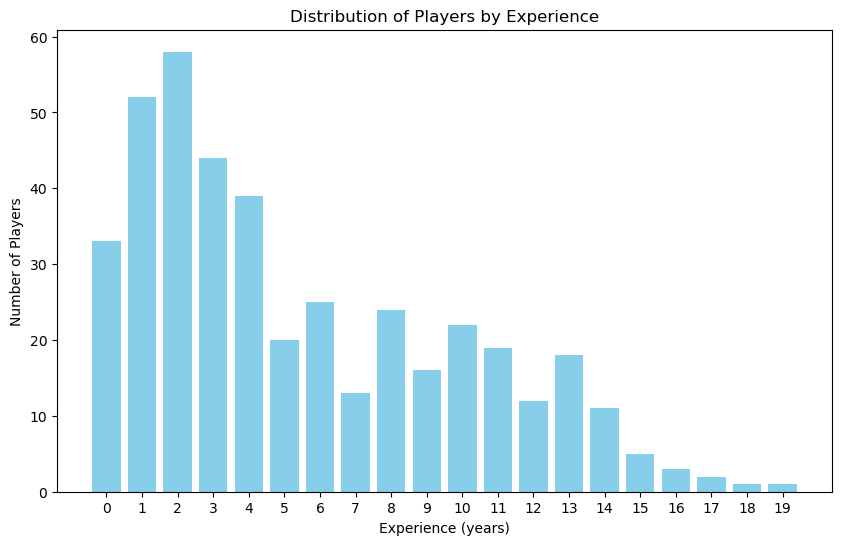

In [522]:
import matplotlib.pyplot as plt

# 'Experience'의 unique 값과 개수
experience_counts = {
    0.0: 33, 1.0: 52, 2.0: 58, 3.0: 44, 4.0: 39,
    5.0: 20, 6.0: 25, 7.0: 13, 8.0: 24, 9.0: 16,
    10.0: 22, 11.0: 19, 12.0: 12, 13.0: 18, 14.0: 11,
    15.0: 5, 16.0: 3, 17.0: 2, 18.0: 1, 19.0: 1
}

# 데이터 준비
experience = list(experience_counts.keys())
counts = list(experience_counts.values())

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(experience, counts, color='skyblue')
plt.xlabel('Experience (years)')
plt.ylabel('Number of Players')
plt.title('Distribution of Players by Experience')
plt.xticks(ticks=experience, labels=[str(int(exp)) for exp in experience])
plt.show()


In [523]:
data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()


feature_columns_1 = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]

feature_columns_2 = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]


In [524]:
# 'Name'과 'Draft_team' 컬럼을 제외하고 나머지 컬럼을 숫자형으로 변환
for col in data.columns:
    if col not in ['Name', 'Draft_team']:
        data[col] = pd.to_numeric(data[col], errors='coerce')

In [526]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()

# # 정의된 피처 컬럼들
# feature_columns_1 = [
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"
# ]

# feature_columns_2 = [
#     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
#     'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
#     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
#     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
#     "OWS_advanced", "WS_advanced", "PER_advanced", 
#     "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
#     "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
#     "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
#     "ORtg_per_poss"
# ]

# # 함수: VIF 계산
# def calculate_vif(data, features):
#     vif_data = pd.DataFrame()
#     vif_data["feature"] = features
#     vif_data["VIF"] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
#     return vif_data

# # 함수: 상관관계 히트맵
# def plot_correlation(data, features):
#     plt.figure(figsize=(12, 10))
#     sns.heatmap(data[features].corr(), annot=True, fmt=".2f")
#     plt.title("Feature Correlation")
#     plt.show()

# # 데이터 'data'에 대한 다중공선성 및 상관관계
# print("Data 'data' - Feature Set 1 VIF:")
# print(calculate_vif(data, feature_columns_1))
# plot_correlation(data, feature_columns_1)

# print("\nData 'data' - Feature Set 2 VIF:")
# print(calculate_vif(data, feature_columns_2))
# plot_correlation(data, feature_columns_2)

# # 데이터 'data_avg'에 대한 다중공선성 및 상관관계
# print("\nData 'data_avg' - Feature Set 1 VIF:")
# print(calculate_vif(data_avg, feature_columns_1))
# plot_correlation(data_avg, feature_columns_1)

# print("\nData 'data_avg' - Feature Set 2 VIF:")
# print(calculate_vif(data_avg, feature_columns_2))
# plot_correlation(data_avg, feature_columns_2)


In [527]:
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()



# # 정의된 피처 컬럼들
# feature_columns_1 = [
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
# ]

# feature_columns_2 = [
#     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
#     'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
#     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
#     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
#     "OWS_advanced", "WS_advanced", "PER_advanced", 
#     "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
#     "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
#     "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
#     "ORtg_per_poss"
# ]

# # MissingDataError 방지를 위해 NaN 및 무한값 처리
# data = data.replace([np.inf, -np.inf], np.nan)
# data_avg = data_avg.replace([np.inf, -np.inf], np.nan)

# # 필요한 피처 컬럼들만 선택
# data = data[feature_columns_2].dropna()
# data_avg = data_avg[feature_columns_2].dropna()

# # 데이터셋의 첫 번째 열(Pos)은 범주형 데이터이므로 제거
# data = data.iloc[:, 1:]
# data_avg = data_avg.iloc[:, 1:]

# # VIF 계산 함수 정의
# def calculate_vif(data):
#     vif_data = pd.DataFrame()
#     vif_data["feature"] = data.columns
#     vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
#     return vif_data.sort_values(by="VIF", ascending=False)

# # 데이터 'data'에 대한 다중공선성 및 상관관계
# print("Data 'data' - Feature Set 1 VIF:")
# print(calculate_vif(data, feature_columns_1))
# plot_correlation(data, feature_columns_1)

# print("\nData 'data' - Feature Set 2 VIF:")
# print(calculate_vif(data, feature_columns_2))
# plot_correlation(data, feature_columns_2)

# # 데이터 'data_avg'에 대한 다중공선성 및 상관관계
# print("\nData 'data_avg' - Feature Set 1 VIF:")
# print(calculate_vif(data_avg, feature_columns_1))
# plot_correlation(data_avg, feature_columns_1)

# print("\nData 'data_avg' - Feature Set 2 VIF:")
# print(calculate_vif(data_avg, feature_columns_2))
# plot_correlation(data_avg, feature_columns_2)



In [528]:
# # 범주형 데이터 확인
# print(data.select_dtypes(include=['object']).columns)

# # 결측값 확인
# print(data.isna().sum())

# # 필요한 경우 범주형 데이터 처리 및 결측값 대체
# # 예: data['Pos'] = pd.get_dummies(data['Pos'])
# # 예: data.fillna(data.mean(), inplace=True)

# # 데이터 타입 확인
# print(data.dtypes)


In [529]:
# #화면 출력 옵션_전체 출력
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# #화면 출력 옵션_reset
# # pd.reset_option('display.max_rows')
# # pd.reset_option('display.max_columns')

In [530]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 데이터셋을 복사하여 피처 간 상관관계 분석
# data_corr = data.copy()

# # 상관관계 계산
# corr = data_corr[feature_columns].corr()

# # 상관관계 시각화
# plt.figure(figsize=(15, 15))
# sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Feature Correlation')
# plt.show()


<h3> 3.1.1. Random Forest<h3> <br/><br/><h4> - 데이터정규화 <br/><br/> - cross validation<h4>    

In [531]:
#1
#연도별
#1차
#data







data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()

# 'Name'과 'Draft_team' 컬럼을 제외하고 나머지 컬럼을 숫자형으로 변환
for col in data.columns:
    if col not in ['Name', 'Draft_team']:
        data[col] = pd.to_numeric(data[col], errors='coerce')
##################################################################################
##################################################################################
#data
#기본stat사용
#특정시즌 test
##################################################################################
##################################################################################
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]


# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]


# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
test_data = data[data['Draft_year'] == 2017]
train_data = data[data['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 그리드 정의 및 그리드 서치
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 모델 찾기 및 테스트 데이터에 대한 예측
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
# 테스트 데이터에 대한 예측
# y_pred = best_model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, RMSE: {rmse}")

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 108 candidates, totalling 540 fits
MAE: 2.8801180987294677, RMSE: 3.4955938171247896
     Actual  Predicted       MAE      RMSE
446     1.0   6.690575  2.880118  3.495594
447     3.0   7.186291  2.880118  3.495594
448     5.0   4.791333  2.880118  3.495594
449     4.0   5.096242  2.880118  3.495594
450     3.0   3.268909  2.880118  3.495594
451     2.0   3.064989  2.880118  3.495594
452     2.0   5.901502  2.880118  3.495594
453     1.0   3.824734  2.880118  3.495594
454     2.0   5.533584  2.880118  3.495594
455     4.0   8.477713  2.880118  3.495594

Overall MAE: 2.8801180987294677, Overall RMSE: 3.4955938171247896

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

Best Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_sample

In [532]:
#2
#연도별
#1차
#data_avg





data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
##################################################################################
##################################################################################
#data
#data 비율 split
#정규화 제외
#PCA제외
#기본 stat사용
##################################################################################
##################################################################################

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Feature 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss

target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]


# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 모델 찾기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측
# y_pred = best_model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# epsilon = 1e-10  # 작은 상수 epsilon 추가
# mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 108 candidates, totalling 540 fits
     Actual  Predicted      MAE      RMSE
446     1.0   5.768667  2.78937  3.323109
447     3.0   7.635278  2.78937  3.323109
448     5.0   5.773333  2.78937  3.323109
449     4.0   6.806667  2.78937  3.323109
450     3.0   3.583333  2.78937  3.323109
451     2.0   3.563333  2.78937  3.323109
452     2.0   4.841146  2.78937  3.323109
453     1.0   4.408095  2.78937  3.323109
454     2.0   5.979697  2.78937  3.323109
455     4.0   7.330000  2.78937  3.323109

Overall MAE: 2.7893695710569366, Overall RMSE: 3.3231086674268813

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

Best Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators':

In [533]:
#3
#연도별
#1차+2차
#data







data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
##################################################################################
##################################################################################
#data
##################################################################################
##################################################################################
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]


# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
test_data = data[data['Draft_year'] == 2017]
train_data = data[data['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 그리드 정의 및 그리드 서치
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 모델 찾기 및 테스트 데이터에 대한 예측
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
# 테스트 데이터에 대한 예측
# y_pred = best_model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 108 candidates, totalling 540 fits
     Actual  Predicted      MAE      RMSE
448     5.0   5.279223  2.75201  3.280877
449     4.0   5.305931  2.75201  3.280877
450     3.0   4.039890  2.75201  3.280877
451     2.0   3.238767  2.75201  3.280877
452     2.0   5.479868  2.75201  3.280877
453     1.0   3.882596  2.75201  3.280877
454     2.0   4.875231  2.75201  3.280877
455     4.0   9.328147  2.75201  3.280877
456     3.0   6.008778  2.75201  3.280877
457     1.0   6.450006  2.75201  3.280877

Overall MAE: 2.752009940609174, Overall RMSE: 3.280876963234854

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Best Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 

In [534]:
#4
#연도별
#1차+2차
#data_avg






data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()


#data_avg



from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]


# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 그리드 정의 및 그리드 서치
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 모델 찾기 및 테스트 데이터에 대한 예측
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 108 candidates, totalling 540 fits
     Actual  Predicted      MAE      RMSE
448     5.0   5.553752  2.46643  2.939376
449     4.0   6.538955  2.46643  2.939376
450     3.0   3.919806  2.46643  2.939376
451     2.0   3.135650  2.46643  2.939376
452     2.0   4.624224  2.46643  2.939376
453     1.0   4.996004  2.46643  2.939376
454     2.0   5.494663  2.46643  2.939376
455     4.0   8.067131  2.46643  2.939376
456     3.0   3.616944  2.46643  2.939376
457     1.0   6.480056  2.46643  2.939376

Overall MAE: 2.4664297670637727, Overall RMSE: 2.9393761418152633

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

Best Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimat

In [535]:
unique_counts = data['Draft_year'].value_counts()
unique_counts

2010    36
2001    35
2012    34
2002    31
2009    29
2007    29
2011    28
2005    27
2004    26
2006    26
2003    25
2008    24
2013    24
2014    22
2000    19
2016    18
2017    16
2015    13
2021     1
Name: Draft_year, dtype: int64

In [536]:
#4-1 
#전체 Draft_year에 대해서 성능test


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()

# 'Name'과 'Draft_team' 컬럼을 제외하고 나머지 컬럼을 숫자형으로 변환
for col in data.columns:
    if col not in ['Name', 'Draft_team']:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        
# 'Name'과 'Draft_team' 컬럼을 제외하고 나머지 컬럼을 숫자형으로 변환
for col in data_avg.columns:
    if col not in ['Name', 'Draft_team']:
        data_avg[col] = pd.to_numeric(data_avg[col], errors='coerce')

# 각 'Draft_year'별로 테스트 데이터를 설정하고 모델을 학습 및 평가하는 함수를 정의합니다.

# Feature 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')


def evaluate_model_per_draft_year(data, feature_columns, target_column, param_grid):
    results = []

    for year in sorted(data['Draft_year'].unique()):
#         if year == 2021:  # 2021년 데이터는 제외
#             continue

        print(f"Evaluating for Draft Year: {year}")
        train_data = data[data['Draft_year'] != year]
        test_data = data[data['Draft_year'] == year]

#         # 훈련 데이터 또는 테스트 데이터가 너무 적은 경우 건너뛰기
#         if len(train_data) < 5 or len(test_data) < 5:
#             print(f"Skipping Draft Year {year} due to insufficient data.")
#             continue

        X_train = train_data[feature_columns]
        y_train = train_data[target_column]
        X_test = test_data[feature_columns]
        y_test = test_data[target_column]

        grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred_raw = best_model.predict(X_test)
        y_pred = np.maximum(y_pred_raw, 0)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        results.append({
            'Draft_year': year,
            'MAE': mae,
            'RMSE': rmse,
            'Best_Params': grid_search.best_params_
        })

    return pd.DataFrame(results)

# 하이퍼파라미터 그리드 정의 (이전에 정의된 param_grid를 사용)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


yearly_results = evaluate_model_per_draft_year(data_avg, feature_columns, 'Experience', param_grid)

# 함수 실행
# 결과는 실제 데이터셋 'data_avg'와 'feature_columns' 리스트가 필요합니다.
# yearly_results = evaluate_model_per_draft_year(data_avg, feature_columns, 'Experience', param_grid)

# 주의: 위의 'yearly_results' 실행은 실제 데이터셋 'data_avg'와 'feature_columns' 리스트가 필요합니다.
# 실제 환경에서 이 코드를 실행하려면 적절한 데이터셋과 피처 컬럼 리스트를 제공해야 합니다.



Evaluating for Draft Year: 2000
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2001
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2002
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2003
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2004
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2005
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2006
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2007
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2008
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2009
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2010
Fitting 5 folds fo

In [537]:
result_table = pd.DataFrame(yearly_results)
result_table

,Draft_year,MAE,RMSE,Best_Params
0,2000,3.986428,4.430268,"{'max_depth': None, 'min_samples_leaf': 4, 'mi..."
1,2001,4.536318,5.567686,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
2,2002,4.098311,4.895104,"{'max_depth': None, 'min_samples_leaf': 2, 'mi..."
3,2003,6.199167,6.796084,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."
4,2004,4.201310,4.758417,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
5,2005,4.111679,4.800989,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."
6,2006,3.086389,4.014037,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."
7,2007,3.681475,4.198206,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_..."
8,2008,3.801629,4.401904,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
9,2009,2.705025,3.249697,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."


In [538]:
#화면 출력 옵션_전체 출력
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#화면 출력 옵션_reset
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [539]:
#컬럼별 데이터 타입 확인
data_types = data.dtypes
print(data_types)

Draft_year                       int64
Name                            object
Pos                              int64
Height_cm                      float64
Weight_kg                      float64
Draft_team                      object
Draft_overall                    int64
Body_fat_pct                   float64
Hand_Length_inch               float64
Hand_width_inch                float64
Height_wo_Shoes                float64
Height_w_Shoes                 float64
Standing_Reach_inch            float64
Wingspan_inch                  float64
LANE_AGILITY_sec               float64
SHUTTLE_RUN_sec                float64
THREE_QUATER_SPRINT            float64
STANDING_VERTICAL_LEAP_inch    float64
MAX_VERTICAL_LEAP_inch         float64
MAX_BENCH_PRESS                float64
G_totals                       float64
MP_totals                      float64
FG_totals                      float64
FGA_totals                     float64
FG%_totals                     float64
2P_totals                

In [540]:
#4-2
#POS별 Draft year별

feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]
target_column = 'Experience'


# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]
# 'Draft_year'와 'Pos'를 기준으로 모델을 학습 및 평가하는 함수를 정의합니다.

def evaluate_model_per_draft_year_and_position(data, feature_columns, target_column, param_grid):
    results = []

    for year in sorted(data['Draft_year'].unique()):
        for position in data['Pos'].unique():
            print(f"Evaluating for Draft Year: {year}, Position: {position}")
            train_data = data[(data['Draft_year'] != year) & (data['Pos'] != position)]
            test_data = data[(data['Draft_year'] == year) & (data['Pos'] == position)]

            # 훈련 데이터 또는 테스트 데이터가 너무 적은 경우 건너뛰기
            if len(train_data) < 5 or len(test_data) < 5:
                print(f"Skipping Draft Year {year}, Position {position} due to insufficient data.")
                continue

            X_train = train_data[feature_columns]
            y_train = train_data[target_column]
            X_test = test_data[feature_columns]
            y_test = test_data[target_column]

            grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                                       param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
            grid_search.fit(X_train, y_train)

            best_model = grid_search.best_estimator_
            y_pred_raw = best_model.predict(X_test)
            y_pred = np.maximum(y_pred_raw, 0)

            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))

            results.append({
                'Draft_year': year,
                'Position': position,
                'MAE': mae,
                'RMSE': rmse,
                'Best_Params': grid_search.best_params_
            })

    return pd.DataFrame(results)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 함수 실행
# 결과는 실제 데이터셋 'data_avg'와 'feature_columns' 리스트가 필요합니다.
# draft_year_pos_results = evaluate_model_per_draft_year_and_position(data_avg, feature_columns, 'Experience', param_grid)

# 주의: 위의 'draft_year_pos_results' 실행은 실제 데이터셋 'data_avg'와 'feature_columns' 리스트가 필요합니다.
# 실제 환경에서 이 코드를 실행하려면 적절한 데이터셋과 피처 컬럼 리스트를 제공해야 합니다.
yearly_pos_results = evaluate_model_per_draft_year_and_position(data_avg, feature_columns, 'Experience', param_grid)



Evaluating for Draft Year: 2000, Position: 1
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2000, Position: 3
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2000, Position: 5
Skipping Draft Year 2000, Position 5 due to insufficient data.
Evaluating for Draft Year: 2001, Position: 1
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2001, Position: 3
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2001, Position: 5
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2002, Position: 1
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2002, Position: 3
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2002, Position: 5
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluating for Draft Year: 2

In [541]:
result_table_year_pos = pd.DataFrame(yearly_pos_results)
result_table_year_pos
# 'Position'별로 정렬
sorted_by_position = result_table_year_pos.sort_values(by=['Position', 'Draft_year'])
print("Sorted by Position:")
print(sorted_by_position)

# 'Draft_year'별로 정렬
sorted_by_draft_year = result_table_year_pos.sort_values(by=['Draft_year', 'Position'])
print("\nSorted by Draft Year:")
print(sorted_by_draft_year)

Sorted by Position:
    Draft_year  Position       MAE      RMSE  \
0         2000         1  4.888303  5.464769   
2         2001         1  4.978192  5.557705   
5         2002         1  4.797788  5.057211   
8         2003         1  5.077193  5.448760   
10        2004         1  4.726274  5.173223   
12        2005         1  4.673661  4.963986   
14        2006         1  3.138679  3.515335   
16        2007         1  3.592284  4.319423   
19        2008         1  4.402719  4.695219   
21        2009         1  3.141066  3.993032   
23        2010         1  4.967418  5.589347   
26        2011         1  3.681223  4.521380   
28        2012         1  4.446775  4.849013   
30        2013         1  2.911007  3.397338   
32        2014         1  4.604191  5.112079   
35        2016         1  5.489839  5.780279   
37        2017         1  4.708165  5.367464   
1         2000         3  3.591905  4.374690   
3         2001         3  5.780383  7.157117   
6         2002      

In [542]:
#5
#split
#1차
#data





data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
##################################################################################
##################################################################################
#data
#data 비율 split
#정규화 제외
#PCA제외
#기본 stat사용
##################################################################################
##################################################################################

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Feature 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss

target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 모델 찾기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측
# y_pred = best_model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# epsilon = 1e-10  # 작은 상수 epsilon 추가
# mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 108 candidates, totalling 540 fits
     Actual  Predicted       MAE      RMSE
225     2.0   4.859581  3.719685  4.484989
30     11.0   5.629251  3.719685  4.484989
39      2.0   6.886758  3.719685  4.484989
222     0.0   3.511169  3.719685  4.484989
124     1.0   5.243808  3.719685  4.484989
203     0.0   5.719042  3.719685  4.484989
310     2.0   7.356826  3.719685  4.484989
211    11.0   4.447465  3.719685  4.484989
457     1.0   5.941614  3.719685  4.484989
77     13.0   4.560470  3.719685  4.484989

Overall MAE: 3.7196853266825296, Overall RMSE: 4.484989456311125

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

Best Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n

In [543]:
#6
#split
#1차
#data_avg





data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
##################################################################################
##################################################################################
#data
#data 비율 split
#정규화 제외
#PCA제외
#기본 stat사용
##################################################################################
##################################################################################

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Feature 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss

target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 모델 찾기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측
# y_pred = best_model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# epsilon = 1e-10  # 작은 상수 epsilon 추가
# mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 108 candidates, totalling 540 fits
     Actual  Predicted       MAE      RMSE
126    15.0   7.647635  3.505418  4.238074
30     11.0   7.228840  3.505418  4.238074
202    14.0   5.184803  3.505418  4.238074
442     1.0   3.945223  3.505418  4.238074
157    14.0   5.772581  3.505418  4.238074
228     2.0   4.101564  3.505418  4.238074
409     2.0   2.905023  3.505418  4.238074
299     8.0   6.946510  3.505418  4.238074
225     2.0   4.231557  3.505418  4.238074
76      1.0   5.216778  3.505418  4.238074

Overall MAE: 3.505418240722974, Overall RMSE: 4.238073559117305

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

Best Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_e

In [544]:
#7
#split
#1차+2차
#data





data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
##################################################################################
##################################################################################
#data
#결측치 추정 단계에서 R스퀘어값 낮은 피처 제외 후 모델링.
#data 비율 split
#정규화 제외
#PCA제외
##################################################################################
##################################################################################

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Feature 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss

target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 모델 찾기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측
# y_pred = best_model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# epsilon = 1e-10  # 작은 상수 epsilon 추가
# mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100
# r2 = r2_score(y_test, y_pred)

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 108 candidates, totalling 540 fits
     Actual  Predicted      MAE      RMSE
350     1.0   4.467937  3.39839  4.323303
354     3.0   6.716595  3.39839  4.323303
428     1.0   4.278524  3.39839  4.323303
60      4.0   8.322953  3.39839  4.323303
169     0.0   3.040410  3.39839  4.323303
33     13.0   3.692595  3.39839  4.323303
76      1.0   3.192291  3.39839  4.323303
88     13.0   6.496448  3.39839  4.323303
278     3.0   2.693441  3.39839  4.323303
461     2.0   6.065965  3.39839  4.323303

Overall MAE: 3.3983902937912767, Overall RMSE: 4.32330332140628

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

Best Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators'

In [545]:
#8
#split
#1차+2차
#data_avg



data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data_avg
#data split


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]


# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 그리드 정의 및 그리드 서치
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 모델 찾기 및 테스트 데이터에 대한 예측
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())

data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
     Actual  Predicted       MAE      RMSE
170     6.0   2.011546  3.967639  4.903975
322     1.0   4.581543  3.967639  4.903975
457     1.0   6.328131  3.967639  4.903975
104    14.0  10.573595  3.967639  4.903975
75     15.0   6.755562  3.967639  4.903975
441     1.0   4.533201  3.967639  4.903975
408     1.0   4.990076  3.967639  4.903975
239     0.0   5.049932  3.967639  4.903975
42      5.0   6.816328  3.967639  4.903975
60      4.0   7.169798  3.967639  4.903975

Overall MAE: 3.9676387619827502, Overall RMSE: 4.903975432136278

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Best Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_e

<h3> 3.1.2. Gradient Boost<h3> <br/><br/><h4>- PCA <br/><br/>- 데이터정규화 <br/><br/> - cross validation<h4>    
    


In [546]:
#1
#연도별
#1차
#data





data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#################################################################################
#################################################################################
#data
#PCA 제외
#정규화 제외
#data split
#################################################################################
#################################################################################
#data
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss

target_column = 'Experience'


# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 데이터셋의 차원 확인
# print(f"X shape: {X.shape}")
# print(f"y shape: {y.shape}")

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

test_data = data[data['Draft_year'] == 2017]
train_data = data[data['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)

# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 그리드 서치 객체 생성 및 교차 검증 설정
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5,  # 5-폴드 교차 검증
    n_jobs=-1, 
    verbose=2
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted       MAE      RMSE
446     1.0   6.767761  3.131658  3.549776
447     3.0   6.299173  3.131658  3.549776
448     5.0   4.150061  3.131658  3.549776
449     4.0   4.808570  3.131658  3.549776
450     3.0   3.439428  3.131658  3.549776
451     2.0   3.545795  3.131658  3.549776
452     2.0   5.686055  3.131658  3.549776
453     1.0   4.716389  3.131658  3.549776
454     2.0   5.199558  3.131658  3.549776
455     4.0   8.685596  3.131658  3.549776

Overall MAE: 3.1316583703665652, Overall RMSE: 3.5497762294671666

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Best Model Parameters:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0,

In [547]:
#2
#연도별
#1차
#data_avg



data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#################################################################################
#################################################################################
#data
#PCA 제외
#정규화 제외
#data split
#################################################################################
#################################################################################
#data
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss

target_column = 'Experience'


# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 데이터셋의 차원 확인
# print(f"X shape: {X.shape}")
# print(f"y shape: {y.shape}")

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)

# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 그리드 서치 객체 생성 및 교차 검증 설정
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5,  # 5-폴드 교차 검증
    n_jobs=-1, 
    verbose=2
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted       MAE      RMSE
446     1.0   5.056314  2.712864  3.067227
447     3.0   5.945631  2.712864  3.067227
448     5.0   4.916207  2.712864  3.067227
449     4.0   7.080534  2.712864  3.067227
450     3.0   3.568061  2.712864  3.067227
451     2.0   3.534549  2.712864  3.067227
452     2.0   5.517064  2.712864  3.067227
453     1.0   4.891457  2.712864  3.067227
454     2.0   5.167052  2.712864  3.067227
455     4.0   6.825622  2.712864  3.067227

Overall MAE: 2.7128636631641263, Overall RMSE: 3.067227399228591

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}

Best Model Parameters:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 

In [548]:
#3
#연도별
#1차+2차
#data





data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#################################################################################
#################################################################################
#data
#PCA 제외
#정규화 제외
#################################################################################
#################################################################################
#data
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'


# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 데이터셋의 차원 확인
# print(f"X shape: {X.shape}")
# print(f"y shape: {y.shape}")

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
test_data = data[data['Draft_year'] == 2017]
train_data = data[data['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)

# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 그리드 서치 객체 생성 및 교차 검증 설정
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5,  # 5-폴드 교차 검증
    n_jobs=-1, 
    verbose=2
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted       MAE      RMSE
448     5.0   4.763319  2.595597  3.004365
449     4.0   4.830111  2.595597  3.004365
450     3.0   3.879097  2.595597  3.004365
451     2.0   4.008366  2.595597  3.004365
452     2.0   5.997807  2.595597  3.004365
453     1.0   5.661284  2.595597  3.004365
454     2.0   5.081228  2.595597  3.004365
455     4.0   7.600468  2.595597  3.004365
456     3.0   6.092454  2.595597  3.004365
457     1.0   5.579257  2.595597  3.004365

Overall MAE: 2.5955968060214016, Overall RMSE: 3.004365321763257

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Best Model Parameters:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 

In [549]:
#4
#연도별
#1차+2차
#data_avg




data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#################################################################################
#################################################################################
#data_avg
#PCA 제외
#정규화 제외
#################################################################################
#################################################################################


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'


# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 데이터셋의 차원 확인
# print(f"X shape: {X.shape}")
# print(f"y shape: {y.shape}")

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)

# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 그리드 서치 객체 생성 및 교차 검증 설정
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5,  # 5-폴드 교차 검증
    n_jobs=-1, 
    verbose=2
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted       MAE      RMSE
448     5.0   5.222365  2.355419  2.755597
449     4.0   6.705676  2.355419  2.755597
450     3.0   3.646608  2.355419  2.755597
451     2.0   3.180530  2.355419  2.755597
452     2.0   5.261253  2.355419  2.755597
453     1.0   5.542012  2.355419  2.755597
454     2.0   4.771082  2.355419  2.755597
455     4.0   5.991701  2.355419  2.755597
456     3.0   3.895044  2.355419  2.755597
457     1.0   6.382266  2.355419  2.755597

Overall MAE: 2.355419362658389, Overall RMSE: 2.75559714072074

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Best Model Parameters:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n

In [550]:
#5
#split
#1차
#data




data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#################################################################################
#################################################################################
#data
#PCA 제외
#정규화 제외
#data split
#################################################################################
#################################################################################
#data
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss

target_column = 'Experience'


# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 데이터셋의 차원 확인
# print(f"X shape: {X.shape}")
# print(f"y shape: {y.shape}")

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)

# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 그리드 서치 객체 생성 및 교차 검증 설정
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5,  # 5-폴드 교차 검증
    n_jobs=-1, 
    verbose=2
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted       MAE    RMSE
225     2.0   5.305701  3.768937  4.5559
30     11.0   5.043341  3.768937  4.5559
39      2.0   6.019449  3.768937  4.5559
222     0.0   3.856896  3.768937  4.5559
124     1.0   5.216108  3.768937  4.5559
203     0.0   5.543990  3.768937  4.5559
310     2.0   6.193486  3.768937  4.5559
211    11.0   3.723249  3.768937  4.5559
457     1.0   5.504907  3.768937  4.5559
77     13.0   4.551873  3.768937  4.5559

Overall MAE: 3.7689369637260954, Overall RMSE: 4.555900389129614

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Best Model Parameters:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, '

In [551]:
#6
#split
#1차
#data_avg



data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#################################################################################
#################################################################################
#data
#PCA 제외
#정규화 제외
#data split
#################################################################################
#################################################################################
#data
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss

target_column = 'Experience'


# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 데이터셋의 차원 확인
# print(f"X shape: {X.shape}")
# print(f"y shape: {y.shape}")

# 'Draft_year' 컬럼을 숫자형으로 변환
# data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)

# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 그리드 서치 객체 생성 및 교차 검증 설정
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5,  # 5-폴드 교차 검증
    n_jobs=-1, 
    verbose=2
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted       MAE     RMSE
126    15.0   5.786586  3.562116  4.29132
30     11.0   5.742704  3.562116  4.29132
202    14.0   5.693003  3.562116  4.29132
442     1.0   4.741764  3.562116  4.29132
157    14.0   5.139366  3.562116  4.29132
228     2.0   4.865829  3.562116  4.29132
409     2.0   4.116851  3.562116  4.29132
299     8.0   5.651759  3.562116  4.29132
225     2.0   5.303702  3.562116  4.29132
76      1.0   5.489688  3.562116  4.29132

Overall MAE: 3.5621156311767392, Overall RMSE: 4.291320262702613

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Best Model Parameters:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimato

In [552]:
#7
#split
#1차+2차
#data




data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#################################################################################
#################################################################################
#data
#PCA 제외
#정규화 제외
#data split
#################################################################################
#################################################################################
#data
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'


# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 데이터셋의 차원 확인
# print(f"X shape: {X.shape}")
# print(f"y shape: {y.shape}")

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)

# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 그리드 서치 객체 생성 및 교차 검증 설정
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5,  # 5-폴드 교차 검증
    n_jobs=-1, 
    verbose=2
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted       MAE      RMSE
350     1.0   4.685847  3.469147  4.318615
354     3.0   5.741736  3.469147  4.318615
428     1.0   5.851238  3.469147  4.318615
60      4.0   9.678966  3.469147  4.318615
169     0.0   4.285009  3.469147  4.318615
33     13.0   3.509102  3.469147  4.318615
76      1.0   3.543311  3.469147  4.318615
88     13.0   6.395060  3.469147  4.318615
278     3.0   3.550281  3.469147  4.318615
461     2.0   4.864415  3.469147  4.318615

Overall MAE: 3.4691468057655634, Overall RMSE: 4.318614712146205

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Best Model Parameters:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 

In [553]:
#8
#split
#1차+2차
#data_avg





data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#################################################################################
#################################################################################
#data_avg
#PCA 제외
#정규화 제외
#data split
#################################################################################
#################################################################################


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'


# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 데이터셋의 차원 확인
# print(f"X shape: {X.shape}")
# print(f"y shape: {y.shape}")

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)

# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 그리드 서치 객체 생성 및 교차 검증 설정
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5,  # 5-폴드 교차 검증
    n_jobs=-1, 
    verbose=2
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted      MAE      RMSE
170     6.0   2.551943  3.88861  4.851982
322     1.0   4.528696  3.88861  4.851982
457     1.0   5.845526  3.88861  4.851982
104    14.0  11.872702  3.88861  4.851982
75     15.0   6.593727  3.88861  4.851982
441     1.0   4.710870  3.88861  4.851982
408     1.0   5.385159  3.88861  4.851982
239     0.0   4.668304  3.88861  4.851982
42      5.0   5.468139  3.88861  4.851982
60      4.0   4.734231  3.88861  4.851982

Overall MAE: 3.888609668913516, Overall RMSE: 4.851982397299222

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Best Model Parameters:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimator

<h3> 3.1.3. XGBoost <h3> <br/><br/><h4>- PCA <br/><br/>- 데이터정규화 <br/><br/> - cross validation<h4>    
    

In [554]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [555]:
#1
#연도별
#1차
#data



data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#PCA 제외
#정규화 제외
#data split
################################################################################
################################################################################

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss

target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

test_data = data[data['Draft_year'] == 2017]
train_data = data[data['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]


# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)


# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 그리드 서치 객체 생성 및 교차 검증 설정
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5,  # 5-폴드 교차 검증
    n_jobs=-1, 
    verbose=2
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted       MAE      RMSE
446     1.0   5.899260  2.811238  3.111227
447     3.0   5.688596  2.811238  3.111227
448     5.0   4.649080  2.811238  3.111227
449     4.0   5.118979  2.811238  3.111227
450     3.0   4.051440  2.811238  3.111227
451     2.0   4.195941  2.811238  3.111227
452     2.0   5.459537  2.811238  3.111227
453     1.0   4.824791  2.811238  3.111227
454     2.0   5.045118  2.811238  3.111227
455     4.0   7.818213  2.811238  3.111227

Overall MAE: 2.811237543821335, Overall RMSE: 3.1112273387442366

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Best Model Parameters:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma'

In [556]:
#2
#연도별
#1차
#data_avg



data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################

#data_avg
#PCA제외
#정규화제외
################################################################################
################################################################################


from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss

target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]


# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)


# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 그리드 서치 객체 생성 및 교차 검증 설정
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5,  # 5-폴드 교차 검증
    n_jobs=-1, 
    verbose=2
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted       MAE      RMSE
446     1.0   5.897915  2.651572  3.167813
447     3.0   6.477106  2.651572  3.167813
448     5.0   4.723784  2.651572  3.167813
449     4.0   6.224149  2.651572  3.167813
450     3.0   3.284983  2.651572  3.167813
451     2.0   3.284983  2.651572  3.167813
452     2.0   5.301277  2.651572  3.167813
453     1.0   5.151687  2.651572  3.167813
454     2.0   5.071522  2.651572  3.167813
455     4.0   6.425967  2.651572  3.167813

Overall MAE: 2.6515719145536423, Overall RMSE: 3.167813130877639

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Best Model Parameters:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma'

In [557]:
#3
#연도별
#1차+2차
#data



data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#PCA 제외
#정규화 제외
################################################################################
################################################################################

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
test_data = data[data['Draft_year'] == 2017]
train_data = data[data['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]


# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)


# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 그리드 서치 객체 생성 및 교차 검증 설정
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5,  # 5-폴드 교차 검증
    n_jobs=-1, 
    verbose=2
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted       MAE      RMSE
448     5.0   5.558907  2.551884  2.943606
449     4.0   4.682265  2.551884  2.943606
450     3.0   4.146018  2.551884  2.943606
451     2.0   4.284941  2.551884  2.943606
452     2.0   6.022764  2.551884  2.943606
453     1.0   5.639886  2.551884  2.943606
454     2.0   5.342758  2.551884  2.943606
455     4.0   6.577963  2.551884  2.943606
456     3.0   6.281938  2.551884  2.943606
457     1.0   5.405420  2.551884  2.943606

Overall MAE: 2.551884174346924, Overall RMSE: 2.9436055563413936

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Best Model Parameters:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma'

In [558]:
#4
#연도별
#1차+2차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################

#data_avg
#PCA제외
#정규화제외
################################################################################
################################################################################


from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]


# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)


# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 그리드 서치 객체 생성 및 교차 검증 설정
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5,  # 5-폴드 교차 검증
    n_jobs=-1, 
    verbose=2
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted      MAE      RMSE
448     5.0   5.585737  2.47186  2.790748
449     4.0   6.541820  2.47186  2.790748
450     3.0   4.479160  2.47186  2.790748
451     2.0   3.991735  2.47186  2.790748
452     2.0   5.781312  2.47186  2.790748
453     1.0   5.294400  2.47186  2.790748
454     2.0   5.239945  2.47186  2.790748
455     4.0   5.876357  2.47186  2.790748
456     3.0   4.641928  2.47186  2.790748
457     1.0   6.171567  2.47186  2.790748

Overall MAE: 2.4718602555138722, Overall RMSE: 2.7907482584222314

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Best Model Parameters:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'g

In [559]:
#5
#split
#1차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#PCA 제외
#정규화 제외
#data split
################################################################################
################################################################################

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss

target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)


# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 그리드 서치 객체 생성 및 교차 검증 설정
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5,  # 5-폴드 교차 검증
    n_jobs=-1, 
    verbose=2
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted       MAE      RMSE
225     2.0   5.240109  3.794318  4.570817
30     11.0   5.160679  3.794318  4.570817
39      2.0   5.980672  3.794318  4.570817
222     0.0   3.800009  3.794318  4.570817
124     1.0   5.321174  3.794318  4.570817
203     0.0   5.595422  3.794318  4.570817
310     2.0   6.262986  3.794318  4.570817
211    11.0   3.729994  3.794318  4.570817
457     1.0   5.515543  3.794318  4.570817
77     13.0   4.548246  3.794318  4.570817

Overall MAE: 3.7943178069206978, Overall RMSE: 4.570817094353502

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Best Model Parameters:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma'

In [560]:
#6
#split
#1차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################

#data_avg
#PCA제외
#정규화제외
################################################################################
################################################################################


from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss

target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)


# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 그리드 서치 객체 생성 및 교차 검증 설정
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5,  # 5-폴드 교차 검증
    n_jobs=-1, 
    verbose=2
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted       MAE      RMSE
126    15.0   5.730171  3.579531  4.304844
30     11.0   5.657172  3.579531  4.304844
202    14.0   5.728386  3.579531  4.304844
442     1.0   5.165690  3.579531  4.304844
157    14.0   5.070110  3.579531  4.304844
228     2.0   4.938879  3.579531  4.304844
409     2.0   4.178058  3.579531  4.304844
299     8.0   5.626859  3.579531  4.304844
225     2.0   5.354475  3.579531  4.304844
76      1.0   5.356330  3.579531  4.304844

Overall MAE: 3.5795307548149773, Overall RMSE: 4.304844467031281

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Best Model Parameters:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma'

In [561]:
#7
#split
#1차+2차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#PCA 제외
#정규화 제외
#data split
################################################################################
################################################################################

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)


# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 그리드 서치 객체 생성 및 교차 검증 설정
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5,  # 5-폴드 교차 검증
    n_jobs=-1, 
    verbose=2
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted      MAE      RMSE
350     1.0   5.031853  3.47597  4.371625
354     3.0   5.520224  3.47597  4.371625
428     1.0   6.033310  3.47597  4.371625
60      4.0   8.973329  3.47597  4.371625
169     0.0   4.500467  3.47597  4.371625
33     13.0   3.652467  3.47597  4.371625
76      1.0   3.650558  3.47597  4.371625
88     13.0   6.591516  3.47597  4.371625
278     3.0   3.360404  3.47597  4.371625
461     2.0   4.914188  3.47597  4.371625

Overall MAE: 3.4759696977479115, Overall RMSE: 4.371624582891765

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Best Model Parameters:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gr

In [562]:
#8
#split
#1차+2차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################

#data_avg
#data split
################################################################################
################################################################################


from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)


# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train)
# X_test_scaled = pca.transform(X_test)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 그리드 서치 객체 생성 및 교차 검증 설정
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5,  # 5-폴드 교차 검증
    n_jobs=-1, 
    verbose=2
)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted       MAE      RMSE
170     6.0   2.368622  4.015883  4.991471
322     1.0   4.096123  4.015883  4.991471
457     1.0   5.946548  4.015883  4.991471
104    14.0  11.602270  4.015883  4.991471
75     15.0   6.694699  4.015883  4.991471
441     1.0   5.203858  4.015883  4.991471
408     1.0   5.460289  4.015883  4.991471
239     0.0   4.391591  4.015883  4.991471
42      5.0   5.633595  4.015883  4.991471
60      4.0   4.437467  4.015883  4.991471

Overall MAE: 4.01588267371768, Overall RMSE: 4.991470885930016

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Best Model Parameters:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 

<h3> 3.1.4. LightGBM <h3> <br/><br/><h4>- PCA <br/><br/>- 데이터정규화 <br/><br/> - cross validation<h4>    

In [563]:
# pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [564]:
# #1
# #연도별
# #1차
# #data


# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# ################################################################################
# ################################################################################
# #data
# #특정시즌 test
# ################################################################################
# ################################################################################
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from lightgbm import LGBMRegressor
# import pandas as pd
# import numpy as np

# # 데이터 로드 및 전처리
# # merged_all_comb_copy_model = ...

# # Feature 및 타겟 컬럼 정의
# feature_columns = [
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
#      ]

# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss

# target_column = 'Experience'

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data = data.dropna(subset=feature_columns + [target_column])
# X = data[feature_columns]
# y = data[target_column]

# # 'Draft_year' 컬럼을 숫자형으로 변환
# data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# # 훈련 데이터와 테스트 데이터 분할
# # train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# # test_data = data_avg[data_avg['Draft_year'] == 2017]
# # # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
# test_data = data[data['Draft_year'] == 2017]
# train_data = data[data['Draft_year'] != 2017]

# X_train = train_data[feature_columns]
# y_train = train_data[target_column]
# X_test = test_data[feature_columns]
# y_test = test_data[target_column]


# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)



# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'num_leaves': [31, 62, 127]  # LightGBM 특정 파라미터
# }

# # 그리드 서치 객체 생성 및 교차 검증 설정
# grid_search = GridSearchCV(
#     estimator=LGBMRegressor(random_state=42), 
#     param_grid=param_grid, 
#     cv=5,  # 5-폴드 교차 검증
#     n_jobs=-1, 
#     verbose=2
# )

# # 그리드 서치 수행
# grid_search.fit(X_train_scaled, y_train)

# # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_



# # y_pred = model.predict(X_test)
# # 테스트 데이터에 대한 예측
# y_pred_raw = best_model.predict(X_test_scaled)

# # 예측값에서 음수 제거
# y_pred = np.maximum(y_pred_raw, 0)


# # 평가 지표 계산 및 출력
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # r2 = r2_score(y_test, y_pred)
# # 결과를 데이터프레임으로 출력
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'MAE': mae,
#     'RMSE': rmse
# })

# # 결과 출력
# print(results_df.head(10))
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
# print(f"\nBest Parameters: {best_params}")
# # 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2378
[LightGBM] [Info] Number of data points in the train set: 447, number of used features: 21
[LightGBM] [Info] Start training from score 5.463087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [565]:
# #2
# #연도별
# #1차
# #data_avg


# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# ################################################################################
# ################################################################################
# #data_avg
# #data_split
# ################################################################################
# ################################################################################


# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from lightgbm import LGBMRegressor
# import pandas as pd
# import numpy as np

# # 데이터 로드 및 전처리
# # merged_all_comb_copy_model = ...

# # Feature 및 타겟 컬럼 정의
# feature_columns = [
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
#      ]

# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss

# target_column = 'Experience'

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data_avg = data_avg.dropna(subset=feature_columns + [target_column])
# X = data_avg[feature_columns]
# y = data_avg[target_column]

# # 'Draft_year' 컬럼을 숫자형으로 변환
# data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# test_data = data_avg[data_avg['Draft_year'] == 2017]
# train_data = data_avg[data_avg['Draft_year'] != 2017]

# X_train = train_data[feature_columns]
# y_train = train_data[target_column]
# X_test = test_data[feature_columns]
# y_test = test_data[target_column]


# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)


# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'num_leaves': [31, 62, 127]  # LightGBM 특정 파라미터
# }

# # 그리드 서치 객체 생성 및 교차 검증 설정
# grid_search = GridSearchCV(
#     estimator=LGBMRegressor(random_state=42), 
#     param_grid=param_grid, 
#     cv=5,  # 5-폴드 교차 검증
#     n_jobs=-1, 
#     verbose=2
# )

# # 그리드 서치 수행
# grid_search.fit(X_train_scaled, y_train)

# # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_


# # y_pred = model.predict(X_test)
# # 테스트 데이터에 대한 예측
# y_pred_raw = best_model.predict(X_test_scaled)

# # 예측값에서 음수 제거
# y_pred = np.maximum(y_pred_raw, 0)


# # 평가 지표 계산 및 출력
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # r2 = r2_score(y_test, y_pred)
# # 결과를 데이터프레임으로 출력
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'MAE': mae,
#     'RMSE': rmse
# })

# # 결과 출력
# print(results_df.head(10))
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
# print(f"\nBest Parameters: {best_params}")
# # 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())



Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 444, number of used features: 21
[LightGBM] [Info] Start training from score 5.497748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [566]:
# #3
# #연도별
# #1차+2차
# #data


# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# ################################################################################
# ################################################################################
# #data
# #특정시즌 test
# ################################################################################
# ################################################################################
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from lightgbm import LGBMRegressor
# import pandas as pd
# import numpy as np

# # 데이터 로드 및 전처리
# # merged_all_comb_copy_model = ...

# # Feature 및 타겟 컬럼 정의
# feature_columns = [
#     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
#     'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
#      "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
#      "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
#     "OWS_advanced",  "WS_advanced", "PER_advanced", 
#     "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
#     "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
#     "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
#     "ORtg_per_poss"]

# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss
# target_column = 'Experience'

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data = data.dropna(subset=feature_columns + [target_column])
# X = data[feature_columns]
# y = data[target_column]

# # 'Draft_year' 컬럼을 숫자형으로 변환
# data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# # 훈련 데이터와 테스트 데이터 분할
# # train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# # test_data = data_avg[data_avg['Draft_year'] == 2017]
# # # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
# test_data = data[data['Draft_year'] == 2017]
# train_data = data[data['Draft_year'] != 2017]

# X_train = train_data[feature_columns]
# y_train = train_data[target_column]
# X_test = test_data[feature_columns]
# y_test = test_data[target_column]


# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)



# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'num_leaves': [31, 62, 127]  # LightGBM 특정 파라미터
# }

# # 그리드 서치 객체 생성 및 교차 검증 설정
# grid_search = GridSearchCV(
#     estimator=LGBMRegressor(random_state=42), 
#     param_grid=param_grid, 
#     cv=5,  # 5-폴드 교차 검증
#     n_jobs=-1, 
#     verbose=2
# )

# # 그리드 서치 수행
# grid_search.fit(X_train_scaled, y_train)

# # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_



# # y_pred = model.predict(X_test)
# # 테스트 데이터에 대한 예측
# y_pred_raw = best_model.predict(X_test_scaled)

# # 예측값에서 음수 제거
# y_pred = np.maximum(y_pred_raw, 0)


# # 평가 지표 계산 및 출력
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # r2 = r2_score(y_test, y_pred)
# # 결과를 데이터프레임으로 출력
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'MAE': mae,
#     'RMSE': rmse
# })

# # 결과 출력
# print(results_df.head(10))
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
# print(f"\nBest Parameters: {best_params}")
# # 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5928
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 60
[LightGBM] [Info] Start training from score 5.559406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [567]:
# #4
# #연도별
# #1차+2차
# #data_avg



# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# ################################################################################
# ################################################################################
# #data_avg
# ################################################################################
# ################################################################################


# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from lightgbm import LGBMRegressor
# import pandas as pd
# import numpy as np

# # 데이터 로드 및 전처리
# # merged_all_comb_copy_model = ...

# # Feature 및 타겟 컬럼 정의
# feature_columns = [
#     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
#     'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
#      "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
#      "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
#     "OWS_advanced",  "WS_advanced", "PER_advanced", 
#     "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
#     "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
#     "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
#     "ORtg_per_poss"]

# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss
# target_column = 'Experience'

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data_avg = data_avg.dropna(subset=feature_columns + [target_column])
# X = data_avg[feature_columns]
# y = data_avg[target_column]

# # 'Draft_year' 컬럼을 숫자형으로 변환
# data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# # 훈련 데이터와 테스트 데이터 분할
# # train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# # test_data = data_avg[data_avg['Draft_year'] == 2017]
# # # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# train_data = data_avg[data_avg['Draft_year'] != 2017]

# X_train = train_data[feature_columns]
# y_train = train_data[target_column]
# X_test = test_data[feature_columns]
# y_test = test_data[target_column]


# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)


# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'num_leaves': [31, 62, 127]  # LightGBM 특정 파라미터
# }

# # 그리드 서치 객체 생성 및 교차 검증 설정
# grid_search = GridSearchCV(
#     estimator=LGBMRegressor(random_state=42), 
#     param_grid=param_grid, 
#     cv=5,  # 5-폴드 교차 검증
#     n_jobs=-1, 
#     verbose=2
# )

# # 그리드 서치 수행
# grid_search.fit(X_train_scaled, y_train)

# # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_


# # y_pred = model.predict(X_test)
# # 테스트 데이터에 대한 예측
# y_pred_raw = best_model.predict(X_test_scaled)

# # 예측값에서 음수 제거
# y_pred = np.maximum(y_pred_raw, 0)


# # 평가 지표 계산 및 출력
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # r2 = r2_score(y_test, y_pred)
# # 결과를 데이터프레임으로 출력
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'MAE': mae,
#     'RMSE': rmse
# })

# # 결과 출력
# print(results_df.head(10))
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
# print(f"\nBest Parameters: {best_params}")
# # 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())



Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6098
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 60
[LightGBM] [Info] Start training from score 5.584577
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [568]:
# #5
# #split
# #1차
# #data


# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# ################################################################################
# ################################################################################
# #data
# #data split
# ################################################################################
# ################################################################################
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from lightgbm import LGBMRegressor
# import pandas as pd
# import numpy as np

# # 데이터 로드 및 전처리
# # merged_all_comb_copy_model = ...

# # Feature 및 타겟 컬럼 정의
# feature_columns = [
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
#      ]

# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss

# target_column = 'Experience'

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data = data.dropna(subset=feature_columns + [target_column])
# X = data[feature_columns]
# y = data[target_column]

# # 'Draft_year' 컬럼을 숫자형으로 변환
# # data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# # 훈련 데이터와 테스트 데이터 분할
# # train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# # test_data = data_avg[data_avg['Draft_year'] == 2017]
# # # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
# # test_data = data[data['Draft_year'] == 2017]
# # train_data = data[data['Draft_year'] != 2017]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)



# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'num_leaves': [31, 62, 127]  # LightGBM 특정 파라미터
# }

# # 그리드 서치 객체 생성 및 교차 검증 설정
# grid_search = GridSearchCV(
#     estimator=LGBMRegressor(random_state=42), 
#     param_grid=param_grid, 
#     cv=5,  # 5-폴드 교차 검증
#     n_jobs=-1, 
#     verbose=2
# )

# # 그리드 서치 수행
# grid_search.fit(X_train_scaled, y_train)

# # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_



# # y_pred = model.predict(X_test)
# # 테스트 데이터에 대한 예측
# y_pred_raw = best_model.predict(X_test_scaled)

# # 예측값에서 음수 제거
# y_pred = np.maximum(y_pred_raw, 0)

# # 평가 지표 계산 및 출력
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # r2 = r2_score(y_test, y_pred)
# # 결과를 데이터프레임으로 출력
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'MAE': mae,
#     'RMSE': rmse
# })

# # 결과 출력
# print(results_df.head(10))
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
# print(f"\nBest Parameters: {best_params}")
# # 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1980
[LightGBM] [Info] Number of data points in the train set: 370, number of used features: 21
[LightGBM] [Info] Start training from score 5.345946
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [569]:
# #6
# #split
# #1차
# #data_avg


# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# ################################################################################
# ################################################################################
# #data_avg
# #data_split
# ################################################################################
# ################################################################################


# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from lightgbm import LGBMRegressor
# import pandas as pd
# import numpy as np

# # 데이터 로드 및 전처리
# # merged_all_comb_copy_model = ...

# # Feature 및 타겟 컬럼 정의
# feature_columns = [
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
#      ]

# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss

# target_column = 'Experience'

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data_avg = data_avg.dropna(subset=feature_columns + [target_column])
# X = data_avg[feature_columns]
# y = data_avg[target_column]

# # 'Draft_year' 컬럼을 숫자형으로 변환
# # data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# # 훈련 데이터와 테스트 데이터 분할
# # train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# # test_data = data_avg[data_avg['Draft_year'] == 2017]
# # # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
# # test_data = data_avg[data_avg['Draft_year'] == 2017]
# # train_data = data_avg[data_avg['Draft_year'] != 2017]

# # X_train = train_data[feature_columns]
# # y_train = train_data[target_column]
# # X_test = test_data[feature_columns]
# # y_test = test_data[target_column]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)


# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'num_leaves': [31, 62, 127]  # LightGBM 특정 파라미터
# }

# # 그리드 서치 객체 생성 및 교차 검증 설정
# grid_search = GridSearchCV(
#     estimator=LGBMRegressor(random_state=42), 
#     param_grid=param_grid, 
#     cv=5,  # 5-폴드 교차 검증
#     n_jobs=-1, 
#     verbose=2
# )

# # 그리드 서치 수행
# grid_search.fit(X_train_scaled, y_train)

# # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_


# # y_pred = model.predict(X_test)
# # 테스트 데이터에 대한 예측
# y_pred_raw = best_model.predict(X_test_scaled)

# # 예측값에서 음수 제거
# y_pred = np.maximum(y_pred_raw, 0)


# # 평가 지표 계산 및 출력
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # r2 = r2_score(y_test, y_pred)
# # 결과를 데이터프레임으로 출력
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'MAE': mae,
#     'RMSE': rmse
# })

# # 결과 출력
# print(results_df.head(10))
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
# print(f"\nBest Parameters: {best_params}")
# # 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())



Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2080
[LightGBM] [Info] Number of data points in the train set: 368, number of used features: 21
[LightGBM] [Info] Start training from score 5.453804
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [570]:
# #7
# #split
# #1차+2차
# #data


# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# ################################################################################
# ################################################################################
# #data
# #data split
# ################################################################################
# ################################################################################
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from lightgbm import LGBMRegressor
# import pandas as pd
# import numpy as np

# # 데이터 로드 및 전처리
# # merged_all_comb_copy_model = ...

# # Feature 및 타겟 컬럼 정의
# feature_columns = [
#     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
#     'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
#      "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
#      "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
#     "OWS_advanced",  "WS_advanced", "PER_advanced", 
#     "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
#     "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
#     "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
#     "ORtg_per_poss"]

# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss
# target_column = 'Experience'

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data = data.dropna(subset=feature_columns + [target_column])
# X = data[feature_columns]
# y = data[target_column]

# # 'Draft_year' 컬럼을 숫자형으로 변환
# data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# # 훈련 데이터와 테스트 데이터 분할
# # train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# # test_data = data_avg[data_avg['Draft_year'] == 2017]
# # # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
# # test_data = data[data['Draft_year'] == 2017]
# # train_data = data[data['Draft_year'] != 2017]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)



# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'num_leaves': [31, 62, 127]  # LightGBM 특정 파라미터
# }

# # 그리드 서치 객체 생성 및 교차 검증 설정
# grid_search = GridSearchCV(
#     estimator=LGBMRegressor(random_state=42), 
#     param_grid=param_grid, 
#     cv=5,  # 5-폴드 교차 검증
#     n_jobs=-1, 
#     verbose=2
# )

# # 그리드 서치 수행
# grid_search.fit(X_train_scaled, y_train)

# # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_



# # y_pred = model.predict(X_test)
# # 테스트 데이터에 대한 예측
# y_pred_raw = best_model.predict(X_test_scaled)

# # 예측값에서 음수 제거
# y_pred = np.maximum(y_pred_raw, 0)

# # 평가 지표 계산 및 출력
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # r2 = r2_score(y_test, y_pred)
# # 결과를 데이터프레임으로 출력
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'MAE': mae,
#     'RMSE': rmse
# })

# # 결과 출력
# print(results_df.head(10))
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
# print(f"\nBest Parameters: {best_params}")
# # 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5005
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 60
[LightGBM] [Info] Start training from score 5.559880
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [571]:
# #8
# #split
# #1차+2차
# #data_avg



# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# ################################################################################
# ################################################################################
# #data_avg
# #data_split
# ################################################################################
# ################################################################################


# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from lightgbm import LGBMRegressor
# import pandas as pd
# import numpy as np

# # 데이터 로드 및 전처리
# # merged_all_comb_copy_model = ...

# # Feature 및 타겟 컬럼 정의
# feature_columns = [
#     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
#     'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
#      "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
#      "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
#     "OWS_advanced",  "WS_advanced", "PER_advanced", 
#     "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
#     "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
#     "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
#     "ORtg_per_poss"]

# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss
# target_column = 'Experience'

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data_avg = data_avg.dropna(subset=feature_columns + [target_column])
# X = data_avg[feature_columns]
# y = data_avg[target_column]

# # 'Draft_year' 컬럼을 숫자형으로 변환
# data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# # 훈련 데이터와 테스트 데이터 분할
# # train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# # test_data = data_avg[data_avg['Draft_year'] == 2017]
# # # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
# # test_data = data_avg[data_avg['Draft_year'] == 2017]
# # train_data = data_avg[data_avg['Draft_year'] != 2017]

# # X_train = train_data[feature_columns]
# # y_train = train_data[target_column]
# # X_test = test_data[feature_columns]
# # y_test = test_data[target_column]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)


# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'num_leaves': [31, 62, 127]  # LightGBM 특정 파라미터
# }

# # 그리드 서치 객체 생성 및 교차 검증 설정
# grid_search = GridSearchCV(
#     estimator=LGBMRegressor(random_state=42), 
#     param_grid=param_grid, 
#     cv=5,  # 5-폴드 교차 검증
#     n_jobs=-1, 
#     verbose=2
# )

# # 그리드 서치 수행
# grid_search.fit(X_train_scaled, y_train)

# # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_


# # y_pred = model.predict(X_test)
# # 테스트 데이터에 대한 예측
# y_pred_raw = best_model.predict(X_test_scaled)

# # 예측값에서 음수 제거
# y_pred = np.maximum(y_pred_raw, 0)


# # 평가 지표 계산 및 출력
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # r2 = r2_score(y_test, y_pred)
# # 결과를 데이터프레임으로 출력
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'MAE': mae,
#     'RMSE': rmse
# })

# # 결과 출력
# print(results_df.head(10))
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
# print(f"\nBest Parameters: {best_params}")
# # 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())




Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5079
[LightGBM] [Info] Number of data points in the train set: 332, number of used features: 60
[LightGBM] [Info] Start training from score 5.246988
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

<h3> 3.1.5. Catboost <h3> <br/><br/><h4>- 데이터 split <br/><br/>- 데이터정규화 <br/><br/> - cross validation<h4> 

In [572]:
# pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [573]:
# #1
# #연도별
# #1차
# #data


# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# ################################################################################
# ################################################################################
# #data  ##학습시간 길다

# ################################################################################
# ################################################################################

# from catboost import CatBoostRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# import pandas as pd
# import numpy as np

# # 데이터 로드 및 전처리
# # 예: data = pd.read_csv('your_file.csv')

# # Feature 및 타겟 컬럼 정의
# # Feature 컬럼 정의
# feature_columns = [
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
#      ]


# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss
# target_column = 'Experience'

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data = data.dropna(subset=feature_columns + [target_column])
# X = data[feature_columns]
# y = data[target_column]

# # 데이터 분할 및 정규화
# # 'Draft_year' 컬럼을 숫자형으로 변환
# data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# # 훈련 데이터와 테스트 데이터 분할
# # train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# # test_data = data_avg[data_avg['Draft_year'] == 2017]
# # # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
# test_data = data[data['Draft_year'] == 2017]
# train_data = data[data['Draft_year'] != 2017]

# X_train = train_data[feature_columns]
# y_train = train_data[target_column]
# X_test = test_data[feature_columns]
# y_test = test_data[target_column]

# # scaler = StandardScaler()
# # X_train_scaled = scaler.fit_transform(X_train)
# # X_test_scaled = scaler.transform(X_test)

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'iterations': [100, 500],  # 트리의 수 감소
#     'depth': [4, 6],          # 트리 깊이 감소
#     'learning_rate': [0.1]    # 학습률 증가
# }

# # CatBoost 모델 생성 및 그리드 서치 설정
# model = CatBoostRegressor(loss_function='MAE', verbose=200, random_state = 42)
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# # 그리드 서치 수행
# grid_search.fit(X_train, y_train)

# # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_


# # y_pred = model.predict(X_test)
# # 테스트 데이터에 대한 예측
# y_pred_raw = best_model.predict(X_test)

# # 예측값에서 음수 제거
# y_pred = np.maximum(y_pred_raw, 0)

# # 평가 지표 계산 및 출력
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # r2 = r2_score(y_test, y_pred)
# # 결과를 데이터프레임으로 출력
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'MAE': mae,
#     'RMSE': rmse
# })

# # 결과 출력
# print(results_df.head(10))
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
# print(f"\nBest Parameters: {best_params}")
# # 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())



Fitting 5 folds for each of 4 candidates, totalling 20 fits
0:	learn: 3.6118559	total: 63.6ms	remaining: 6.3s
99:	learn: 2.3159364	total: 224ms	remaining: 0us
     Actual  Predicted       MAE      RMSE
446     1.0   6.878657  2.797376  3.572588
447     3.0   7.142223  2.797376  3.572588
448     5.0   3.913178  2.797376  3.572588
449     4.0   5.149682  2.797376  3.572588
450     3.0   2.862459  2.797376  3.572588
451     2.0   3.141702  2.797376  3.572588
452     2.0   4.875449  2.797376  3.572588
453     1.0   3.876478  2.797376  3.572588
454     2.0   4.393258  2.797376  3.572588
455     4.0   7.350993  2.797376  3.572588

Overall MAE: 2.7973757691157455, Overall RMSE: 3.572587781623997

Best Parameters: {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}

Best Model Parameters:
{'iterations': 100, 'learning_rate': 0.1, 'depth': 4, 'loss_function': 'MAE', 'verbose': 200, 'random_state': 42}


In [574]:
# #2
# #연도별
# #1차
# #data_avg


# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# ################################################################################
# ################################################################################
# #data_avg
# # data split

# ################################################################################
# ################################################################################
# from catboost import CatBoostRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# import pandas as pd
# import numpy as np

# # 데이터 로드 및 전처리
# # 예: data = pd.read_csv('your_file.csv')

# # Feature 및 타겟 컬럼 정의
# feature_columns = [
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
#      ]


# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss
# target_column = 'Experience'

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data_avg = data_avg.dropna(subset=feature_columns + [target_column])
# X = data_avg[feature_columns]
# y = data_avg[target_column]

# # 데이터 분할 및 정규화
# # 'Draft_year' 컬럼을 숫자형으로 변환
# data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# # 훈련 데이터와 테스트 데이터 분할
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# train_data = data_avg[data_avg['Draft_year'] != 2017]


# # scaler = StandardScaler()
# # X_train_scaled = scaler.fit_transform(X_train)
# # X_test_scaled = scaler.transform(X_test)

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'iterations': [100, 500],  # 트리의 수 감소
#     'depth': [4, 6],          # 트리 깊이 감소
#     'learning_rate': [0.1]    # 학습률 증가
# }

# # CatBoost 모델 생성 및 그리드 서치 설정
# model = CatBoostRegressor(loss_function='MAE', verbose=200, random_state = 42)
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# # 그리드 서치 수행
# grid_search.fit(X_train, y_train)

# # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_


# # y_pred = model.predict(X_test)
# # 테스트 데이터에 대한 예측
# y_pred_raw = best_model.predict(X_test)

# # 예측값에서 음수 제거
# y_pred = np.maximum(y_pred_raw, 0)

# # 평가 지표 계산 및 출력
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # r2 = r2_score(y_test, y_pred)
# # 결과를 데이터프레임으로 출력
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'MAE': mae,
#     'RMSE': rmse
# })

# # 결과 출력
# print(results_df.head(10))
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
# print(f"\nBest Parameters: {best_params}")
# # 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())





Fitting 5 folds for each of 4 candidates, totalling 20 fits
0:	learn: 3.6118559	total: 1.68ms	remaining: 166ms
99:	learn: 2.3159364	total: 132ms	remaining: 0us
     Actual  Predicted       MAE      RMSE
446     1.0   6.878657  2.797376  3.572588
447     3.0   7.142223  2.797376  3.572588
448     5.0   3.913178  2.797376  3.572588
449     4.0   5.149682  2.797376  3.572588
450     3.0   2.862459  2.797376  3.572588
451     2.0   3.141702  2.797376  3.572588
452     2.0   4.875449  2.797376  3.572588
453     1.0   3.876478  2.797376  3.572588
454     2.0   4.393258  2.797376  3.572588
455     4.0   7.350993  2.797376  3.572588

Overall MAE: 2.7973757691157455, Overall RMSE: 3.572587781623997

Best Parameters: {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}

Best Model Parameters:
{'iterations': 100, 'learning_rate': 0.1, 'depth': 4, 'loss_function': 'MAE', 'verbose': 200, 'random_state': 42}


In [575]:
# #3
# #연도별
# #1차+2차
# #data


# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# ################################################################################
# ################################################################################
# #data  ##학습시간 길다

# ################################################################################
# ################################################################################

# from catboost import CatBoostRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# import pandas as pd
# import numpy as np

# # 데이터 로드 및 전처리
# # 예: data = pd.read_csv('your_file.csv')

# # Feature 및 타겟 컬럼 정의
# feature_columns = [
#     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
#     'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
#      "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
#      "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
#     "OWS_advanced",  "WS_advanced", "PER_advanced", 
#     "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
#     "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
#     "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
#     "ORtg_per_poss"]

# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss
# target_column = 'Experience'

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data = data.dropna(subset=feature_columns + [target_column])
# X = data[feature_columns]
# y = data[target_column]

# # 데이터 분할 및 정규화
# # 'Draft_year' 컬럼을 숫자형으로 변환
# data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# # 훈련 데이터와 테스트 데이터 분할
# # train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# # test_data = data_avg[data_avg['Draft_year'] == 2017]
# # # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
# test_data = data[data['Draft_year'] == 2017]
# train_data = data[data['Draft_year'] != 2017]

# X_train = train_data[feature_columns]
# y_train = train_data[target_column]
# X_test = test_data[feature_columns]
# y_test = test_data[target_column]

# # scaler = StandardScaler()
# # X_train_scaled = scaler.fit_transform(X_train)
# # X_test_scaled = scaler.transform(X_test)

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'iterations': [100, 500],  # 트리의 수 감소
#     'depth': [4, 6],          # 트리 깊이 감소
#     'learning_rate': [0.1]    # 학습률 증가
# }

# # CatBoost 모델 생성 및 그리드 서치 설정
# model = CatBoostRegressor(loss_function='MAE', verbose=200, random_state = 42)
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# # 그리드 서치 수행
# grid_search.fit(X_train, y_train)

# # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_


# # y_pred = model.predict(X_test)
# # 테스트 데이터에 대한 예측
# y_pred_raw = best_model.predict(X_test)

# # 예측값에서 음수 제거
# y_pred = np.maximum(y_pred_raw, 0)

# # 평가 지표 계산 및 출력
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # r2 = r2_score(y_test, y_pred)
# # 결과를 데이터프레임으로 출력
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'MAE': mae,
#     'RMSE': rmse
# })

# # 결과 출력
# print(results_df.head(10))
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
# print(f"\nBest Parameters: {best_params}")
# # 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())



Fitting 5 folds for each of 4 candidates, totalling 20 fits
0:	learn: 3.6581674	total: 3.76ms	remaining: 372ms
99:	learn: 2.2004995	total: 276ms	remaining: 0us
     Actual  Predicted       MAE      RMSE
448     5.0   3.912322  2.424357  2.974414
449     4.0   4.834629  2.424357  2.974414
450     3.0   2.369437  2.424357  2.974414
451     2.0   2.480650  2.424357  2.974414
452     2.0   6.706491  2.424357  2.974414
453     1.0   4.170909  2.424357  2.974414
454     2.0   4.879879  2.424357  2.974414
455     4.0   8.658239  2.424357  2.974414
456     3.0   3.188072  2.424357  2.974414
457     1.0   6.918483  2.424357  2.974414

Overall MAE: 2.4243566789686404, Overall RMSE: 2.9744139178551183

Best Parameters: {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}

Best Model Parameters:
{'iterations': 100, 'learning_rate': 0.1, 'depth': 4, 'loss_function': 'MAE', 'verbose': 200, 'random_state': 42}


In [576]:
# #4
# #연도별
# #1차+2차
# #data_avg


# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# ################################################################################
# ################################################################################
# #data_avg


# ################################################################################
# ################################################################################
# from catboost import CatBoostRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# import pandas as pd
# import numpy as np

# # 데이터 로드 및 전처리
# # 예: data = pd.read_csv('your_file.csv')

# # Feature 및 타겟 컬럼 정의
# feature_columns = [
#     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
#     'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
#      "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
#      "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
#     "OWS_advanced",  "WS_advanced", "PER_advanced", 
#     "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
#     "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
#     "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
#     "ORtg_per_poss"]

# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss
# target_column = 'Experience'

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data_avg = data_avg.dropna(subset=feature_columns + [target_column])
# X = data_avg[feature_columns]
# y = data_avg[target_column]

# # 데이터 분할 및 정규화
# # 'Draft_year' 컬럼을 숫자형으로 변환
# data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# # 훈련 데이터와 테스트 데이터 분할
# # train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# # test_data = data_avg[data_avg['Draft_year'] == 2017]
# # # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# train_data = data_avg[data_avg['Draft_year'] != 2017]

# X_train = train_data[feature_columns]
# y_train = train_data[target_column]
# X_test = test_data[feature_columns]
# y_test = test_data[target_column]

# # scaler = StandardScaler()
# # X_train_scaled = scaler.fit_transform(X_train)
# # X_test_scaled = scaler.transform(X_test)

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'iterations': [100, 500],  # 트리의 수 감소
#     'depth': [4, 6],          # 트리 깊이 감소
#     'learning_rate': [0.1]    # 학습률 증가
# }

# # CatBoost 모델 생성 및 그리드 서치 설정
# model = CatBoostRegressor(loss_function='MAE', verbose=200, random_state = 42)
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# # 그리드 서치 수행
# grid_search.fit(X_train, y_train)

# # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_


# # y_pred = model.predict(X_test)
# # 테스트 데이터에 대한 예측
# y_pred_raw = best_model.predict(X_test)

# # 예측값에서 음수 제거
# y_pred = np.maximum(y_pred_raw, 0)

# # 평가 지표 계산 및 출력
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # r2 = r2_score(y_test, y_pred)
# # 결과를 데이터프레임으로 출력
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'MAE': mae,
#     'RMSE': rmse
# })

# # 결과 출력
# print(results_df.head(10))
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
# print(f"\nBest Parameters: {best_params}")
# # 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())





Fitting 5 folds for each of 4 candidates, totalling 20 fits
0:	learn: 3.6589543	total: 3.41ms	remaining: 337ms
99:	learn: 2.1742753	total: 291ms	remaining: 0us
     Actual  Predicted       MAE      RMSE
448     5.0   3.737075  2.180616  2.745831
449     4.0   5.125733  2.180616  2.745831
450     3.0   1.527999  2.180616  2.745831
451     2.0   2.841688  2.180616  2.745831
452     2.0   4.389925  2.180616  2.745831
453     1.0   6.801820  2.180616  2.745831
454     2.0   4.946518  2.180616  2.745831
455     4.0   5.546045  2.180616  2.745831
456     3.0   3.329803  2.180616  2.745831
457     1.0   6.664461  2.180616  2.745831

Overall MAE: 2.1806155727733647, Overall RMSE: 2.7458307493607306

Best Parameters: {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}

Best Model Parameters:
{'iterations': 100, 'learning_rate': 0.1, 'depth': 4, 'loss_function': 'MAE', 'verbose': 200, 'random_state': 42}


In [577]:
# #5
# #split
# #1차
# #data


# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# ################################################################################
# ################################################################################
# #data  ##학습시간 길다

# ################################################################################
# ################################################################################

# from catboost import CatBoostRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# import pandas as pd
# import numpy as np

# # 데이터 로드 및 전처리
# # 예: data = pd.read_csv('your_file.csv')

# # Feature 및 타겟 컬럼 정의
# # Feature 컬럼 정의
# feature_columns = [
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
#      ]


# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss
# target_column = 'Experience'

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data = data.dropna(subset=feature_columns + [target_column])
# X = data[feature_columns]
# y = data[target_column]

# # 데이터 분할 및 정규화
# # 'Draft_year' 컬럼을 숫자형으로 변환
# data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# # 훈련 데이터와 테스트 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # scaler = StandardScaler()
# # X_train_scaled = scaler.fit_transform(X_train)
# # X_test_scaled = scaler.transform(X_test)

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'iterations': [100, 500],  # 트리의 수 감소
#     'depth': [4, 6],          # 트리 깊이 감소
#     'learning_rate': [0.1]    # 학습률 증가
# }

# # CatBoost 모델 생성 및 그리드 서치 설정
# model = CatBoostRegressor(loss_function='MAE', verbose=200, random_state = 42)
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# # 그리드 서치 수행
# grid_search.fit(X_train, y_train)

# # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_


# # y_pred = model.predict(X_test)
# # 테스트 데이터에 대한 예측
# y_pred_raw = best_model.predict(X_test)

# # 예측값에서 음수 제거
# y_pred = np.maximum(y_pred_raw, 0)

# # 평가 지표 계산 및 출력
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # r2 = r2_score(y_test, y_pred)
# # 결과를 데이터프레임으로 출력
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'MAE': mae,
#     'RMSE': rmse
# })

# # 결과 출력
# print(results_df.head(10))
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
# print(f"\nBest Parameters: {best_params}")
# # 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())



Fitting 5 folds for each of 4 candidates, totalling 20 fits
0:	learn: 3.4735125	total: 3.55ms	remaining: 352ms
99:	learn: 2.1129137	total: 164ms	remaining: 0us
     Actual  Predicted       MAE      RMSE
225     2.0   4.324145  3.559709  4.474455
30     11.0   3.931140  3.559709  4.474455
39      2.0   6.046237  3.559709  4.474455
222     0.0   2.028235  3.559709  4.474455
124     1.0   4.243196  3.559709  4.474455
203     0.0   5.900696  3.559709  4.474455
310     2.0   6.273754  3.559709  4.474455
211    11.0   3.601812  3.559709  4.474455
457     1.0   6.458272  3.559709  4.474455
77     13.0   3.170267  3.559709  4.474455

Overall MAE: 3.5597094216979617, Overall RMSE: 4.474454892952302

Best Parameters: {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}

Best Model Parameters:
{'iterations': 100, 'learning_rate': 0.1, 'depth': 4, 'loss_function': 'MAE', 'verbose': 200, 'random_state': 42}


In [578]:
# #6
# #split
# #1차
# #data_avg


# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# ################################################################################
# ################################################################################
# #data_avg
# # data split

# ################################################################################
# ################################################################################
# from catboost import CatBoostRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# import pandas as pd
# import numpy as np

# # 데이터 로드 및 전처리
# # 예: data = pd.read_csv('your_file.csv')

# # Feature 및 타겟 컬럼 정의
# feature_columns = [
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
#      ]


# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss
# target_column = 'Experience'

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data_avg = data_avg.dropna(subset=feature_columns + [target_column])
# X = data_avg[feature_columns]
# y = data_avg[target_column]

# # 데이터 분할 및 정규화
# # 'Draft_year' 컬럼을 숫자형으로 변환
# data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# # 훈련 데이터와 테스트 데이터 분할
# # train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# # test_data = data_avg[data_avg['Draft_year'] == 2017]
# # # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # scaler = StandardScaler()
# # X_train_scaled = scaler.fit_transform(X_train)
# # X_test_scaled = scaler.transform(X_test)

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'iterations': [100, 500],  # 트리의 수 감소
#     'depth': [4, 6],          # 트리 깊이 감소
#     'learning_rate': [0.1]    # 학습률 증가
# }

# # CatBoost 모델 생성 및 그리드 서치 설정
# model = CatBoostRegressor(loss_function='MAE', verbose=200, random_state = 42)
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# # 그리드 서치 수행
# grid_search.fit(X_train, y_train)

# # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_


# # y_pred = model.predict(X_test)
# # 테스트 데이터에 대한 예측
# y_pred_raw = best_model.predict(X_test)

# # 예측값에서 음수 제거
# y_pred = np.maximum(y_pred_raw, 0)

# # 평가 지표 계산 및 출력
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # r2 = r2_score(y_test, y_pred)
# # 결과를 데이터프레임으로 출력
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'MAE': mae,
#     'RMSE': rmse
# })

# # 결과 출력
# print(results_df.head(10))
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
# print(f"\nBest Parameters: {best_params}")
# # 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())





Fitting 5 folds for each of 4 candidates, totalling 20 fits
0:	learn: 3.6019012	total: 1.58ms	remaining: 156ms
99:	learn: 2.2545522	total: 137ms	remaining: 0us
     Actual  Predicted       MAE      RMSE
126    15.0   8.043566  3.064637  4.013532
30     11.0   4.634004  3.064637  4.013532
202    14.0   4.219516  3.064637  4.013532
442     1.0   3.846647  3.064637  4.013532
157    14.0   6.166433  3.064637  4.013532
228     2.0   3.386517  3.064637  4.013532
409     2.0   1.570370  3.064637  4.013532
299     8.0   5.762051  3.064637  4.013532
225     2.0   3.965874  3.064637  4.013532
76      1.0   4.557986  3.064637  4.013532

Overall MAE: 3.064636718708186, Overall RMSE: 4.013532278117885

Best Parameters: {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}

Best Model Parameters:
{'iterations': 100, 'learning_rate': 0.1, 'depth': 4, 'loss_function': 'MAE', 'verbose': 200, 'random_state': 42}


In [579]:
# #7
# #split
# #1차+2차
# #data


# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# ################################################################################
# ################################################################################
# #data  ##학습시간 길다

# ################################################################################
# ################################################################################

# from catboost import CatBoostRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# import pandas as pd
# import numpy as np

# # 데이터 로드 및 전처리
# # 예: data = pd.read_csv('your_file.csv')

# # Feature 및 타겟 컬럼 정의
# feature_columns = [
#     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
#     'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
#      "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
#      "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
#     "OWS_advanced",  "WS_advanced", "PER_advanced", 
#     "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
#     "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
#     "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
#     "ORtg_per_poss"]

# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss
# target_column = 'Experience'

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data = data.dropna(subset=feature_columns + [target_column])
# X = data[feature_columns]
# y = data[target_column]

# # 데이터 분할 및 정규화
# # 'Draft_year' 컬럼을 숫자형으로 변환
# data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# # 훈련 데이터와 테스트 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # scaler = StandardScaler()
# # X_train_scaled = scaler.fit_transform(X_train)
# # X_test_scaled = scaler.transform(X_test)

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'iterations': [100, 500],  # 트리의 수 감소
#     'depth': [4, 6],          # 트리 깊이 감소
#     'learning_rate': [0.1]    # 학습률 증가
# }

# # CatBoost 모델 생성 및 그리드 서치 설정
# model = CatBoostRegressor(loss_function='MAE', verbose=200, random_state = 42)
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# # 그리드 서치 수행
# grid_search.fit(X_train, y_train)

# # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_


# # y_pred = model.predict(X_test)
# # 테스트 데이터에 대한 예측
# y_pred_raw = best_model.predict(X_test)

# # 예측값에서 음수 제거
# y_pred = np.maximum(y_pred_raw, 0)

# # 평가 지표 계산 및 출력
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # r2 = r2_score(y_test, y_pred)
# # 결과를 데이터프레임으로 출력
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'MAE': mae,
#     'RMSE': rmse
# })

# # 결과 출력
# print(results_df.head(10))
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
# print(f"\nBest Parameters: {best_params}")
# # 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())



Fitting 5 folds for each of 4 candidates, totalling 20 fits
0:	learn: 3.6733522	total: 8.95ms	remaining: 886ms
99:	learn: 1.2072353	total: 654ms	remaining: 0us
     Actual  Predicted       MAE     RMSE
350     1.0   3.525141  3.273222  4.40133
354     3.0   3.421332  3.273222  4.40133
428     1.0   4.685147  3.273222  4.40133
60      4.0   7.233484  3.273222  4.40133
169     0.0   3.921433  3.273222  4.40133
33     13.0   4.501333  3.273222  4.40133
76      1.0   2.351089  3.273222  4.40133
88     13.0   6.315841  3.273222  4.40133
278     3.0   2.676144  3.273222  4.40133
461     2.0   4.441070  3.273222  4.40133

Overall MAE: 3.2732222434971048, Overall RMSE: 4.401330015092511

Best Parameters: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}

Best Model Parameters:
{'iterations': 100, 'learning_rate': 0.1, 'depth': 6, 'loss_function': 'MAE', 'verbose': 200, 'random_state': 42}


In [580]:
# #8
# #split
# #1차+2차
# #data_avg


# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# ################################################################################
# ################################################################################
# #data_avg
# # data split

# ################################################################################
# ################################################################################
# from catboost import CatBoostRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# import pandas as pd
# import numpy as np

# # 데이터 로드 및 전처리
# # 예: data = pd.read_csv('your_file.csv')

# # Feature 및 타겟 컬럼 정의
# feature_columns = [
#     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
#     'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
#      "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
#      "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
#     "OWS_advanced",  "WS_advanced", "PER_advanced", 
#     "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
#     "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
#     "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
#     "ORtg_per_poss"]

# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss
# target_column = 'Experience'

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data_avg = data_avg.dropna(subset=feature_columns + [target_column])
# X = data_avg[feature_columns]
# y = data_avg[target_column]

# # 데이터 분할 및 정규화
# # 'Draft_year' 컬럼을 숫자형으로 변환
# data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# # 훈련 데이터와 테스트 데이터 분할
# # train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# # test_data = data_avg[data_avg['Draft_year'] == 2017]
# # # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # scaler = StandardScaler()
# # X_train_scaled = scaler.fit_transform(X_train)
# # X_test_scaled = scaler.transform(X_test)

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'iterations': [100, 500],  # 트리의 수 감소
#     'depth': [4, 6],          # 트리 깊이 감소
#     'learning_rate': [0.1]    # 학습률 증가
# }

# # CatBoost 모델 생성 및 그리드 서치 설정
# model = CatBoostRegressor(loss_function='MAE', verbose=200, random_state = 42)
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# # 그리드 서치 수행
# grid_search.fit(X_train, y_train)

# # 최적의 파라미터와 그에 해당하는 모델의 성능 출력
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_


# # y_pred = model.predict(X_test)
# # 테스트 데이터에 대한 예측
# y_pred_raw = best_model.predict(X_test)

# # 예측값에서 음수 제거
# y_pred = np.maximum(y_pred_raw, 0)

# # 평가 지표 계산 및 출력
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # r2 = r2_score(y_test, y_pred)
# # 결과를 데이터프레임으로 출력
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'MAE': mae,
#     'RMSE': rmse
# })

# # 결과 출력
# print(results_df.head(10))
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
# print(f"\nBest Parameters: {best_params}")
# # 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())





Fitting 5 folds for each of 4 candidates, totalling 20 fits
0:	learn: 3.3677701	total: 7.09ms	remaining: 702ms
99:	learn: 1.2475440	total: 632ms	remaining: 0us
     Actual  Predicted       MAE      RMSE
170     6.0   1.270398  4.103893  5.206609
322     1.0   5.359826  4.103893  5.206609
457     1.0   7.067576  4.103893  5.206609
104    14.0   8.747393  4.103893  5.206609
75     15.0   5.723969  4.103893  5.206609
441     1.0   6.479990  4.103893  5.206609
408     1.0   5.938920  4.103893  5.206609
239     0.0   4.418492  4.103893  5.206609
42      5.0   6.641130  4.103893  5.206609
60      4.0   3.901857  4.103893  5.206609

Overall MAE: 4.103892821111486, Overall RMSE: 5.206609055036199

Best Parameters: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}

Best Model Parameters:
{'iterations': 100, 'learning_rate': 0.1, 'depth': 6, 'loss_function': 'MAE', 'verbose': 200, 'random_state': 42}


<h3> 3.1.6. SVM <h3> <br/><br/><h4>- PCA <br/><br/>- 데이터정규화 <br/><br/> - cross validation<h4> 

In [581]:
#1
#연도별
#1차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#data split
################################################################################
################################################################################
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]


# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
test_data = data[data['Draft_year'] == 2017]
train_data = data[data['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# 표준화를 위한 스케일러 생성
scaler = StandardScaler()

# 훈련 데이터 표준화
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
X_test_scaled = scaler.transform(X_test)

# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train_scaled)
# X_test_scaled = pca.transform(X_test_scaled)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['sigmoid']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test_scaled)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 9 candidates, totalling 45 fits
     Actual  Predicted       MAE      RMSE
446     1.0   5.141772  2.274464  2.662737
447     3.0   6.063973  2.274464  2.662737
448     5.0   3.616222  2.274464  2.662737
449     4.0   4.583937  2.274464  2.662737
450     3.0   3.037750  2.274464  2.662737
451     2.0   3.240921  2.274464  2.662737
452     2.0   5.650890  2.274464  2.662737
453     1.0   4.453931  2.274464  2.662737
454     2.0   4.366874  2.274464  2.662737
455     4.0   6.327625  2.274464  2.662737

Overall MAE: 2.2744641722011383, Overall RMSE: 2.6627370301318583

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}

Best Model Parameters:
{'C': 0.1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [582]:
#2
#연도별
#1차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data_avg
################################################################################
################################################################################

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     ]


# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]
# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화를 위한 스케일러 생성
scaler = StandardScaler()

# 훈련 데이터 표준화
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
X_test_scaled = scaler.transform(X_test)

# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train_scaled)
# X_test_scaled = pca.transform(X_test_scaled)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['sigmoid']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test_scaled)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)



# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
# print(f"MAE: {mae}, RMSE: {rmse}")

# 실제 값과 예측 값 출력
# results_df = pd.DataFrame({'Actual Experience': y_test, 'Predicted Experience': y_pred})
# print(results_df)

# # 최적의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())


# # 결과 출력
# print(results_df.head(10))
# print(f"\nBest Parameters: {best_params}")
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")



# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 9 candidates, totalling 45 fits
     Actual  Predicted       MAE      RMSE
446     1.0   4.940673  2.070551  2.487606
447     3.0   5.866053  2.070551  2.487606
448     5.0   3.729749  2.070551  2.487606
449     4.0   4.370881  2.070551  2.487606
450     3.0   2.682011  2.070551  2.487606
451     2.0   2.867241  2.070551  2.487606
452     2.0   4.904233  2.070551  2.487606
453     1.0   4.816908  2.070551  2.487606
454     2.0   4.364930  2.070551  2.487606
455     4.0   5.683060  2.070551  2.487606

Overall MAE: 2.070550679604219, Overall RMSE: 2.487606313602033

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}

Best Model Parameters:
{'C': 0.1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [583]:
#3
#연도별
#1차+2차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
################################################################################
################################################################################
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
test_data = data[data['Draft_year'] == 2017]
train_data = data[data['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]
# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화를 위한 스케일러 생성
scaler = StandardScaler()

# 훈련 데이터 표준화
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
X_test_scaled = scaler.transform(X_test)

# PCA 설정 및 적용
n_components = 50
pca = PCA(n_components=n_components, random_state=42)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test_scaled)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted       MAE      RMSE
448     5.0   3.607005  2.252598  2.678678
449     4.0   4.274886  2.252598  2.678678
450     3.0   1.955382  2.252598  2.678678
451     2.0   0.853874  2.252598  2.678678
452     2.0   5.003744  2.252598  2.678678
453     1.0   3.926336  2.252598  2.678678
454     2.0   5.649834  2.252598  2.678678
455     4.0   7.029483  2.252598  2.678678
456     3.0   3.742512  2.252598  2.678678
457     1.0   6.157492  2.252598  2.678678

Overall MAE: 2.252597706801159, Overall RMSE: 2.6786778392144073

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}

Best Model Parameters:
{'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [584]:
#4
#연도별
#1차+2차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data_avg
################################################################################
################################################################################

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]
# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화를 위한 스케일러 생성
scaler = StandardScaler()

# 훈련 데이터 표준화
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
X_test_scaled = scaler.transform(X_test)

# PCA 설정 및 적용
n_components = 50
pca = PCA(n_components=n_components, random_state=42)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['sigmoid']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test_scaled)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)



# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
# print(f"MAE: {mae}, RMSE: {rmse}")

# 실제 값과 예측 값 출력
# results_df = pd.DataFrame({'Actual Experience': y_test, 'Predicted Experience': y_pred})
# print(results_df)

# # 최적의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())


# # 결과 출력
# print(results_df.head(10))
# print(f"\nBest Parameters: {best_params}")
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")



# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 9 candidates, totalling 45 fits
     Actual  Predicted       MAE      RMSE
448     5.0   3.657463  2.245537  2.629096
449     4.0   3.769043  2.245537  2.629096
450     3.0   1.098435  2.245537  2.629096
451     2.0   0.059392  2.245537  2.629096
452     2.0   4.093910  2.245537  2.629096
453     1.0   4.283498  2.245537  2.629096
454     2.0   5.479484  2.245537  2.629096
455     4.0   6.875126  2.245537  2.629096
456     3.0   3.477718  2.245537  2.629096
457     1.0   6.307124  2.245537  2.629096

Overall MAE: 2.2455365702330243, Overall RMSE: 2.6290964050589705

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}

Best Model Parameters:
{'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [585]:
#5
#split
#1차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#data split
################################################################################
################################################################################
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]


# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화를 위한 스케일러 생성
scaler = StandardScaler()

# 훈련 데이터 표준화
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
X_test_scaled = scaler.transform(X_test)

# # PCA 설정 및 적용
# n_components = 21
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train_scaled)
# X_test_scaled = pca.transform(X_test_scaled)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['sigmoid']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test_scaled)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 9 candidates, totalling 45 fits
     Actual  Predicted       MAE      RMSE
225     2.0   3.838496  3.621867  4.688405
30     11.0   4.840403  3.621867  4.688405
39      2.0   4.140163  3.621867  4.688405
222     0.0   2.171904  3.621867  4.688405
124     1.0   4.567871  3.621867  4.688405
203     0.0   4.205582  3.621867  4.688405
310     2.0   5.517905  3.621867  4.688405
211    11.0   3.375172  3.621867  4.688405
457     1.0   5.236075  3.621867  4.688405
77     13.0   4.022104  3.621867  4.688405

Overall MAE: 3.621867167305605, Overall RMSE: 4.688405111885664

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}

Best Model Parameters:
{'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [586]:
#6
#split
#1차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data_avg
#data split
################################################################################
################################################################################

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]


# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화를 위한 스케일러 생성
scaler = StandardScaler()

# 훈련 데이터 표준화
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
X_test_scaled = scaler.transform(X_test)

# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train_scaled)
# X_test_scaled = pca.transform(X_test_scaled)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['sigmoid']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test_scaled)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)



# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
# print(f"MAE: {mae}, RMSE: {rmse}")

# 실제 값과 예측 값 출력
# results_df = pd.DataFrame({'Actual Experience': y_test, 'Predicted Experience': y_pred})
# print(results_df)

# # 최적의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())


# # 결과 출력
# print(results_df.head(10))
# print(f"\nBest Parameters: {best_params}")
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")



# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 9 candidates, totalling 45 fits
     Actual  Predicted       MAE      RMSE
126    15.0   5.488452  3.209438  4.250015
30     11.0   4.471625  3.209438  4.250015
202    14.0   5.171582  3.209438  4.250015
442     1.0   3.585158  3.209438  4.250015
157    14.0   4.243268  3.209438  4.250015
228     2.0   4.190369  3.209438  4.250015
409     2.0   2.877868  3.209438  4.250015
299     8.0   6.083530  3.209438  4.250015
225     2.0   3.989927  3.209438  4.250015
76      1.0   4.510163  3.209438  4.250015

Overall MAE: 3.209437578335778, Overall RMSE: 4.250014739280565

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}

Best Model Parameters:
{'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [587]:
#7
#split
#1차+2차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#data split
################################################################################
################################################################################
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화를 위한 스케일러 생성
scaler = StandardScaler()

# 훈련 데이터 표준화
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
X_test_scaled = scaler.transform(X_test)

# PCA 설정 및 적용
n_components = 50
pca = PCA(n_components=n_components, random_state=42)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test_scaled)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 27 candidates, totalling 135 fits
     Actual  Predicted      MAE     RMSE
350     1.0   3.185843  3.12408  4.21245
354     3.0   4.303166  3.12408  4.21245
428     1.0   3.870553  3.12408  4.21245
60      4.0   5.393552  3.12408  4.21245
169     0.0   2.650146  3.12408  4.21245
33     13.0   1.234618  3.12408  4.21245
76      1.0   3.937742  3.12408  4.21245
88     13.0   6.733173  3.12408  4.21245
278     3.0   1.997386  3.12408  4.21245
461     2.0   4.464290  3.12408  4.21245

Overall MAE: 3.124079678362683, Overall RMSE: 4.2124500338558954

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}

Best Model Parameters:
{'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [588]:
#8
#split
#1차+2차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data_avg
#data split
################################################################################
################################################################################

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화를 위한 스케일러 생성
scaler = StandardScaler()

# 훈련 데이터 표준화
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
X_test_scaled = scaler.transform(X_test)

# PCA 설정 및 적용
n_components = 50
pca = PCA(n_components=n_components, random_state=42)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['sigmoid']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test_scaled)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)



# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
# print(f"MAE: {mae}, RMSE: {rmse}")

# 실제 값과 예측 값 출력
# results_df = pd.DataFrame({'Actual Experience': y_test, 'Predicted Experience': y_pred})
# print(results_df)

# # 최적의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())


# # 결과 출력
# print(results_df.head(10))
# print(f"\nBest Parameters: {best_params}")
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")



# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 9 candidates, totalling 45 fits
     Actual  Predicted      MAE      RMSE
170     6.0   1.427029  4.13003  5.256187
322     1.0   3.238001  4.13003  5.256187
457     1.0   6.216087  4.13003  5.256187
104    14.0   6.829443  4.13003  5.256187
75     15.0   5.354185  4.13003  5.256187
441     1.0   3.902789  4.13003  5.256187
408     1.0   3.927846  4.13003  5.256187
239     0.0   3.929256  4.13003  5.256187
42      5.0   6.413546  4.13003  5.256187
60      4.0   4.943727  4.13003  5.256187

Overall MAE: 4.13002962335266, Overall RMSE: 5.25618706585262

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}

Best Model Parameters:
{'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


<h2>SVM - 2 <h2>
<h4>결측치 포지션별 평균으로 대체<h4>
<h4>평가지표 MAPE 추가<h4>

In [671]:
data_avg = weighted_avg_new.copy()

In [652]:
data_avg.to_csv("data_avg_missing.csv", index=False)


In [653]:
#컬럼별 결측치 비율 확인
missing_counts = data_avg.isnull().sum()
missing_ratios = (missing_counts / len(data_avg)) * 100
print(missing_ratios)

Draft_year                     0.000000
Name                           0.000000
Pos                            0.000000
Height_cm                      0.000000
Weight_kg                      0.000000
Draft_team                     0.000000
Draft_overall                  0.000000
Standing_Reach_inch            0.431965
Wingspan_inch                  0.215983
LANE_AGILITY_sec               9.071274
THREE_QUATER_SPRINT            8.423326
STANDING_VERTICAL_LEAP_inch    7.559395
MAX_VERTICAL_LEAP_inch         7.775378
G_totals                       0.000000
MP_totals                      0.431965
FG_totals                      0.000000
FGA_totals                     0.000000
FG%_totals                     0.000000
2P_totals                      0.000000
2PA_totals                     0.000000
2P%_totals                     0.000000
3P_totals                      0.000000
3PA_totals                     0.000000
3P%_totals                     0.000000
FT_totals                      0.000000


In [650]:
#컬럼별 결측치 비율 확인
missing_counts = data_avg.isnull().sum()
missing_ratios = (missing_counts / len(data_avg)) * 100
print(missing_ratios)

Draft_year                     0.0
Name                           0.0
Pos                            0.0
Height_cm                      0.0
Weight_kg                      0.0
Draft_team                     0.0
Draft_overall                  0.0
Standing_Reach_inch            0.0
Wingspan_inch                  0.0
LANE_AGILITY_sec               0.0
THREE_QUATER_SPRINT            0.0
STANDING_VERTICAL_LEAP_inch    0.0
MAX_VERTICAL_LEAP_inch         0.0
G_totals                       0.0
MP_totals                      0.0
FG_totals                      0.0
FGA_totals                     0.0
FG%_totals                     0.0
2P_totals                      0.0
2PA_totals                     0.0
2P%_totals                     0.0
3P_totals                      0.0
3PA_totals                     0.0
3P%_totals                     0.0
FT_totals                      0.0
FTA_totals                     0.0
FT%_totals                     0.0
TRB_totals                     0.0
AST_totals          

In [657]:
data_avg.to_csv("data_avg_missing_avg11.csv", index=False)


In [662]:
#4
#연도별
#1차+2차
#data_avg
#data_avg 결측치를 포지션별 평균값으로 대체(2차 스탯은 제외->기존대로 결측치 샘플 제거 후 모델링 수행)

data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data_avg
################################################################################
################################################################################

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 'Pos' 컬럼을 제외한 나머지 컬럼의 'Pos'별 평균값으로 결측치 대체
# for col in data_avg.columns:
#     if col not in ['Draft_year','Name', 'Draft_team','Draft_overall', 'Pos', 'Height_cm', 'Weight_kg', target_column]:
#         data_avg[col] = data_avg.groupby('Pos')[col].transform(lambda x: x.fillna(x.mean()))

        
exclude_suffixes = ['_totals', '_min', '_advanced', '_poss']
for col in data_avg.columns:
    if col not in ['Draft_year', 'Name', 'Draft_team', 'Draft_overall', 'Pos', 'Height_cm', 'Weight_kg', target_column] and not any(suffix in col for suffix in exclude_suffixes):
        data_avg[col] = data_avg.groupby('Pos')[col].transform(lambda x: x.fillna(x.mean()))

# 숫자형 컬럼을 소수점 둘째자리에서 반올림
numeric_columns = data_avg.select_dtypes(include=['float64', 'int']).columns
data_avg[numeric_columns] = data_avg[numeric_columns].round(2)

#결측치 샘플 제거(위에서 결측치 평균대체는 combine에 대해서만 진행)
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
        
        
X = data_avg[feature_columns]
y = data_avg[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]
# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화를 위한 스케일러 생성
scaler = StandardScaler()

# 훈련 데이터 표준화
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
X_test_scaled = scaler.transform(X_test)

# PCA 설정 및 적용
n_components = 50
pca = PCA(n_components=n_components, random_state=42)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['sigmoid']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test_scaled)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)



# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
# print(f"MAE: {mae}, RMSE: {rmse}")

# 실제 값과 예측 값 출력
# results_df = pd.DataFrame({'Actual Experience': y_test, 'Predicted Experience': y_pred})
# print(results_df)

# # 최적의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())


# # 결과 출력
# print(results_df.head(10))
# print(f"\nBest Parameters: {best_params}")
# print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")



# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 9 candidates, totalling 45 fits
     Actual  Predicted       MAE      RMSE
446     1.0   5.685723  2.396077  2.776345
447     3.0   6.330139  2.396077  2.776345
448     5.0   3.542589  2.396077  2.776345
449     4.0   3.726965  2.396077  2.776345
450     3.0   1.675497  2.396077  2.776345
451     2.0   0.763077  2.396077  2.776345
452     2.0   4.196525  2.396077  2.776345
453     1.0   4.265501  2.396077  2.776345
454     2.0   4.859876  2.396077  2.776345
455     4.0   7.243961  2.396077  2.776345

Overall MAE: 2.3960772870045273, Overall RMSE: 2.7763450854514384

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}

Best Model Parameters:
{'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [663]:
# 결측치 대체 이후의 샘플 출력
replaced_samples = data_avg[data_avg.isnull().any(axis=1)]
print("Replaced Samples:")
print(replaced_samples.head())

Replaced Samples:
Empty DataFrame
Columns: [Draft_year, Name, Pos, Height_cm, Weight_kg, Draft_team, Draft_overall, Standing_Reach_inch, Wingspan_inch, LANE_AGILITY_sec, THREE_QUATER_SPRINT, STANDING_VERTICAL_LEAP_inch, MAX_VERTICAL_LEAP_inch, G_totals, MP_totals, FG_totals, FGA_totals, FG%_totals, 2P_totals, 2PA_totals, 2P%_totals, 3P_totals, 3PA_totals, 3P%_totals, FT_totals, FTA_totals, FT%_totals, TRB_totals, AST_totals, STL_totals, BLK_totals, TOV_totals, PF_totals, PTS_totals, FG_per_min, FGA_per_min, 2P_per_min, 2PA_per_min, 3P_per_min, 3PA_per_min, FT_per_min, FTA_per_min, TRB_per_min, AST_per_min, STL_per_min, BLK_per_min, TOV_per_min, PF_per_min, PTS_per_min, TS%_advanced, eFG%_advanced, 3PAr_advanced, FTr_advanced, PProd_advanced, ORB%_advanced, DRB%_advanced, TRB%_advanced, AST%_advanced, OBPM_advanced, DBPM_advanced, BPM_advanced, STL%_advanced, BLK%_advanced, TOV%_advanced, USG%_advanced, OWS_advanced, DWS_advanced, WS_advanced, WS/40_advanced, PER_advanced, FG_per_poss, 

In [672]:
#4
#연도별
#1차+2차
#data_avg
#data_avg 결측치를 포지션별 평균값으로 대체(2차 스탯은 제외->기존대로 결측치 샘플 제거 후 모델링 수행)
#MAPE 추가(y_pred 또는 y_test의 값이 0인 경우는 계산에서 제외)




#4
#연도별
#1차+2차
#data_avg
#data_avg 결측치를 포지션별 평균값으로 대체(2차 스탯은 제외->기존대로 결측치 샘플 제거 후 모델링 수행)

data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data_avg
################################################################################
################################################################################

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np


# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 'Pos' 컬럼을 제외한 나머지 컬럼의 'Pos'별 평균값으로 결측치 대체
# for col in data_avg.columns:
#     if col not in ['Draft_year','Name', 'Draft_team','Draft_overall', 'Pos', 'Height_cm', 'Weight_kg', target_column]:
#         data_avg[col] = data_avg.groupby('Pos')[col].transform(lambda x: x.fillna(x.mean()))

        
exclude_suffixes = ['_totals', '_min', '_advanced', '_poss']
for col in data_avg.columns:
    if col not in ['Draft_year', 'Name', 'Draft_team', 'Draft_overall', 'Pos', 'Height_cm', 'Weight_kg', target_column] and not any(suffix in col for suffix in exclude_suffixes):
        data_avg[col] = data_avg.groupby('Pos')[col].transform(lambda x: x.fillna(x.mean()))

# 숫자형 컬럼을 소수점 둘째자리에서 반올림
numeric_columns = data_avg.select_dtypes(include=['float64', 'int']).columns
data_avg[numeric_columns] = data_avg[numeric_columns].round(2)

#결측치 샘플 제거(위에서 결측치 평균대체는 combine에 대해서만 진행)
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
        
        
X = data_avg[feature_columns]
y = data_avg[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# train_data = data_avg[(data_avg['Draft_year'] >= 2000) & (data_avg['Draft_year'] <= 2016)]
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# # 'Draft_year'가 '2017'인 샘플을 테스트 데이터로 설정
test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]
# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화를 위한 스케일러 생성
scaler = StandardScaler()

# 훈련 데이터 표준화
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
X_test_scaled = scaler.transform(X_test)

# PCA 설정 및 적용
n_components = 50
pca = PCA(n_components=n_components, random_state=42)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['sigmoid']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test_scaled)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)


def calculate_mape(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    # 실제 값(y_test)이 0인 경우만 제외하고 MAPE 계산
    nonzero_mask = (y_test != 0)
    y_test_nonzero = y_test[nonzero_mask]
#     y_pred_nonzero = y_pred[nonzero_mask]
    if len(y_test_nonzero) == 0:
        return np.nan  # Avoid division by zero
    mape = np.mean(np.abs((y_test_nonzero - y_pred) / y_test_nonzero)) * 100
    return mape


# 평가 지표 계산 및 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = calculate_mape(y_test, y_pred)  # MAPE 계산



# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse,
    'MAPE': mape
})

# 결과 출력
print(results_df.head(10))
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")
print(f"\nBest Parameters: {best_params}")
# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 9 candidates, totalling 45 fits
     Actual  Predicted       MAE      RMSE        MAPE
446     1.0   5.685723  2.396077  2.776345  136.613426
447     3.0   6.330139  2.396077  2.776345  136.613426
448     5.0   3.542589  2.396077  2.776345  136.613426
449     4.0   3.726965  2.396077  2.776345  136.613426
450     3.0   1.675497  2.396077  2.776345  136.613426
451     2.0   0.763077  2.396077  2.776345  136.613426
452     2.0   4.196525  2.396077  2.776345  136.613426
453     1.0   4.265501  2.396077  2.776345  136.613426
454     2.0   4.859876  2.396077  2.776345  136.613426
455     4.0   7.243961  2.396077  2.776345  136.613426

Overall MAE: 2.3960772870045273, Overall RMSE: 2.7763450854514384

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}

Best Model Parameters:
{'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


<h3> 3.1.7. Linear regression <h3> <br/><br/><h4>- PCA <br/><br/>- 데이터정규화 <br/><br/> - cross validation<h4> 

In [589]:
#1
#연도별
#1차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#split
################################################################################
################################################################################

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np



## Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]


# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
test_data = data[data['Draft_year'] == 2017]
train_data = data[data['Draft_year'] != 2017]


X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# 하이퍼파라미터 그리드 정의
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)



mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 6 candidates, totalling 30 fits
     Actual  Predicted       MAE      RMSE
446     1.0   7.448961  3.482541  4.280313
447     3.0   7.692308  3.482541  4.280313
448     5.0   5.172698  3.482541  4.280313
449     4.0   4.463425  3.482541  4.280313
450     3.0   1.831409  3.482541  4.280313
451     2.0   1.639307  3.482541  4.280313
452     2.0   6.676081  3.482541  4.280313
453     1.0   4.655792  3.482541  4.280313
454     2.0   6.638099  3.482541  4.280313
455     4.0  10.381140  3.482541  4.280313

Best Parameters: {'alpha': 1}

Overall MAE: 3.4825414806776696, Overall RMSE: 4.280312977223901

Best Model Parameters:
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


In [590]:
#2
#연도별
#1차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data_avg
################################################################################
################################################################################

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np




## Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]


# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# 하이퍼파라미터 그리드 정의
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 최적화된 모델로 데이터 예측 및 평가
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 6 candidates, totalling 30 fits
     Actual  Predicted       MAE      RMSE
446     1.0   7.239370  3.318656  4.001784
447     3.0   7.875713  3.318656  4.001784
448     5.0   5.330681  3.318656  4.001784
449     4.0   4.270037  3.318656  4.001784
450     3.0   1.629565  3.318656  4.001784
451     2.0   1.377944  3.318656  4.001784
452     2.0   5.796173  3.318656  4.001784
453     1.0   4.877080  3.318656  4.001784
454     2.0   6.542524  3.318656  4.001784
455     4.0   9.575531  3.318656  4.001784

Best Parameters: {'alpha': 1}

Overall MAE: 3.318655749294333, Overall RMSE: 4.00178439082303

Best Model Parameters:
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


In [591]:
#3
#연도별
#1차+2차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
################################################################################
################################################################################

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np



## Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
test_data = data[data['Draft_year'] == 2017]
train_data = data[data['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# 하이퍼파라미터 그리드 정의
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)



mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 6 candidates, totalling 30 fits
     Actual  Predicted       MAE      RMSE
448     5.0   4.437483  2.991061  3.911318
449     4.0   4.618038  2.991061  3.911318
450     3.0   1.502061  2.991061  3.911318
451     2.0   1.613565  2.991061  3.911318
452     2.0   4.764300  2.991061  3.911318
453     1.0   4.128509  2.991061  3.911318
454     2.0   5.855105  2.991061  3.911318
455     4.0  11.036757  2.991061  3.911318
456     3.0   4.996570  2.991061  3.911318
457     1.0   7.511339  2.991061  3.911318

Best Parameters: {'alpha': 100}

Overall MAE: 2.991060781706743, Overall RMSE: 3.911317955995524

Best Model Parameters:
{'alpha': 100, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


In [592]:
#4
#연도별
#1차+2차
#data_avg



data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data_avg
################################################################################
################################################################################

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np




## Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# 하이퍼파라미터 그리드 정의
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 최적화된 모델로 데이터 예측 및 평가
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 6 candidates, totalling 30 fits
     Actual  Predicted       MAE      RMSE
448     5.0   4.034923  2.716932  3.403572
449     4.0   4.198594  2.716932  3.403572
450     3.0   0.675498  2.716932  3.403572
451     2.0   0.638081  2.716932  3.403572
452     2.0   3.902261  2.716932  3.403572
453     1.0   4.515602  2.716932  3.403572
454     2.0   6.106285  2.716932  3.403572
455     4.0   9.423127  2.716932  3.403572
456     3.0   4.081349  2.716932  3.403572
457     1.0   7.283517  2.716932  3.403572

Best Parameters: {'alpha': 100}

Overall MAE: 2.7169321588700797, Overall RMSE: 3.403572493419074

Best Model Parameters:
{'alpha': 100, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


In [593]:
#5
#split
#1차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#split
################################################################################
################################################################################

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np



## Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]


# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)



mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 6 candidates, totalling 30 fits
     Actual  Predicted       MAE      RMSE
225     2.0   4.711144  3.638843  4.447356
30     11.0   6.987490  3.638843  4.447356
39      2.0   5.173437  3.638843  4.447356
222     0.0   2.711202  3.638843  4.447356
124     1.0   6.192890  3.638843  4.447356
203     0.0   5.586003  3.638843  4.447356
310     2.0   7.718123  3.638843  4.447356
211    11.0   4.328525  3.638843  4.447356
457     1.0   7.085597  3.638843  4.447356
77     13.0   4.796551  3.638843  4.447356

Best Parameters: {'alpha': 10}

Overall MAE: 3.6388427904365126, Overall RMSE: 4.447355529680433

Best Model Parameters:
{'alpha': 10, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


In [594]:
#6
#split
#1차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data_avg
################################################################################
################################################################################

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np




## Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals"  
     ]


# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# # 데이터 분할 및 정규화
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# train_data = data_avg[data_avg['Draft_year'] != 2017]

# X_train = train_data[feature_columns]
# y_train = train_data[target_column]
# X_test = test_data[feature_columns]
# y_test = test_data[target_column]

# 하이퍼파라미터 그리드 정의
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 최적화된 모델로 데이터 예측 및 평가
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 6 candidates, totalling 30 fits
     Actual  Predicted       MAE      RMSE
126    15.0   6.988268  3.394308  4.045652
30     11.0   7.078773  3.394308  4.045652
202    14.0   6.041275  3.394308  4.045652
442     1.0   4.930753  3.394308  4.045652
157    14.0   7.128141  3.394308  4.045652
228     2.0   4.709101  3.394308  4.045652
409     2.0   2.812399  3.394308  4.045652
299     8.0   7.867650  3.394308  4.045652
225     2.0   4.884282  3.394308  4.045652
76      1.0   5.422032  3.394308  4.045652

Best Parameters: {'alpha': 1}

Overall MAE: 3.394307609844381, Overall RMSE: 4.045652324386302

Best Model Parameters:
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


In [595]:
#7
#split
#1차+2차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
################################################################################
################################################################################

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np



## Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# test_data = data[data['Draft_year'] == 2017]
# train_data = data[data['Draft_year'] != 2017]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# X_train = train_data[feature_columns]
# y_train = train_data[target_column]
# X_test = test_data[feature_columns]
# y_test = test_data[target_column]

# 하이퍼파라미터 그리드 정의
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = best_model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)



mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 6 candidates, totalling 30 fits
     Actual  Predicted       MAE      RMSE
350     1.0   5.423903  3.592428  4.438397
354     3.0   5.234446  3.592428  4.438397
428     1.0   5.128390  3.592428  4.438397
60      4.0   0.000000  3.592428  4.438397
169     0.0   4.173939  3.592428  4.438397
33     13.0   7.166958  3.592428  4.438397
76      1.0   4.156388  3.592428  4.438397
88     13.0   6.606153  3.592428  4.438397
278     3.0   2.982612  3.592428  4.438397
461     2.0   5.458017  3.592428  4.438397

Best Parameters: {'alpha': 10}

Overall MAE: 3.592427855331624, Overall RMSE: 4.438396628309247

Best Model Parameters:
{'alpha': 10, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


In [596]:
#8
#split
#1차+2차
#data_avg



data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data_avg
################################################################################
################################################################################

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np




feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# # 데이터 분할 및 정규화
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# test_data = data_avg[data_avg['Draft_year'] == 2017]
# train_data = data_avg[data_avg['Draft_year'] != 2017]

# X_train = train_data[feature_columns]
# y_train = train_data[target_column]
# X_test = test_data[feature_columns]
# y_test = test_data[target_column]
# # 표준화를 위한 스케일러 생성
# scaler = StandardScaler()

# # 훈련 데이터 표준화
# X_train_scaled = scaler.fit_transform(X_train)

# # 테스트 데이터 표준화 (훈련 데이터로 fit된 스케일러 사용)
# X_test_scaled = scaler.transform(X_test)

# # PCA 설정 및 적용
# n_components = 50
# pca = PCA(n_components=n_components, random_state=42)
# X_train_scaled = pca.fit_transform(X_train_scaled)
# X_test_scaled = pca.transform(X_test_scaled)


# 하이퍼파라미터 그리드 정의
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 최적화된 모델로 데이터 예측 및 평가
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 6 candidates, totalling 30 fits
     Actual  Predicted       MAE      RMSE
170     6.0   3.015997  3.698735  4.551384
322     1.0   3.176501  3.698735  4.551384
457     1.0   7.085818  3.698735  4.551384
104    14.0   8.929570  3.698735  4.551384
75     15.0   7.712775  3.698735  4.551384
441     1.0   4.068844  3.698735  4.551384
408     1.0   5.074516  3.698735  4.551384
239     0.0   6.196944  3.698735  4.551384
42      5.0   7.120245  3.698735  4.551384
60      4.0   2.378043  3.698735  4.551384

Best Parameters: {'alpha': 100}

Overall MAE: 3.698734902192089, Overall RMSE: 4.551384203187508

Best Model Parameters:
{'alpha': 100, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


<h2>Baseline model<h2>

In [597]:
#1
#연도별
#1차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#기본 Linear Regression
#특정시즌 test
################################################################################
################################################################################

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import random

# 랜덤 시드 설정
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     ]


# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
test_data = data[data['Draft_year'] == 2017]
train_data = data[data['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

model = LinearRegression()
model.fit(X_train, y_train)


# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
# print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())



     Actual  Predicted      MAE      RMSE
446     1.0   7.527114  3.60042  4.332112
447     3.0   7.894531  3.60042  4.332112
448     5.0   5.445305  3.60042  4.332112
449     4.0   4.497922  3.60042  4.332112
450     3.0   1.129600  3.60042  4.332112
451     2.0   1.002314  3.60042  4.332112
452     2.0   6.963720  3.60042  4.332112
453     1.0   4.693085  3.60042  4.332112
454     2.0   6.852538  3.60042  4.332112
455     4.0   9.967621  3.60042  4.332112

Overall MAE: 3.600419888209938, Overall RMSE: 4.332111795196711


In [598]:
#2
#연도별
#1차
#data_avg



data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#기본 Linear Regression
#특정시즌 test
################################################################################
################################################################################

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import random

# 랜덤 시드 설정
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     ]


# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

model = LinearRegression()
model.fit(X_train, y_train)


# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
# print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())



     Actual  Predicted       MAE      RMSE
446     1.0   7.139238  3.417135  4.023266
447     3.0   7.903143  3.417135  4.023266
448     5.0   5.670432  3.417135  4.023266
449     4.0   4.295189  3.417135  4.023266
450     3.0   0.874833  3.417135  4.023266
451     2.0   0.740010  3.417135  4.023266
452     2.0   6.023588  3.417135  4.023266
453     1.0   4.914994  3.417135  4.023266
454     2.0   6.706448  3.417135  4.023266
455     4.0   9.111064  3.417135  4.023266

Overall MAE: 3.4171354696021665, Overall RMSE: 4.023265999248833


In [599]:
#3
#연도별
#1차+2차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#기본 Linear Regression
#특정시즌 test
################################################################################
################################################################################

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import random

# 랜덤 시드 설정
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
test_data = data[data['Draft_year'] == 2017]
train_data = data[data['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

model = LinearRegression()
model.fit(X_train, y_train)


# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
# print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())



     Actual  Predicted       MAE      RMSE
448     5.0   3.817969  2.694128  3.483883
449     4.0   4.277793  2.694128  3.483883
450     3.0   2.124100  2.694128  3.483883
451     2.0   3.066270  2.694128  3.483883
452     2.0   3.508461  2.694128  3.483883
453     1.0   2.837378  2.694128  3.483883
454     2.0   6.355486  2.694128  3.483883
455     4.0  11.269201  2.694128  3.483883
456     3.0   6.211723  2.694128  3.483883
457     1.0   7.157983  2.694128  3.483883

Overall MAE: 2.6941281030010775, Overall RMSE: 3.4838830576007283


In [600]:
#4
#연도별
#1차+2차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#기본 Linear Regression
#특정시즌 test
################################################################################
################################################################################

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import random

# 랜덤 시드 설정
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

model = LinearRegression()
model.fit(X_train, y_train)


# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
# print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())



     Actual  Predicted       MAE      RMSE
448     5.0   3.388136  2.662368  3.347304
449     4.0   4.381663  2.662368  3.347304
450     3.0   2.533166  2.662368  3.347304
451     2.0   3.754366  2.662368  3.347304
452     2.0   2.317393  2.662368  3.347304
453     1.0   3.205529  2.662368  3.347304
454     2.0   8.593732  2.662368  3.347304
455     4.0   9.672792  2.662368  3.347304
456     3.0   5.784742  2.662368  3.347304
457     1.0   6.753985  2.662368  3.347304

Overall MAE: 2.662367653707239, Overall RMSE: 3.3473043316424507


In [601]:
#5
#split
#1차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#기본 Linear Regression
#data split test
#기본 stat으로 예측
################################################################################
################################################################################

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import random

# 랜덤 시드 설정
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# # 데이터 분할 및 정규화
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# test_data = data[data['Draft_year'] == 2017]
# train_data = data[data['Draft_year'] != 2017]

# X_train = train_data[feature_columns]
# y_train = train_data[target_column]
# X_test = test_data[feature_columns]
# y_test = test_data[target_column]

model = LinearRegression()
model.fit(X_train, y_train)



# 최적화된 모델로 데이터 예측 및 평가
y_pred_raw = model.predict(X_test)
y_pred = np.maximum(y_pred_raw, 0)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(50))
# print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())



     Actual  Predicted       MAE      RMSE
225     2.0   4.250493  3.688707  4.442199
30     11.0   7.135530  3.688707  4.442199
39      2.0   5.272018  3.688707  4.442199
222     0.0   2.028962  3.688707  4.442199
124     1.0   5.994123  3.688707  4.442199
203     0.0   5.616639  3.688707  4.442199
310     2.0   7.590469  3.688707  4.442199
211    11.0   4.300346  3.688707  4.442199
457     1.0   7.611642  3.688707  4.442199
77     13.0   5.033142  3.688707  4.442199
454     2.0   7.140177  3.688707  4.442199
398     2.0   3.610289  3.688707  4.442199
76      1.0   4.282822  3.688707  4.442199
386     3.0   6.030628  3.688707  4.442199
278     3.0   0.622692  3.688707  4.442199
271    11.0   5.486001  3.688707  4.442199
70      4.0   6.925527  3.688707  4.442199
93     16.0  10.212520  3.688707  4.442199
157    14.0   7.067534  3.688707  4.442199
0       3.0   6.287042  3.688707  4.442199
388     5.0   3.763846  3.688707  4.442199
82      3.0   5.596231  3.688707  4.442199
368     2.0

In [602]:
#6
#split
#1차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#기본 Linear Regression
#data split test
#기본 stat으로 예측
################################################################################
################################################################################

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import random

# 랜덤 시드 설정
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# # 데이터 분할 및 정규화
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 'Draft_year' 컬럼을 숫자형으로 변환
# data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# test_data = data[data['Draft_year'] == 2017]
# train_data = data[data['Draft_year'] != 2017]

# X_train = train_data[feature_columns]
# y_train = train_data[target_column]
# X_test = test_data[feature_columns]
# y_test = test_data[target_column]

model = LinearRegression()
model.fit(X_train, y_train)



# 최적화된 모델로 데이터 예측 및 평가
y_pred_raw = model.predict(X_test)
y_pred = np.maximum(y_pred_raw, 0)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(50))
# print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())



     Actual  Predicted       MAE      RMSE
126    15.0   7.051950  3.433688  4.052011
30     11.0   7.329318  3.433688  4.052011
202    14.0   6.050596  3.433688  4.052011
442     1.0   4.805163  3.433688  4.052011
157    14.0   7.015959  3.433688  4.052011
228     2.0   5.031053  3.433688  4.052011
409     2.0   2.946042  3.433688  4.052011
299     8.0   7.604630  3.433688  4.052011
225     2.0   4.735302  3.433688  4.052011
76      1.0   5.483253  3.433688  4.052011
454     2.0   7.364045  3.433688  4.052011
345     5.0   7.578211  3.433688  4.052011
79      0.0   3.728335  3.433688  4.052011
335     5.0   8.008406  3.433688  4.052011
248    11.0   7.894988  3.433688  4.052011
420     4.0   5.414508  3.433688  4.052011
213    10.0   8.064289  3.433688  4.052011
251     3.0   6.161848  3.433688  4.052011
450     3.0   1.255537  3.433688  4.052011
0       3.0   5.581230  3.433688  4.052011
71      4.0   4.686431  3.433688  4.052011
265     4.0   4.389953  3.433688  4.052011
439     2.0

In [603]:
#7
#split
#1차+2차
#data



data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#기본 Linear Regression
#data split test
################################################################################
################################################################################

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import random

# 랜덤 시드 설정
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# # 데이터 분할 및 정규화
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# test_data = data[data['Draft_year'] == 2017]
# train_data = data[data['Draft_year'] != 2017]

# X_train = train_data[feature_columns]
# y_train = train_data[target_column]
# X_test = test_data[feature_columns]
# y_test = test_data[target_column]

model = LinearRegression()
model.fit(X_train, y_train)



# # 최적화된 모델로 데이터 예측 및 평가
# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(50))
# print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())



     Actual  Predicted       MAE      RMSE
350     1.0   6.596690  3.614092  4.391249
354     3.0   4.826316  3.614092  4.391249
428     1.0   4.647080  3.614092  4.391249
60      4.0   1.428869  3.614092  4.391249
169     0.0   4.172857  3.614092  4.391249
33     13.0   9.977597  3.614092  4.391249
76      1.0   4.753724  3.614092  4.391249
88     13.0   7.404892  3.614092  4.391249
278     3.0   2.370962  3.614092  4.391249
461     2.0   4.346350  3.614092  4.391249
11      1.0   8.109353  3.614092  4.391249
431     2.0   2.564500  3.614092  4.391249
116     8.0   4.484538  3.614092  4.391249
459     4.0   3.244430  3.614092  4.391249
458     5.0   3.142249  3.614092  4.391249
42      5.0   8.147803  3.614092  4.391249
457     1.0   8.116703  3.614092  4.391249
416     3.0   3.651804  3.614092  4.391249
59      2.0   4.937544  3.614092  4.391249
451     2.0   3.822525  3.614092  4.391249
427     5.0   6.957465  3.614092  4.391249
265     4.0   6.864161  3.614092  4.391249
454     2.0

In [604]:
#8
#split
#1차+2차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
################################################################################
################################################################################
#data
#기본 Linear Regression
#data split test
################################################################################
################################################################################

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import random

# 랜덤 시드 설정
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


## Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# # 데이터 분할 및 정규화
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # 'Draft_year' 컬럼을 숫자형으로 변환
# data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# test_data = data[data['Draft_year'] == 2017]
# train_data = data[data['Draft_year'] != 2017]

# X_train = train_data[feature_columns]
# y_train = train_data[target_column]
# X_test = test_data[feature_columns]
# y_test = test_data[target_column]

model = LinearRegression()
model.fit(X_train, y_train)



# # 최적화된 모델로 데이터 예측 및 평가
# y_pred = model.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred_raw = model.predict(X_test)

# 예측값에서 음수 제거
y_pred = np.maximum(y_pred_raw, 0)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(50))
# print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
# print("\nBest Model Parameters:")
# print(best_model.get_params())



     Actual  Predicted       MAE      RMSE
170     6.0   6.070215  3.698103  4.598474
322     1.0   2.002734  3.698103  4.598474
457     1.0   6.379592  3.698103  4.598474
104    14.0   9.254940  3.698103  4.598474
75     15.0   8.559182  3.698103  4.598474
441     1.0   2.770581  3.698103  4.598474
408     1.0   5.443841  3.698103  4.598474
239     0.0   5.761568  3.698103  4.598474
42      5.0   8.979293  3.698103  4.598474
60      4.0   3.221525  3.698103  4.598474
280     1.0   0.000000  3.698103  4.598474
461     2.0   3.748335  3.698103  4.598474
327     3.0   0.000000  3.698103  4.598474
33     13.0  11.200595  3.698103  4.598474
449     4.0   4.086064  3.698103  4.598474
314     7.0   8.453506  3.698103  4.598474
123    13.0   8.962848  3.698103  4.598474
242     6.0   2.563151  3.698103  4.598474
354     3.0   4.746077  3.698103  4.598474
77     13.0   6.522691  3.698103  4.598474
91     15.0   7.499916  3.698103  4.598474
438     2.0   6.902008  3.698103  4.598474
433     3.0

<h3> 3.1.8. K-NN <h3> <br/><br/><h4><br/><br/>- 데이터정규화 <br/><br/> - cross validation<h4> 

In [605]:
#1
#연도별
#1차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
test_data = data[data['Draft_year'] == 2017]
train_data = data[data['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 최적화된 모델로 데이터 예측 및 평가
y_pred_raw = best_model.predict(X_test_scaled)
y_pred = np.maximum(y_pred_raw, 0)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 20 candidates, totalling 100 fits
     Actual  Predicted       MAE      RMSE
446     1.0   6.545455  2.727273  3.303517
447     3.0   7.636364  2.727273  3.303517
448     5.0   4.818182  2.727273  3.303517
449     4.0   6.818182  2.727273  3.303517
450     3.0   2.363636  2.727273  3.303517
451     2.0   2.454545  2.727273  3.303517
452     2.0   4.363636  2.727273  3.303517
453     1.0   5.909091  2.727273  3.303517
454     2.0   5.000000  2.727273  3.303517
455     4.0   6.181818  2.727273  3.303517

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

Overall MAE: 2.7272727272727275, Overall RMSE: 3.303516783746659

Best Model Parameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}


In [606]:
#2
#연도별
#1차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data_avg


from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# 데이터 분할 및 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 최적화된 모델로 데이터 예측 및 평가
y_pred_raw = best_model.predict(X_test_scaled)
y_pred = np.maximum(y_pred_raw, 0)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 20 candidates, totalling 100 fits
     Actual  Predicted       MAE      RMSE
446     1.0   4.680665  2.654173  3.125253
447     3.0   6.812546  2.654173  3.125253
448     5.0   4.098719  2.654173  3.125253
449     4.0   7.014418  2.654173  3.125253
450     3.0   2.769542  2.654173  3.125253
451     2.0   2.558649  2.654173  3.125253
452     2.0   5.375803  2.654173  3.125253
453     1.0   6.509286  2.654173  3.125253
454     2.0   5.889141  2.654173  3.125253
455     4.0   6.667670  2.654173  3.125253

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

Overall MAE: 2.654172929368716, Overall RMSE: 3.125253248842662

Best Model Parameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}


In [607]:
#3
#연도별
#1차+2차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
test_data = data[data['Draft_year'] == 2017]
train_data = data[data['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 최적화된 모델로 데이터 예측 및 평가
y_pred_raw = best_model.predict(X_test_scaled)
y_pred = np.maximum(y_pred_raw, 0)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 20 candidates, totalling 100 fits
     Actual  Predicted      MAE      RMSE
448     5.0   4.090909  2.87013  3.380792
449     4.0   6.727273  2.87013  3.380792
450     3.0   2.636364  2.87013  3.380792
451     2.0   2.727273  2.87013  3.380792
452     2.0   5.545455  2.87013  3.380792
453     1.0   5.454545  2.87013  3.380792
454     2.0   5.454545  2.87013  3.380792
455     4.0   7.363636  2.87013  3.380792
456     3.0   5.272727  2.87013  3.380792
457     1.0   6.181818  2.87013  3.380792

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

Overall MAE: 2.87012987012987, Overall RMSE: 3.3807916330521914

Best Model Parameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}


In [608]:
#4
#연도별
#1차+2차
#data_avg



data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data_avg


from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# 데이터 분할 및 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 최적화된 모델로 데이터 예측 및 평가
y_pred_raw = best_model.predict(X_test_scaled)
y_pred = np.maximum(y_pred_raw, 0)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 20 candidates, totalling 100 fits
     Actual  Predicted       MAE      RMSE
448     5.0   5.091655  2.540566  3.123092
449     4.0   7.158543  2.540566  3.123092
450     3.0   3.128278  2.540566  3.123092
451     2.0   2.711433  2.540566  3.123092
452     2.0   3.916791  2.540566  3.123092
453     1.0   6.143957  2.540566  3.123092
454     2.0   6.709053  2.540566  3.123092
455     4.0   7.656984  2.540566  3.123092
456     3.0   4.727487  2.540566  3.123092
457     1.0   5.800101  2.540566  3.123092

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

Overall MAE: 2.54056566500379, Overall RMSE: 3.1230922069965015

Best Model Parameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}


In [609]:
#5
#split
#1차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 최적화된 모델로 데이터 예측 및 평가
y_pred_raw = best_model.predict(X_test_scaled)
y_pred = np.maximum(y_pred_raw, 0)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 20 candidates, totalling 100 fits
     Actual  Predicted       MAE      RMSE
225     2.0   4.909091  3.941349  4.703678
30     11.0   6.909091  3.941349  4.703678
39      2.0   6.818182  3.941349  4.703678
222     0.0   3.636364  3.941349  4.703678
124     1.0   4.181818  3.941349  4.703678
203     0.0   4.636364  3.941349  4.703678
310     2.0   6.636364  3.941349  4.703678
211    11.0   2.000000  3.941349  4.703678
457     1.0   6.545455  3.941349  4.703678
77     13.0   4.363636  3.941349  4.703678

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

Overall MAE: 3.941348973607039, Overall RMSE: 4.703678241386127

Best Model Parameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}


In [610]:
#6
#split
#1차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data_avg


from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 데이터 분할 및 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 최적화된 모델로 데이터 예측 및 평가
y_pred_raw = best_model.predict(X_test_scaled)
y_pred = np.maximum(y_pred_raw, 0)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())



Fitting 5 folds for each of 20 candidates, totalling 100 fits
     Actual  Predicted       MAE     RMSE
126    15.0   8.772854  3.576887  4.29062
30     11.0   7.265157  3.576887  4.29062
202    14.0   5.169343  3.576887  4.29062
442     1.0   4.030757  3.576887  4.29062
157    14.0   8.120354  3.576887  4.29062
228     2.0   4.458872  3.576887  4.29062
409     2.0   4.888055  3.576887  4.29062
299     8.0   5.574516  3.576887  4.29062
225     2.0   3.617620  3.576887  4.29062
76      1.0   4.300526  3.576887  4.29062

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

Overall MAE: 3.576887134566391, Overall RMSE: 4.290619758302228

Best Model Parameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}


In [611]:
#7
#split
#1차+2차
#data



data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 최적화된 모델로 데이터 예측 및 평가
y_pred_raw = best_model.predict(X_test_scaled)
y_pred = np.maximum(y_pred_raw, 0)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 20 candidates, totalling 100 fits
     Actual  Predicted       MAE      RMSE
350     1.0   4.533156  3.414733  4.236103
354     3.0   5.256760  3.414733  4.236103
428     1.0   4.760931  3.414733  4.236103
60      4.0   9.149178  3.414733  4.236103
169     0.0   3.426815  3.414733  4.236103
33     13.0   3.944506  3.414733  4.236103
76      1.0   5.355401  3.414733  4.236103
88     13.0   6.481805  3.414733  4.236103
278     3.0   2.166031  3.414733  4.236103
461     2.0   6.911217  3.414733  4.236103

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

Overall MAE: 3.4147331554356466, Overall RMSE: 4.236103231517045

Best Model Parameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}


In [612]:
#8
#split
#1차+2차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data_avg


from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# 예: data = pd.read_csv('your_file.csv')

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 'Draft_year' 컬럼을 숫자형으로 변환
# data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 데이터 분할 및 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 그에 해당하는 모델의 성능 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 최적화된 모델로 데이터 예측 및 평가
y_pred_raw = best_model.predict(X_test_scaled)
y_pred = np.maximum(y_pred_raw, 0)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과를 데이터프레임으로 출력
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'MAE': mae,
    'RMSE': rmse
})

# 결과 출력
print(results_df.head(10))
print(f"\nBest Parameters: {best_params}")
print(f"\nOverall MAE: {mae}, Overall RMSE: {rmse}")

# 모델의 파라미터 출력
print("\nBest Model Parameters:")
print(best_model.get_params())


Fitting 5 folds for each of 20 candidates, totalling 100 fits
     Actual  Predicted       MAE      RMSE
170     6.0   1.571429  4.129252  5.058453
322     1.0   4.000000  4.129252  5.058453
457     1.0   4.142857  4.129252  5.058453
104    14.0   8.000000  4.129252  5.058453
75     15.0   7.000000  4.129252  5.058453
441     1.0   4.571429  4.129252  5.058453
408     1.0   4.285714  4.129252  5.058453
239     0.0   5.000000  4.129252  5.058453
42      5.0   8.285714  4.129252  5.058453
60      4.0   4.571429  4.129252  5.058453

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

Overall MAE: 4.129251700680272, Overall RMSE: 5.05845326809495

Best Model Parameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


<h3>3-2. Deep Learning<h3>

<h3> 3.2.1. MLP <h3> <br/><br/><h4> <br/><br/>- 데이터정규화 <br/><br/> - cross validation<h4> 

In [613]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [614]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # 현재 프로세스에 필요한 만큼의 GPU 메모리만 할당
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         # 메모리 증가가 GPU를 초기화한 후에 설정되어야 하므로 예외 발생
#         print(e)


In [615]:
pd.set_option('display.max_rows', None)


In [616]:

# 변경할 컬럼 리스트
columns_to_convert = ["Draft_year", "Draft_overall", "Body_fat_pct", "Hand_Length_inch", "Hand_width_inch","Height_wo_Shoes", 
                      "Height_w_Shoes", "Standing_Reach_inch", "Wingspan_inch","LANE_AGILITY_sec", "SHUTTLE_RUN_sec", 
                      "THREE_QUATER_SPRINT", "STANDING_VERTICAL_LEAP_inch","MAX_VERTICAL_LEAP_inch", "MAX_BENCH_PRESS", 
                      '3P_totals', '3PA_totals', '3P%_totals',"3P_per_poss","3PA_per_poss", "3P_per_min", "3PA_per_min","BLK_per_min", "3PAr_advanced","Experience"]  

# 컬럼 타입 변경
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # 숫자로 변환할 수 없는 값은 NaN으로 변환됩니다.

# 결과 확인
print(data.info())

# 결과 저장
# df.to_csv('path_to_save_modified_data.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 95 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Draft_year                   463 non-null    int64  
 1   Name                         463 non-null    object 
 2   Pos                          463 non-null    int64  
 3   Height_cm                    463 non-null    float64
 4   Weight_kg                    463 non-null    float64
 5   Draft_team                   463 non-null    object 
 6   Draft_overall                463 non-null    int64  
 7   Body_fat_pct                 384 non-null    float64
 8   Hand_Length_inch             192 non-null    float64
 9   Hand_width_inch              192 non-null    float64
 10  Height_wo_Shoes              462 non-null    float64
 11  Height_w_Shoes               352 non-null    float64
 12  Standing_Reach_inch          461 non-null    float64
 13  Wingspan_inch       

In [617]:
#1
#연도별
#1차
#data



data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# 랜덤 시드 설정
np.random.seed(42)
tf.random.set_seed(42)


# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# # 데이터 준비
# X = merged_all_comb_copy_model[feature_columns]
# y = merged_all_comb_copy_model[target_column]

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# 훈련 데이터와 테스트 데이터 분할
test_data = data[data['Draft_year'] == 2017]
train_data = data[data['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 구축 및 컴파일 함수
def build_model(n_units, learning_rate, dropout_rate, activation):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n_units, activation=activation, input_shape=(X_train.shape[1],)),  # 수정: input_shape를 X_train의 특성 수에 맞게 설정
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(n_units // 2, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_absolute_error')
    return model

# 하이퍼파라미터 설정
n_units_options = [64, 128]
learning_rate_options = [0.001, 0.01]
dropout_rate_options = [0.3, 0.5]
activation_options = ['relu', 'tanh']

best_model = None
best_mae = float('inf')
best_rmse = float('inf')
best_model_params = None
results_table = pd.DataFrame()

# 하이퍼파라미터 실험 및 모델 평가
for n_units in n_units_options:
    for learning_rate in learning_rate_options:
        for dropout_rate in dropout_rate_options:
            for activation in activation_options:
                model = build_model(n_units, learning_rate, dropout_rate, activation)
                model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
                y_pred_raw = model.predict(X_test_scaled).flatten()
                y_pred = np.maximum(y_pred_raw, 0)

                # 평가 지표 계산
                mae = mean_absolute_error(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)

                # 최적 모델 업데이트
                if mae + rmse < best_mae + best_rmse:
                    best_model = model
                    best_mae = mae
                    best_rmse = rmse
                    best_model_params = {'n_units': n_units, 'learning_rate': learning_rate, 'dropout_rate': dropout_rate, 'activation': activation}

                # 결과 추가
                temp_results = pd.DataFrame({
                    'Actual': y_test,
                    'Predicted': y_pred,
                    'MAE': mae,
                    'RMSE': rmse
                })
                results_table = pd.concat([results_table, temp_results])

# 최적 모델의 결과와 파라미터 출력
print("Best Model Results:")
print(results_table)
print("\nBest Model Parameters:")
print(best_model_params)

# 최적 모델의 결과에서 가장 좋은 MAE와 RMSE 값 찾기
best_mae = results_table['MAE'].min()
best_rmse = results_table['RMSE'].min()

best_mae, best_rmse












1/1 [==============================] - 0s 71ms/step
Best Model Results:
     Actual  Predicted       MAE      RMSE
446     1.0   7.425490  3.417172  4.358996
447     3.0   7.054049  3.417172  4.358996
448     5.0   4.649758  3.417172  4.358996
449     4.0   3.777207  3.417172  4.358996
450     3.0   2.073951  3.417172  4.358996
451     2.0   1.487485  3.417172  4.358996
452     2.0   5.228990  3.417172  4.358996
453     1.0   2.550966  3.417172  4.358996
454     2.0   4.736276  3.417172  4.358996
455     4.0  10.041553  3.417172  4.358996
456     3.0   4.375559  3.417172  4.358996
457     1.0   7.501055  3.417172  4.358996
458     5.0   7.080001  3.417172  4.358996
459     4.0   1.667209  3.417172  4.358996
460     4.0  12.806901  3.417172  4.358996
461     2.0   9.529521  3.417172  4.358996
446     1.0   7.479333  3.080529  3.700738
447     3.0   7.568107  3.080529  3.700738
448     5.0   4.165999  3.080529  3.700738
449     4.0   3.923634  3.080529  3.700738
450     3.0   1.169019  3

(2.602900817990303, 3.43657907091182)

In [618]:
#2
#연도별
#1차
#data_avg



data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd


# 랜덤 시드 설정
np.random.seed(42)
tf.random.set_seed(42)


# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# # 데이터 준비
# X = merged_all_comb_copy_model[feature_columns]
# y = merged_all_comb_copy_model[target_column]

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# 훈련 데이터와 테스트 데이터 분할
test_data = data_avg[data_avg['Draft_year'] == 2017]
train_data = data_avg[data_avg['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 구축 및 컴파일 함수
def build_model(n_units, learning_rate, dropout_rate, activation):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n_units, activation=activation, input_shape=(X_train.shape[1],)),  # 수정: input_shape를 X_train의 특성 수에 맞게 설정
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(n_units // 2, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_absolute_error')
    return model

# 하이퍼파라미터 설정
n_units_options = [64, 128]
learning_rate_options = [0.001, 0.01]
dropout_rate_options = [0.3, 0.5]
activation_options = ['relu', 'tanh']

best_model = None
best_mae = float('inf')
best_rmse = float('inf')
best_model_params = None
results_table = pd.DataFrame()

# 하이퍼파라미터 실험 및 모델 평가
for n_units in n_units_options:
    for learning_rate in learning_rate_options:
        for dropout_rate in dropout_rate_options:
            for activation in activation_options:
                model = build_model(n_units, learning_rate, dropout_rate, activation)
                model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
                y_pred_raw = model.predict(X_test_scaled).flatten()
                y_pred = np.maximum(y_pred_raw, 0)

                # 평가 지표 계산
                mae = mean_absolute_error(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)

                # 최적 모델 업데이트
                if mae + rmse < best_mae + best_rmse:
                    best_model = model
                    best_mae = mae
                    best_rmse = rmse
                    best_model_params = {'n_units': n_units, 'learning_rate': learning_rate, 'dropout_rate': dropout_rate, 'activation': activation}

                # 결과 추가
                temp_results = pd.DataFrame({
                    'Actual': y_test,
                    'Predicted': y_pred,
                    'MAE': mae,
                    'RMSE': rmse
                })
                results_table = pd.concat([results_table, temp_results])

# 최적 모델의 결과와 파라미터 출력
print("Best Model Results:")
print(results_table)
print("\nBest Model Parameters:")
print(best_model_params)

# 최적 모델의 결과에서 가장 좋은 MAE와 RMSE 값 찾기
best_mae = results_table['MAE'].min()
best_rmse = results_table['RMSE'].min()

best_mae, best_rmse


1/1 [==============================] - 0s 66ms/step
Best Model Results:
     Actual  Predicted       MAE      RMSE
446     1.0   5.729528  2.604843  3.286461
447     3.0   7.196689  2.604843  3.286461
448     5.0   4.492699  2.604843  3.286461
449     4.0   3.077859  2.604843  3.286461
450     3.0   3.041644  2.604843  3.286461
451     2.0   2.312771  2.604843  3.286461
452     2.0   3.361892  2.604843  3.286461
453     1.0   2.934568  2.604843  3.286461
454     2.0   4.501396  2.604843  3.286461
455     4.0   7.205578  2.604843  3.286461
456     3.0   2.923303  2.604843  3.286461
457     1.0   7.357630  2.604843  3.286461
458     5.0   7.050977  2.604843  3.286461
459     4.0   1.199522  2.604843  3.286461
460     4.0   9.272696  2.604843  3.286461
461     2.0   7.405503  2.604843  3.286461
446     1.0   6.102600  2.633103  3.140462
447     3.0   7.248217  2.633103  3.140462
448     5.0   3.707009  2.633103  3.140462
449     4.0   4.687681  2.633103  3.140462
450     3.0   2.863070  2

(2.159699007868767, 2.7754341290348012)

In [619]:
#3
#연도별
#1차+2차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# 랜덤 시드 설정
np.random.seed(42)
tf.random.set_seed(42)


# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# # 데이터 준비
# X = merged_all_comb_copy_model[feature_columns]
# y = merged_all_comb_copy_model[target_column]

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 'Draft_year' 컬럼을 숫자형으로 변환
data['Draft_year'] = pd.to_numeric(data['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# 훈련 데이터와 테스트 데이터 분할
test_data = data[data['Draft_year'] == 2017]
train_data = data[data['Draft_year'] != 2017]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 구축 및 컴파일 함수
def build_model(n_units, learning_rate, dropout_rate, activation):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n_units, activation=activation, input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(n_units // 2, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_absolute_error')
    return model

# 하이퍼파라미터 설정
n_units_options = [64, 128]
learning_rate_options = [0.001, 0.01]
dropout_rate_options = [0.3, 0.5]
activation_options = ['relu', 'tanh']

best_model = None
best_mae = float('inf')
best_rmse = float('inf')
best_model_params = None
results_table = pd.DataFrame()

# 하이퍼파라미터 실험 및 모델 평가
for n_units in n_units_options:
    for learning_rate in learning_rate_options:
        for dropout_rate in dropout_rate_options:
            for activation in activation_options:
                model = build_model(n_units, learning_rate, dropout_rate, activation)
                model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
                y_pred_raw = model.predict(X_test_scaled).flatten()
                y_pred = np.maximum(y_pred_raw, 0)    
                
                # 평가 지표 계산
                mae = mean_absolute_error(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)

                # 최적 모델 업데이트
                if mae + rmse < best_mae + best_rmse:
                    best_model = model
                    best_mae = mae
                    best_rmse = rmse
                    best_model_params = {'n_units': n_units, 'learning_rate': learning_rate, 'dropout_rate': dropout_rate, 'activation': activation}

                # 결과 추가
                temp_results = pd.DataFrame({
                    'Actual': y_test,
                    'Predicted': y_pred,
                    'MAE': mae,
                    'RMSE': rmse
                })
                results_table = pd.concat([results_table, temp_results])

                
                
              
                
                
# 최적 모델의 결과와 파라미터 출력
print("Best Model Results:")
print(results_table)
print("\nBest Model Parameters:")
print(best_model_params)

# 최적 모델의 결과에서 가장 좋은 MAE와 RMSE 값 찾기
best_mae = results_table['MAE'].min()
best_rmse = results_table['RMSE'].min()

best_mae, best_rmse




1/1 [==============================] - 0s 62ms/step
Best Model Results:
     Actual  Predicted       MAE      RMSE
448     5.0   5.423403  3.867541  5.197006
449     4.0   4.568167  3.867541  5.197006
450     3.0   2.185392  3.867541  5.197006
451     2.0   1.164544  3.867541  5.197006
452     2.0   4.304038  3.867541  5.197006
453     1.0   2.509817  3.867541  5.197006
454     2.0   6.639870  3.867541  5.197006
455     4.0  13.230279  3.867541  5.197006
456     3.0   4.099782  3.867541  5.197006
457     1.0   7.160971  3.867541  5.197006
458     5.0   9.513252  3.867541  5.197006
459     4.0   1.839149  3.867541  5.197006
460     4.0  14.068777  3.867541  5.197006
461     2.0  11.816303  3.867541  5.197006
448     5.0   3.636551  2.768906  3.275016
449     4.0   4.844739  2.768906  3.275016
450     3.0   0.362835  2.768906  3.275016
451     2.0   2.768803  2.768906  3.275016
452     2.0   6.704338  2.768906  3.275016
453     1.0   3.701329  2.768906  3.275016
454     2.0   2.882051  2

(2.7689056268760135, 3.2750162818137225)

In [679]:
#4
#연도별
#1차+2차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# 랜덤 시드 설정
np.random.seed(42)
tf.random.set_seed(42)

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# # 데이터 준비
# X = merged_all_comb_copy_model[feature_columns]
# y = merged_all_comb_copy_model[target_column]

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# # 데이터 분할 및 정규화
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 훈련 데이터와 테스트 데이터 분할
# 훈련 데이터와 테스트 데이터 분할
test_data = data_avg[data_avg['Draft_year'] == 2015]
train_data = data_avg[data_avg['Draft_year'] != 2015]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 구축 및 컴파일 함수
def build_model(n_units, learning_rate, dropout_rate, activation):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n_units, activation=activation, input_shape=(X_train.shape[1],)),  # 수정: input_shape를 X_train의 특성 수에 맞게 설정
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(n_units // 2, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_absolute_error')
    return model

# 하이퍼파라미터 설정
n_units_options = [128]
learning_rate_options = [0.01]
dropout_rate_options = [0.3]
activation_options = ['relu']

best_model = None
best_mae = float('inf')
best_rmse = float('inf')
best_model_params = None
results_table = pd.DataFrame()

# 하이퍼파라미터 실험 및 모델 평가
for n_units in n_units_options:
    for learning_rate in learning_rate_options:
        for dropout_rate in dropout_rate_options:
            for activation in activation_options:
                model = build_model(n_units, learning_rate, dropout_rate, activation)
                model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
                y_pred_raw = model.predict(X_test_scaled).flatten()
                y_pred = np.maximum(y_pred_raw, 0)

                # 평가 지표 계산
                mae = mean_absolute_error(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)

                # 최적 모델 업데이트
                if mae + rmse < best_mae + best_rmse:
                    best_model = model
                    best_mae = mae
                    best_rmse = rmse
                    best_model_params = {'n_units': n_units, 'learning_rate': learning_rate, 'dropout_rate': dropout_rate, 'activation': activation}

                # 결과 추가
                temp_results = pd.DataFrame({
                    'Actual': y_test,
                    'Predicted': y_pred,
                    'MAE': mae,
                    'RMSE': rmse
                })
                results_table = pd.concat([results_table, temp_results])

# 최적 모델의 결과와 파라미터 출력
print("Best Model Results:")
print(results_table)
print("\nBest Model Parameters:")
print(best_model_params)

# 최적 모델의 결과에서 가장 좋은 MAE와 RMSE 값 찾기
best_mae = results_table['MAE'].min()
best_rmse = results_table['RMSE'].min()

best_mae, best_rmse




1/1 [==============================] - 0s 63ms/step
Best Model Results:
     Actual  Predicted       MAE     RMSE
415     3.0   2.102698  1.149961  1.55436
416     3.0   1.985532  1.149961  1.55436
417     1.0   2.456291  1.149961  1.55436
419     1.0   1.985532  1.149961  1.55436
420     4.0   2.455856  1.149961  1.55436
422     3.0   3.569488  1.149961  1.55436
423     4.0   2.854258  1.149961  1.55436
424     2.0   1.985532  1.149961  1.55436
425     3.0   2.268708  1.149961  1.55436
426     6.0   1.868635  1.149961  1.55436
427     5.0   5.159473  1.149961  1.55436

Best Model Parameters:
{'n_units': 128, 'learning_rate': 0.01, 'dropout_rate': 0.3, 'activation': 'relu'}


(1.149960528720509, 1.554359963409215)

In [621]:
#4-1
#best model로 연도별 test

# 'Draft_year'별로 best_model을 사용하여 예측 수행하는 함수를 정의합니다.

def predict_per_draft_year_with_best_model(data, feature_columns, target_column, best_model):
    results = []

    for year in sorted(data['Draft_year'].unique()):
        print(f"Predicting for Draft Year: {year}")
        train_data = data[data['Draft_year'] != year]
        test_data = data[data['Draft_year'] == year]

        if test_data.empty:
            print(f"No samples for Draft Year {year}. Skipping.")
            continue

        X_test = test_data[feature_columns]
        y_test = test_data[target_column]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(train_data[feature_columns])  # Scaling on the basis of train data
        X_test_scaled = scaler.transform(X_test)

        y_pred_raw = best_model.predict(X_test_scaled).flatten()
        y_pred = np.maximum(y_pred_raw, 0)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        results.append({
            'Draft_year': year,
            'MAE': mae,
            'RMSE': rmse
        })

    return pd.DataFrame(results)

# 최적 모델 사용하여 'Draft_year'별 예측 수행
# 주의: 'best_model'은 이전에 학습된 최적의 MLP 모델이어야 합니다.
draft_year_results = predict_per_draft_year_with_best_model(data_avg, feature_columns, 'Experience', best_model)

# 주의: 위의 'draft_year_results' 실행은 실제로 학습된 'best_model'이 필요합니다.
# 실제 환경


Predicting for Draft Year: 2000
1/1 [==============================] - 0s 32ms/step
Predicting for Draft Year: 2001
2/2 [==============================] - 0s 4ms/step
Predicting for Draft Year: 2002
1/1 [==============================] - 0s 26ms/step
Predicting for Draft Year: 2003
1/1 [==============================] - 0s 27ms/step
Predicting for Draft Year: 2004
1/1 [==============================] - 0s 24ms/step
Predicting for Draft Year: 2005
1/1 [==============================] - 0s 25ms/step
Predicting for Draft Year: 2006
1/1 [==============================] - 0s 28ms/step
Predicting for Draft Year: 2007
1/1 [==============================] - 0s 29ms/step
Predicting for Draft Year: 2008
1/1 [==============================] - 0s 23ms/step
Predicting for Draft Year: 2009
1/1 [==============================] - 0s 24ms/step
Predicting for Draft Year: 2010
1/1 [==============================] - 0s 24ms/step
Predicting for Draft Year: 2011
1/1 [==============================] - 0s 25m

In [622]:
draft_year_results = pd.DataFrame(draft_year_results)
draft_year_results
# 'Position'별로 정렬
draft_year_results = draft_year_results.sort_values(by=['Draft_year'])


# 'Draft_year'별로 정렬
draft_year_results = draft_year_results.sort_values(by=['Draft_year'])
print("\nSorted by Draft Year:")
print(draft_year_results)


Sorted by Draft Year:
    Draft_year       MAE      RMSE
0         2000  1.971642  2.678535
1         2001  2.683859  3.923367
2         2002  2.254324  3.028953
3         2003  4.230106  4.956334
4         2004  2.786984  3.649128
5         2005  2.590011  3.424740
6         2006  2.420432  3.285770
7         2007  2.196216  2.854055
8         2008  1.759980  2.527698
9         2009  2.290029  2.696935
10        2010  2.082055  2.863541
11        2011  2.078330  2.726981
12        2012  1.294896  1.648966
13        2013  2.069747  2.612803
14        2014  1.029772  1.468981
15        2015  1.206397  1.480990
16        2016  0.758523  1.062925
17        2017  0.668155  0.934139
18        2021  0.979664  0.979664


In [624]:
# draft_year_results.to_csv("draft_year_results_mlp.csv", index=False)

In [625]:
연도별 actual, predicted 값을 모두 출력해서 보자.

SyntaxError: invalid syntax (3475260691.py, line 1)

In [682]:
#4-2
# Draft_year'와 'Pos'별로 best_model을 사용하여 예측 수행하는 함수를 정의합니다.
#MAPE 추가




def calculate_mape(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    # 실제 값(y_test)이 0인 경우만 제외하고 MAPE 계산
    nonzero_mask = (y_test != 0)
    y_test_nonzero = y_test[nonzero_mask]
    y_pred_nonzero = y_pred[nonzero_mask]
    if len(y_test_nonzero) == 0:
        return np.nan  # Avoid division by zero
    mape = np.mean(np.abs((y_test_nonzero - y_pred_nonzero) / y_test_nonzero)) * 100
    return mape


def predict_per_draft_year_and_position_with_best_model(data, feature_columns, target_column, best_model):
    results = []

    for year in sorted(data['Draft_year'].unique()):
        for position in data['Pos'].unique():
            print(f"Predicting for Draft Year: {year}, Position: {position}")
            test_data = data[(data['Draft_year'] == year) & (data['Pos'] == position)]

            if test_data.empty:
                print(f"No samples for Draft Year {year}, Position {position}. Skipping.")
                continue

            X_test = test_data[feature_columns]
            y_test = test_data[target_column]

            X_test_scaled = scaler.transform(X_test)  # 사용된 scaler는 전역 변수이거나 미리 정의된 scaler여야 함
            y_pred_raw = best_model.predict(X_test_scaled).flatten()
            y_pred = np.maximum(y_pred_raw, 0)

            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mape = calculate_mape(y_test, y_pred)  # MAPE 계산

            
            results.append({
                'Draft_year': year,
                'Position': position,
                'MAE': mae,
                'RMSE': rmse,
                'MAPE': mape
            })

    return pd.DataFrame(results)

# 최적 모델을 사용하여 'Draft_year'와 'Pos'별 예측 수행
# 주의: 'best_model'은 이전에 학습된 최적의 MLP 모델이어야 합니다. 또한, 'scaler'는 모델 학습에 사용된 StandardScaler의 인스턴스여야 합니다.
draft_year_pos_results_mlp = predict_per_draft_year_and_position_with_best_model(data_avg, feature_columns, 'Experience', best_model)

# 주의: 위의 'draft_year_pos_results_mlp' 실행은 실제로 학습된 'best_model'과 'scaler'가 필요합니다.
# 실제 환경에서 이 코드를 실행하려면 최적의 모델과 scaler를 미리 학습시켜야 합니다.



Predicting for Draft Year: 2000, Position: 1
1/1 [==============================] - 0s 23ms/step
Predicting for Draft Year: 2000, Position: 3
1/1 [==============================] - 0s 22ms/step
Predicting for Draft Year: 2000, Position: 5
1/1 [==============================] - 0s 26ms/step
Predicting for Draft Year: 2001, Position: 1
1/1 [==============================] - 0s 27ms/step
Predicting for Draft Year: 2001, Position: 3
1/1 [==============================] - 0s 24ms/step
Predicting for Draft Year: 2001, Position: 5
1/1 [==============================] - 0s 33ms/step
Predicting for Draft Year: 2002, Position: 1
1/1 [==============================] - 0s 24ms/step
Predicting for Draft Year: 2002, Position: 3
1/1 [==============================] - 0s 31ms/step
Predicting for Draft Year: 2002, Position: 5
1/1 [==============================] - 0s 22ms/step
Predicting for Draft Year: 2003, Position: 1
1/1 [==============================] - 0s 21ms/step
Predicting for Draft Year: 200

In [683]:
draft_year_pos_results_mlp = pd.DataFrame(draft_year_pos_results_mlp)
draft_year_pos_results_mlp
# 'Position'별로 정렬
sorted_by_position = draft_year_pos_results_mlp.sort_values(by=['Position', 'Draft_year'])
print("Sorted by Position:")
print(sorted_by_position)

# 'Draft_year'별로 정렬
sorted_by_draft_year = draft_year_pos_results_mlp.sort_values(by=['Draft_year', 'Position'])
print("\nSorted by Draft Year:")
print(sorted_by_draft_year)

Sorted by Position:
    Draft_year  Position       MAE      RMSE        MAPE
0         2000         1  2.782494  3.857322   55.008534
3         2001         1  1.613367  3.074081   19.271326
6         2002         1  1.145865  1.260050   56.065746
9         2003         1  2.635627  3.438617   46.356577
12        2004         1  2.403463  2.681609   41.075765
15        2005         1  1.782953  2.531697   28.669959
18        2006         1  2.589200  3.837471   55.731138
21        2007         1  2.516647  3.169710   55.570696
24        2008         1  1.838194  2.801762   44.833918
27        2009         1  1.857633  2.200123   22.359426
30        2010         1  0.990743  1.167673   33.925055
33        2011         1  1.463618  1.773501   36.539024
36        2012         1  1.113825  1.562179   37.628792
39        2013         1  1.552084  2.362680   46.482138
42        2014         1  0.836918  1.037330   35.522323
44        2015         1  0.947201  0.959402   29.186410
47        2

In [684]:
draft_year_pos_results_mlp.to_csv("draft_year_pos_results_mlp_mlp222.csv", index=False)


In [ ]:
#4-3
#data_avg
#연도별 & Pos별 test

data_avg = weighted_avg_new.copy()

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 랜덤 시드 설정
np.random.seed(42)
tf.random.set_seed(42)

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]


target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
# data_avg = ... # data_avg 데이터 로드
data_avg = data_avg.dropna(subset=feature_columns + [target_column])

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 모델 구축 및 컴파일 함수
def build_model(n_units, learning_rate, dropout_rate, activation, input_dim):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n_units, activation=activation, input_shape=(input_dim,)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(n_units // 2, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_absolute_error')
    return model

# 하이퍼파라미터 설정
n_units_options = [128]
learning_rate_options = [0.01]
dropout_rate_options = [0.3]
activation_options = ['relu']

def evaluate_model_per_draft_year_and_position_mlp(data, feature_columns, target_column, n_units_options, learning_rate_options, dropout_rate_options, activation_options):
    results = []

    for year in sorted(data_avg['Draft_year'].unique()):
        for position in data_avg['Pos'].unique():
            print(f"Evaluating for Draft Year: {year}, Position: {position}")
            train_data = data_avg[(data_avg['Draft_year'] != year) & (data_avg['Pos'] != position)]
            test_data = data_avg[(data_avg['Draft_year'] == year) & (data_avg['Pos'] == position)]

#             if len(train_data) < 5 or len(test_data) < 5:
#                 print(f"Skipping Draft Year {year}, Position {position} due to insufficient data.")
#                 continue
         

            X_train = train_data[feature_columns]
            y_train = train_data[target_column]
            X_test = test_data[feature_columns]
            y_test = test_data[target_column]

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            best_mae = float('inf')
            best_rmse = float('inf')
            best_model_params = None

            for n_units in n_units_options:
                for learning_rate in learning_rate_options:
                    for dropout_rate in dropout_rate_options:
                        for activation in activation_options:
                            model = build_model(n_units, learning_rate, dropout_rate, activation, X_train_scaled.shape[1])
                            model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
                            y_pred_raw = model.predict(X_test_scaled).flatten()
                            y_pred = np.maximum(y_pred_raw, 0)

                            mae = mean_absolute_error(y_test, y_pred)
                            mse = mean_squared_error(y_test, y_pred)
                            rmse = np.sqrt(mse)

                            if mae + rmse < best_mae + best_rmse:
                                best_mae = mae
                                best_rmse = rmse
                                best_model_params = {'n_units': n_units, 'learning_rate': learning_rate, 'dropout_rate': dropout_rate, 'activation': activation}

            results.append({
                'Draft_year': year,
                'Position': position,
                'MAE': best_mae,
                'RMSE': best_rmse,
                'Best_Params': best_model_params
            })

    return pd.DataFrame(results)

# 함수 실행
# 결과는 실제 데이터셋 'data_avg'와 'feature_columns' 리스트가 필요합니다.
# draft_year_pos_results_mlp = evaluate_model_per_draft_year_and_position_mlp(data_avg, feature_columns, 'Experience', n_units_options, learning_rate_options, dropout_rate_options, activation_options)

# 주의: 위의 'draft_year_pos_results_mlp' 실행은 실제 데이터셋 'data_avg'와 'feature_columns' 리스트가 필요합니다.
# 실제 환경에서 이


In [ ]:
draft_year_pos_results_mlp = evaluate_model_per_draft_year_and_position_mlp(data_avg, feature_columns, 'Experience', n_units_options, learning_rate_options, dropout_rate_options, activation_options)


In [676]:
#4-4
#data_avg
#연도별 & Pos별 test
#MAPE추가

data_avg = weighted_avg_new.copy()

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 랜덤 시드 설정
np.random.seed(42)
tf.random.set_seed(42)

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]


target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
# data_avg = ... # data_avg 데이터 로드
data_avg = data_avg.dropna(subset=feature_columns + [target_column])

# 'Draft_year' 컬럼을 숫자형으로 변환
data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')

# 모델 구축 및 컴파일 함수
def build_model(n_units, learning_rate, dropout_rate, activation, input_dim):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n_units, activation=activation, input_shape=(input_dim,)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(n_units // 2, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_absolute_error')
    return model

# 하이퍼파라미터 설정
n_units_options = [128]
learning_rate_options = [0.01]
dropout_rate_options = [0.3]
activation_options = ['relu']


def calculate_mape(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    # 실제 값(y_test)이 0인 경우만 제외하고 MAPE 계산
    nonzero_mask = (y_test != 0)
    y_test_nonzero = y_test[nonzero_mask]
    y_pred_nonzero = y_pred[nonzero_mask]
    if len(y_test_nonzero) == 0:
        return np.nan  # Avoid division by zero
    mape = np.mean(np.abs((y_test_nonzero - y_pred_nonzero) / y_test_nonzero)) * 100
    return mape

def evaluate_model_per_draft_year_and_position_mlp(data, feature_columns, target_column, n_units_options, learning_rate_options, dropout_rate_options, activation_options):
    results = []

    for year in sorted(data_avg['Draft_year'].unique()):
        for position in data_avg['Pos'].unique():
            print(f"Evaluating for Draft Year: {year}, Position: {position}")
            train_data = data_avg[(data_avg['Draft_year'] != year) & (data_avg['Pos'] != position)]
            test_data = data_avg[(data_avg['Draft_year'] == year) & (data_avg['Pos'] == position)]

#             if len(train_data) < 5 or len(test_data) < 5:
#                 print(f"Skipping Draft Year {year}, Position {position} due to insufficient data.")
#                 continue
         

            X_train = train_data[feature_columns]
            y_train = train_data[target_column]
            X_test = test_data[feature_columns]
            y_test = test_data[target_column]

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            best_mae = float('inf')
            best_rmse = float('inf')
            best_model_params = None

            for n_units in n_units_options:
                for learning_rate in learning_rate_options:
                    for dropout_rate in dropout_rate_options:
                        for activation in activation_options:
                            model = build_model(n_units, learning_rate, dropout_rate, activation, X_train_scaled.shape[1])
                            model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
                            y_pred_raw = model.predict(X_test_scaled).flatten()
                            y_pred = np.maximum(y_pred_raw, 0)

                            mae = mean_absolute_error(y_test, y_pred)
                            mse = mean_squared_error(y_test, y_pred)
                            rmse = np.sqrt(mse)
                            mape = calculate_mape(y_test, y_pred)  # MAPE 계산

                            if mae + rmse < best_mae + best_rmse:
                                best_mae = mae
                                best_rmse = rmse
                                best_model_params = {'n_units': n_units, 'learning_rate': learning_rate, 'dropout_rate': dropout_rate, 'activation': activation}

            results.append({
                'Draft_year': year,
                'Position': position,
                'MAE': best_mae,
                'RMSE': best_rmse,
                'MAPE': mape,
                'Best_Params': best_model_params
            })

    return pd.DataFrame(results)

# 함수 실행
# 결과는 실제 데이터셋 'data_avg'와 'feature_columns' 리스트가 필요합니다.
# draft_year_pos_results_mlp = evaluate_model_per_draft_year_and_position_mlp(data_avg, feature_columns, 'Experience', n_units_options, learning_rate_options, dropout_rate_options, activation_options)

# 주의: 위의 'draft_year_pos_results_mlp' 실행은 실제 데이터셋 'data_avg'와 'feature_columns' 리스트가 필요합니다.
# 실제 환경에서 이


In [677]:
draft_year_pos_results_mlp = evaluate_model_per_draft_year_and_position_mlp(data_avg, feature_columns, 'Experience', n_units_options, learning_rate_options, dropout_rate_options, activation_options)


Evaluating for Draft Year: 2000, Position: 1
1/1 [==============================] - 0s 79ms/step
Evaluating for Draft Year: 2000, Position: 3
1/1 [==============================] - 0s 88ms/step
Evaluating for Draft Year: 2000, Position: 5
1/1 [==============================] - 0s 74ms/step
Evaluating for Draft Year: 2001, Position: 1
1/1 [==============================] - 0s 64ms/step
Evaluating for Draft Year: 2001, Position: 3
1/1 [==============================] - 0s 73ms/step
Evaluating for Draft Year: 2001, Position: 5
1/1 [==============================] - 0s 67ms/step
Evaluating for Draft Year: 2002, Position: 1
1/1 [==============================] - 0s 56ms/step
Evaluating for Draft Year: 2002, Position: 3
1/1 [==============================] - 0s 57ms/step
Evaluating for Draft Year: 2002, Position: 5
1/1 [==============================] - 0s 60ms/step
Evaluating for Draft Year: 2003, Position: 1
1/1 [==============================] - 0s 76ms/step
Evaluating for Draft Year: 200

ValueError: Found array with 0 sample(s) (shape=(0, 60)) while a minimum of 1 is required by StandardScaler.

In [ ]:
# #4-5
# #data
# #all options(draft_year & pos 별 test, MAPE)
# #grid search



# #######이건 아닌거 같다. 테스트하려는 데이터로 최적의 모델을 찾는 꼴이다.



# #7
# #split
# #1차+2차
# #data


# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# #data

# import numpy as np
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import pandas as pd

# # 랜덤 시드 설정
# np.random.seed(42)
# tf.random.set_seed(42)

# # 데이터 로드 및 전처리
# # merged_all_comb_copy_model = ...

# # Feature 및 타겟 컬럼 정의
# feature_columns = [
#     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
#     'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
#      "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
#      "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
#     "OWS_advanced",  "WS_advanced", "PER_advanced", 
#     "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
#     "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
#     "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
#     "ORtg_per_poss"]

# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss
# target_column = 'Experience'

# # # 데이터 준비
# # X = merged_all_comb_copy_model[feature_columns]
# # y = merged_all_comb_copy_model[target_column]

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data = data.dropna(subset=feature_columns + [target_column])
# X = data[feature_columns]
# y = data[target_column]



# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # 모델 구축 및 컴파일 함수
# def build_model(n_units, learning_rate, dropout_rate, activation):
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.Dense(n_units, activation=activation, input_shape=(X_train_scaled.shape[1],)),
#         tf.keras.layers.Dropout(dropout_rate),
#         tf.keras.layers.Dense(n_units // 2, activation=activation),
#         tf.keras.layers.Dropout(dropout_rate),
#         tf.keras.layers.Dense(1)
#     ])
#     optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='mean_absolute_error')
#     return model


# def calculate_mape(y_test, y_pred):
#     y_test, y_pred = np.array(y_test), np.array(y_pred)
#     # 실제 값(y_test)이 0인 경우만 제외하고 MAPE 계산
#     nonzero_mask = (y_test != 0)
#     y_test_nonzero = y_test[nonzero_mask]
#     y_pred_nonzero = y_pred[nonzero_mask]
#     if len(y_test_nonzero) == 0:
#         return np.nan  # Avoid division by zero
#     mape = np.mean(np.abs((y_test_nonzero - y_pred_nonzero) / y_test_nonzero)) * 100
#     return mape


# def predict_per_draft_year_and_position_with_best_model(data, feature_columns, target_column, best_model):
#     results = []

#     for year in sorted(data['Draft_year'].unique()):
#         for position in data['Pos'].unique():
#             print(f"Predicting for Draft Year: {year}, Position: {position}")
#             test_data = data[(data['Draft_year'] == year) & (data['Pos'] == position)]

#             if test_data.empty:
#                 print(f"No samples for Draft Year {year}, Position {position}. Skipping.")
#                 continue

#             X_test = test_data[feature_columns]
#             y_test = test_data[target_column]

#             X_test_scaled = scaler.transform(X_test)  # 사용된 scaler는 전역 변수이거나 미리 정의된 scaler여야 함
#             y_pred_raw = best_model.predict(X_test_scaled).flatten()
#             y_pred = np.maximum(y_pred_raw, 0)

#             mae = mean_absolute_error(y_test, y_pred)
#             rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#             mape = calculate_mape(y_test, y_pred)  # MAPE 계산

            
#             results.append({
#                 'Draft_year': year,
#                 'Position': position,
#                 'MAE': mae,
#                 'RMSE': rmse,
#                 'MAPE': mape
#             })

#     return pd.DataFrame(results)

# # 하이퍼파라미터 설정
# n_units_options = [64, 128]
# learning_rate_options = [0.001, 0.01]
# dropout_rate_options = [0.3, 0.5]
# activation_options = ['relu', 'tanh']

# best_model = None
# best_mae = float('inf')
# best_rmse = float('inf')
# best_model_params = None
# results_table = pd.DataFrame()

# # 하이퍼파라미터 실험 및 모델 평가
# for n_units in n_units_options:
#     for learning_rate in learning_rate_options:
#         for dropout_rate in dropout_rate_options:
#             for activation in activation_options:
#                 model = build_model(n_units, learning_rate, dropout_rate, activation)
#                 model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
#                 y_pred_raw = model.predict(X_test_scaled).flatten()
#                 y_pred = np.maximum(y_pred_raw, 0)

#                 # 평가 지표 계산
#                 mae = mean_absolute_error(y_test, y_pred)
#                 mse = mean_squared_error(y_test, y_pred)
#                 rmse = np.sqrt(mse)

#                 # 최적 모델 업데이트
#                 if mae + rmse < best_mae + best_rmse:
#                     best_model = model
#                     best_mae = mae
#                     best_rmse = rmse
#                     best_model_params = {'n_units': n_units, 'learning_rate': learning_rate, 'dropout_rate': dropout_rate, 'activation': activation}

#                 # 결과 추가
#                 temp_results = pd.DataFrame({
#                     'Actual': y_test,
#                     'Predicted': y_pred,
#                     'MAE': mae,
#                     'RMSE': rmse
#                 })
#                 results_table = pd.concat([results_table, temp_results])

# draft_year_results = predict_per_draft_year_with_best_model(data_avg, feature_columns, 'Experience', best_model)

                
# # 최적 모델의 결과와 파라미터 출력
# print("Best Model Results:")
# print(results_table)
# print("\nBest Model Parameters:")
# print(best_model_params)

# # 최적 모델의 결과에서 가장 좋은 MAE와 RMSE 값 찾기
# best_mae = results_table['MAE'].min()
# best_rmse = results_table['RMSE'].min()

# best_mae, best_rmse




In [ ]:
draft_year_pos_results_mlp = pd.DataFrame(draft_year_pos_results_mlp)
draft_year_pos_results_mlp
# 'Position'별로 정렬
sorted_by_position = draft_year_pos_results_mlp.sort_values(by=['Position', 'Draft_year'])
print("Sorted by Position:")
print(sorted_by_position)

# 'Draft_year'별로 정렬
sorted_by_draft_year = draft_year_pos_results_mlp.sort_values(by=['Draft_year', 'Position'])
print("\nSorted by Draft Year:")
print(sorted_by_draft_year)

In [ ]:
# #4-6
# #data_avg
# #all options(draft_year & pos 별 test, MAPE)
# #grid search


# # #######이건 아닌거 같다. 테스트하려는 데이터로 최적의 모델을 찾는 꼴이다.



# #4
# #연도별
# #1차+2차
# #data_avg


# data = merged_all_comb_copy_grouped.copy()
# data_avg = weighted_avg_new.copy()
# #data

# import numpy as np
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import pandas as pd

# # 랜덤 시드 설정
# np.random.seed(42)
# tf.random.set_seed(42)

# # 데이터 로드 및 전처리
# # merged_all_comb_copy_model = ...

# # Feature 및 타겟 컬럼 정의
# feature_columns = [
#     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
#     'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
#     "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
#     "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
#     "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
#     "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
#      "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
#      "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
#     "OWS_advanced",  "WS_advanced", "PER_advanced", 
#     "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
#     "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
#     "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
#     "ORtg_per_poss"]

# # 결측치 추정에서 낮은 결정계수를 보였던 피처들
# # ORB%_advanced
# # DRB%_advanced
# # OBPM_advanced
# # DBPM_advanced
# # BPM_advanced
# # DWS_advanced
# # WS/40_advanced
# # DRtg_per_poss
# target_column = 'Experience'

# # # 데이터 준비
# # X = merged_all_comb_copy_model[feature_columns]
# # y = merged_all_comb_copy_model[target_column]

# # 결측치가 있는 샘플 제거 및 데이터 준비
# data_avg = data_avg.dropna(subset=feature_columns + [target_column])
# X = data_avg[feature_columns]
# y = data_avg[target_column]

# # # 데이터 분할 및 정규화
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # 'Draft_year' 컬럼을 숫자형으로 변환
# data_avg['Draft_year'] = pd.to_numeric(data_avg['Draft_year'], errors='coerce')


# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # 모델 구축 및 컴파일 함수
# def build_model(n_units, learning_rate, dropout_rate, activation):
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.Dense(n_units, activation=activation, input_shape=(X_train.shape[1],)),  # 수정: input_shape를 X_train의 특성 수에 맞게 설정
#         tf.keras.layers.Dropout(dropout_rate),
#         tf.keras.layers.Dense(n_units // 2, activation=activation),
#         tf.keras.layers.Dropout(dropout_rate),
#         tf.keras.layers.Dense(1)
#     ])
#     optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='mean_absolute_error')
#     return model


# def calculate_mape(y_test, y_pred):
#     y_test, y_pred = np.array(y_test), np.array(y_pred)
#     # 실제 값(y_test)이 0인 경우만 제외하고 MAPE 계산
#     nonzero_mask = (y_test != 0)
#     y_test_nonzero = y_test[nonzero_mask]
#     y_pred_nonzero = y_pred[nonzero_mask]
#     if len(y_test_nonzero) == 0:
#         return np.nan  # Avoid division by zero
#     mape = np.mean(np.abs((y_test_nonzero - y_pred_nonzero) / y_test_nonzero)) * 100
#     return mape


# def predict_per_draft_year_and_position_with_best_model(data, feature_columns, target_column, best_model):
#     results = []

#     for year in sorted(data['Draft_year'].unique()):
#         for position in data['Pos'].unique():
#             print(f"Predicting for Draft Year: {year}, Position: {position}")
#             test_data = data[(data['Draft_year'] == year) & (data['Pos'] == position)]

#             if test_data.empty:
#                 print(f"No samples for Draft Year {year}, Position {position}. Skipping.")
#                 continue

#             X_test = test_data[feature_columns]
#             y_test = test_data[target_column]

#             X_test_scaled = scaler.transform(X_test)  # 사용된 scaler는 전역 변수이거나 미리 정의된 scaler여야 함
#             y_pred_raw = best_model.predict(X_test_scaled).flatten()
#             y_pred = np.maximum(y_pred_raw, 0)

#             mae = mean_absolute_error(y_test, y_pred)
#             rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#             mape = calculate_mape(y_test, y_pred)  # MAPE 계산

            
#             results.append({
#                 'Draft_year': year,
#                 'Position': position,
#                 'MAE': mae,
#                 'RMSE': rmse,
#                 'MAPE': mape
#             })

#     return pd.DataFrame(results)



# # 하이퍼파라미터 설정
# n_units_options = [64, 128]
# learning_rate_options = [0.001, 0.01]
# dropout_rate_options = [0.3, 0.5]
# activation_options = ['relu', 'tanh']

# best_model = None
# best_mae = float('inf')
# best_rmse = float('inf')
# best_model_params = None
# results_table = pd.DataFrame()

# # 하이퍼파라미터 실험 및 모델 평가
# for n_units in n_units_options:
#     for learning_rate in learning_rate_options:
#         for dropout_rate in dropout_rate_options:
#             for activation in activation_options:
#                 model = build_model(n_units, learning_rate, dropout_rate, activation)
#                 model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
#                 y_pred_raw = model.predict(X_test_scaled).flatten()
#                 y_pred = np.maximum(y_pred_raw, 0)

#                 # 평가 지표 계산
#                 mae = mean_absolute_error(y_test, y_pred)
#                 mse = mean_squared_error(y_test, y_pred)
#                 rmse = np.sqrt(mse)

#                 # 최적 모델 업데이트
#                 if mae + rmse < best_mae + best_rmse:
#                     best_model = model
#                     best_mae = mae
#                     best_rmse = rmse
#                     best_model_params = {'n_units': n_units, 'learning_rate': learning_rate, 'dropout_rate': dropout_rate, 'activation': activation}

#                 # 결과 추가
#                 temp_results = pd.DataFrame({
#                     'Actual': y_test,
#                     'Predicted': y_pred,
#                     'MAE': mae,
#                     'RMSE': rmse
#                 })
#                 results_table = pd.concat([results_table, temp_results])

# # 최적 모델의 결과와 파라미터 출력
# print("Best Model Results:")
# print(results_table)
# print("\nBest Model Parameters:")
# print(best_model_params)

# # 최적 모델의 결과에서 가장 좋은 MAE와 RMSE 값 찾기
# best_mae = results_table['MAE'].min()
# best_rmse = results_table['RMSE'].min()

# best_mae, best_rmse




In [626]:
#5
#split
#1차
#data



data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd


# 랜덤 시드 설정
np.random.seed(42)
tf.random.set_seed(42)


# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# # 데이터 준비
# X = merged_all_comb_copy_model[feature_columns]
# y = merged_all_comb_copy_model[target_column]

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# # 데이터 분할 및 정규화
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 구축 및 컴파일 함수
def build_model(n_units, learning_rate, dropout_rate, activation):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n_units, activation=activation, input_shape=(X_train.shape[1],)),  # 수정: input_shape를 X_train의 특성 수에 맞게 설정
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(n_units // 2, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_absolute_error')
    return model

# 하이퍼파라미터 설정
n_units_options = [64, 128]
learning_rate_options = [0.001, 0.01]
dropout_rate_options = [0.3, 0.5]
activation_options = ['relu', 'tanh']

best_model = None
best_mae = float('inf')
best_rmse = float('inf')
best_model_params = None
results_table = pd.DataFrame()

# 하이퍼파라미터 실험 및 모델 평가
for n_units in n_units_options:
    for learning_rate in learning_rate_options:
        for dropout_rate in dropout_rate_options:
            for activation in activation_options:
                model = build_model(n_units, learning_rate, dropout_rate, activation)
                model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
                y_pred_raw = model.predict(X_test_scaled).flatten()
                y_pred = np.maximum(y_pred_raw, 0)

                # 평가 지표 계산
                mae = mean_absolute_error(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)

                # 최적 모델 업데이트
                if mae + rmse < best_mae + best_rmse:
                    best_model = model
                    best_mae = mae
                    best_rmse = rmse
                    best_model_params = {'n_units': n_units, 'learning_rate': learning_rate, 'dropout_rate': dropout_rate, 'activation': activation}

                # 결과 추가
                temp_results = pd.DataFrame({
                    'Actual': y_test,
                    'Predicted': y_pred,
                    'MAE': mae,
                    'RMSE': rmse
                })
                results_table = pd.concat([results_table, temp_results])

# 최적 모델의 결과와 파라미터 출력
print("Best Model Results:")
print(results_table)
print("\nBest Model Parameters:")
print(best_model_params)

# 최적 모델의 결과에서 가장 좋은 MAE와 RMSE 값 찾기
best_mae = results_table['MAE'].min()
best_rmse = results_table['RMSE'].min()

best_mae, best_rmse

3/3 [==============================] - 0s 2ms/step
Best Model Results:
     Actual  Predicted       MAE      RMSE
225     2.0   3.089836  3.620561  4.663400
30     11.0   8.762975  3.620561  4.663400
39      2.0   4.108375  3.620561  4.663400
222     0.0   2.003901  3.620561  4.663400
124     1.0   5.322908  3.620561  4.663400
203     0.0   3.923831  3.620561  4.663400
310     2.0   6.896348  3.620561  4.663400
211    11.0   1.606189  3.620561  4.663400
457     1.0   6.335377  3.620561  4.663400
77     13.0   5.442395  3.620561  4.663400
454     2.0   6.049556  3.620561  4.663400
398     2.0   2.518882  3.620561  4.663400
76      1.0   1.396714  3.620561  4.663400
386     3.0   4.294081  3.620561  4.663400
278     3.0   2.098212  3.620561  4.663400
271    11.0   4.706811  3.620561  4.663400
70      4.0   5.984070  3.620561  4.663400
93     16.0  12.401191  3.620561  4.663400
157    14.0   6.098627  3.620561  4.663400
0       3.0   5.483259  3.620561  4.663400
388     5.0   1.652067  3.

(3.5163473262581775, 4.601782884634073)

In [627]:
#6
#split
#1차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd


# 랜덤 시드 설정
np.random.seed(42)
tf.random.set_seed(42)


# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     ]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# # 데이터 준비
# X = merged_all_comb_copy_model[feature_columns]
# y = merged_all_comb_copy_model[target_column]

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# # 데이터 분할 및 정규화
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 구축 및 컴파일 함수
def build_model(n_units, learning_rate, dropout_rate, activation):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n_units, activation=activation, input_shape=(X_train.shape[1],)),  # 수정: input_shape를 X_train의 특성 수에 맞게 설정
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(n_units // 2, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_absolute_error')
    return model

# 하이퍼파라미터 설정
n_units_options = [64, 128]
learning_rate_options = [0.001, 0.01]
dropout_rate_options = [0.3, 0.5]
activation_options = ['relu', 'tanh']

best_model = None
best_mae = float('inf')
best_rmse = float('inf')
best_model_params = None
results_table = pd.DataFrame()

# 하이퍼파라미터 실험 및 모델 평가
for n_units in n_units_options:
    for learning_rate in learning_rate_options:
        for dropout_rate in dropout_rate_options:
            for activation in activation_options:
                model = build_model(n_units, learning_rate, dropout_rate, activation)
                model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
                y_pred_raw = model.predict(X_test_scaled).flatten()
                y_pred = np.maximum(y_pred_raw, 0)

                # 평가 지표 계산
                mae = mean_absolute_error(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)

                # 최적 모델 업데이트
                if mae + rmse < best_mae + best_rmse:
                    best_model = model
                    best_mae = mae
                    best_rmse = rmse
                    best_model_params = {'n_units': n_units, 'learning_rate': learning_rate, 'dropout_rate': dropout_rate, 'activation': activation}

                # 결과 추가
                temp_results = pd.DataFrame({
                    'Actual': y_test,
                    'Predicted': y_pred,
                    'MAE': mae,
                    'RMSE': rmse
                })
                results_table = pd.concat([results_table, temp_results])

# 최적 모델의 결과와 파라미터 출력
print("Best Model Results:")
print(results_table)
print("\nBest Model Parameters:")
print(best_model_params)

# 최적 모델의 결과에서 가장 좋은 MAE와 RMSE 값 찾기
best_mae = results_table['MAE'].min()
best_rmse = results_table['RMSE'].min()

best_mae, best_rmse


3/3 [==============================] - 0s 1ms/step
Best Model Results:
     Actual  Predicted       MAE      RMSE
126    15.0   9.028882  2.924383  3.977806
30     11.0   7.396214  2.924383  3.977806
202    14.0   3.658470  2.924383  3.977806
442     1.0   1.788990  2.924383  3.977806
157    14.0   5.988822  2.924383  3.977806
228     2.0   2.897159  2.924383  3.977806
409     2.0   2.520252  2.924383  3.977806
299     8.0   7.940459  2.924383  3.977806
225     2.0   3.147213  2.924383  3.977806
76      1.0   2.571755  2.924383  3.977806
454     2.0   5.441133  2.924383  3.977806
345     5.0   8.314921  2.924383  3.977806
79      0.0   2.183453  2.924383  3.977806
335     5.0   7.372680  2.924383  3.977806
248    11.0   7.422365  2.924383  3.977806
420     4.0   3.106368  2.924383  3.977806
213    10.0   6.926157  2.924383  3.977806
251     3.0   3.999584  2.924383  3.977806
450     3.0   2.980097  2.924383  3.977806
0       3.0   4.105131  2.924383  3.977806
71      4.0   3.046960  2.

(2.857089383446652, 3.927251699311607)

In [628]:
#7
#split
#1차+2차
#data


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# 랜덤 시드 설정
np.random.seed(42)
tf.random.set_seed(42)

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
    'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals", 
    "2P_totals", "2PA_totals", "2P%_totals", "3P_totals", "3PA_totals", "3P%_totals", 
    "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals", 
    "AST_totals", "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",  
     "TS%_advanced", "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced",  
     "TRB%_advanced", "AST%_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced", "USG%_advanced", 
    "OWS_advanced",  "WS_advanced", "PER_advanced", 
    "FG_per_poss", "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss", 
    "3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", "AST_per_poss", 
    "STL_per_poss", "BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", 
    "ORtg_per_poss"]

# 결측치 추정에서 낮은 결정계수를 보였던 피처들
# ORB%_advanced
# DRB%_advanced
# OBPM_advanced
# DBPM_advanced
# BPM_advanced
# DWS_advanced
# WS/40_advanced
# DRtg_per_poss
target_column = 'Experience'

# # 데이터 준비
# X = merged_all_comb_copy_model[feature_columns]
# y = merged_all_comb_copy_model[target_column]

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]




# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 구축 및 컴파일 함수
def build_model(n_units, learning_rate, dropout_rate, activation):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n_units, activation=activation, input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(n_units // 2, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_absolute_error')
    return model

# 하이퍼파라미터 설정
n_units_options = [64, 128]
learning_rate_options = [0.001, 0.01]
dropout_rate_options = [0.3, 0.5]
activation_options = ['relu', 'tanh']

best_model = None
best_mae = float('inf')
best_rmse = float('inf')
best_model_params = None
results_table = pd.DataFrame()

# 하이퍼파라미터 실험 및 모델 평가
for n_units in n_units_options:
    for learning_rate in learning_rate_options:
        for dropout_rate in dropout_rate_options:
            for activation in activation_options:
                model = build_model(n_units, learning_rate, dropout_rate, activation)
                model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
                y_pred_raw = model.predict(X_test_scaled).flatten()
                y_pred = np.maximum(y_pred_raw, 0)

                # 평가 지표 계산
                mae = mean_absolute_error(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)

                # 최적 모델 업데이트
                if mae + rmse < best_mae + best_rmse:
                    best_model = model
                    best_mae = mae
                    best_rmse = rmse
                    best_model_params = {'n_units': n_units, 'learning_rate': learning_rate, 'dropout_rate': dropout_rate, 'activation': activation}

                # 결과 추가
                temp_results = pd.DataFrame({
                    'Actual': y_test,
                    'Predicted': y_pred,
                    'MAE': mae,
                    'RMSE': rmse
                })
                results_table = pd.concat([results_table, temp_results])

# 최적 모델의 결과와 파라미터 출력
print("Best Model Results:")
print(results_table)
print("\nBest Model Parameters:")
print(best_model_params)

# 최적 모델의 결과에서 가장 좋은 MAE와 RMSE 값 찾기
best_mae = results_table['MAE'].min()
best_rmse = results_table['RMSE'].min()

best_mae, best_rmse




3/3 [==============================] - 0s 2ms/step
Best Model Results:
     Actual  Predicted       MAE      RMSE
350     1.0   2.508691  3.228714  4.357641
354     3.0   5.975865  3.228714  4.357641
428     1.0   2.385356  3.228714  4.357641
60      4.0   3.872035  3.228714  4.357641
169     0.0   3.884308  3.228714  4.357641
33     13.0   9.295695  3.228714  4.357641
76      1.0   1.545720  3.228714  4.357641
88     13.0   7.276449  3.228714  4.357641
278     3.0   1.049098  3.228714  4.357641
461     2.0   8.053267  3.228714  4.357641
11      1.0   6.957409  3.228714  4.357641
431     2.0   3.323273  3.228714  4.357641
116     8.0   4.916768  3.228714  4.357641
459     4.0   2.563857  3.228714  4.357641
458     5.0   4.553110  3.228714  4.357641
42      5.0   6.377014  3.228714  4.357641
457     1.0   8.261977  3.228714  4.357641
416     3.0   2.499314  3.228714  4.357641
59      2.0   4.738655  3.228714  4.357641
451     2.0   1.330296  3.228714  4.357641
427     5.0   6.524454  3.

(3.1725497259980155, 4.020699754026451)

In [629]:
#8
#split
#1차+2차
#data_avg


data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data_avg

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# 랜덤 시드 설정
np.random.seed(42)
tf.random.set_seed(42)

# 데이터 로드 및 전처리
# merged_all_comb_copy_model = ...

# Feature 및 타겟 컬럼 정의
feature_columns = [
     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals","2P_totals", "2PA_totals", "2P%_totals",
    "3P_totals", "3PA_totals", "3P%_totals", "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals","AST_totals",
    "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",
    "FG_per_min", "FGA_per_min", "2P_per_min", "2PA_per_min", "3P_per_min", "3PA_per_min","FT_per_min", "FTA_per_min",
    "TRB_per_min", "AST_per_min", "STL_per_min", "BLK_per_min","TOV_per_min", "PF_per_min", "PTS_per_min","TS%_advanced",
    "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced","ORB%_advanced", "DRB%_advanced", "TRB%_advanced",
    "AST%_advanced", "OBPM_advanced","DBPM_advanced", "BPM_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced",
    "USG%_advanced", "OWS_advanced", "DWS_advanced", "WS_advanced", "WS/40_advanced", "PER_advanced","FG_per_poss", 
    "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss","3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", 
    "AST_per_poss", "STL_per_poss","BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", "ORtg_per_poss", "DRtg_per_poss"
]


target_column = 'Experience'

# # 데이터 준비
# X = merged_all_comb_copy_model[feature_columns]
# y = merged_all_comb_copy_model[target_column]

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 데이터 분할 및 정규화
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 구축 및 컴파일 함수
def build_model(n_units, learning_rate, dropout_rate, activation):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n_units, activation=activation, input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(n_units // 2, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_absolute_error')
    return model

# 하이퍼파라미터 설정
n_units_options = [64, 128]
learning_rate_options = [0.001, 0.01]
dropout_rate_options = [0.3, 0.5]
activation_options = ['relu', 'tanh']

best_model = None
best_mae = float('inf')
best_rmse = float('inf')
best_model_params = None
results_table = pd.DataFrame()

# 하이퍼파라미터 실험 및 모델 평가
for n_units in n_units_options:
    for learning_rate in learning_rate_options:
        for dropout_rate in dropout_rate_options:
            for activation in activation_options:
                model = build_model(n_units, learning_rate, dropout_rate, activation)
                model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, verbose=0)
                y_pred_raw = model.predict(X_test_scaled).flatten()
                y_pred = np.maximum(y_pred_raw, 0)

                # 평가 지표 계산
                mae = mean_absolute_error(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)

                # 최적 모델 업데이트
                if mae + rmse < best_mae + best_rmse:
                    best_model = model
                    best_mae = mae
                    best_rmse = rmse
                    best_model_params = {'n_units': n_units, 'learning_rate': learning_rate, 'dropout_rate': dropout_rate, 'activation': activation}

                # 결과 추가
                temp_results = pd.DataFrame({
                    'Actual': y_test,
                    'Predicted': y_pred,
                    'MAE': mae,
                    'RMSE': rmse
                })
                results_table = pd.concat([results_table, temp_results])

# 최적 모델의 결과와 파라미터 출력
print("Best Model Results:")
print(results_table)
print("\nBest Model Parameters:")
print(best_model_params)

# 최적 모델의 결과에서 가장 좋은 MAE와 RMSE 값 찾기
best_mae = results_table['MAE'].min()
best_rmse = results_table['RMSE'].min()

best_mae, best_rmse




3/3 [==============================] - 0s 3ms/step
Best Model Results:
     Actual  Predicted       MAE      RMSE
170     6.0   2.246661  4.120540  5.322806
322     1.0   2.336194  4.120540  5.322806
457     1.0   4.464988  4.120540  5.322806
104    14.0   8.192533  4.120540  5.322806
75     15.0   3.482856  4.120540  5.322806
441     1.0   2.601148  4.120540  5.322806
408     1.0   2.000909  4.120540  5.322806
239     0.0  10.758185  4.120540  5.322806
42      5.0   5.209866  4.120540  5.322806
60      4.0   4.759368  4.120540  5.322806
280     1.0   1.456398  4.120540  5.322806
461     2.0   5.700718  4.120540  5.322806
327     3.0   2.184870  4.120540  5.322806
33     13.0   6.258420  4.120540  5.322806
449     4.0   8.679972  4.120540  5.322806
314     7.0   6.472609  4.120540  5.322806
123    13.0   5.574131  4.120540  5.322806
242     6.0   3.210855  4.120540  5.322806
354     3.0   7.107264  4.120540  5.322806
77     13.0   9.654684  4.120540  5.322806
91     15.0   8.638810  4.

(3.727498792466663, 4.716379267547573)

<h3>ANN<h3>

In [630]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [631]:
data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import pandas as pd
import numpy as np

# TensorFlow 및 NumPy의 랜덤 시드 고정
tf.random.set_seed(42)
np.random.seed(42)

feature_columns = [
     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals","2P_totals", "2PA_totals", "2P%_totals",
    "3P_totals", "3PA_totals", "3P%_totals", "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals","AST_totals",
    "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",
    "FG_per_min", "FGA_per_min", "2P_per_min", "2PA_per_min", "3P_per_min", "3PA_per_min","FT_per_min", "FTA_per_min",
    "TRB_per_min", "AST_per_min", "STL_per_min", "BLK_per_min","TOV_per_min", "PF_per_min", "PTS_per_min","TS%_advanced",
    "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced","ORB%_advanced", "DRB%_advanced", "TRB%_advanced",
    "AST%_advanced", "OBPM_advanced","DBPM_advanced", "BPM_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced",
    "USG%_advanced", "OWS_advanced", "DWS_advanced", "WS_advanced", "WS/40_advanced", "PER_advanced","FG_per_poss", 
    "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss","3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", 
    "AST_per_poss", "STL_per_poss","BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", "ORtg_per_poss", "DRtg_per_poss"
]

target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 데이터 분할 및 정규화
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 하이퍼모델 정의
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 하이퍼파라미터 튜닝
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='ann_tuning',
    seed=42  # 랜덤 시드 고정
)

tuner.search(X_train_scaled, y_train, epochs=10, validation_split=0.2)

# 최적 하이퍼파라미터로 모델 훈련
best_model = tuner.get_best_models(num_models=1)[0]

# 최적화된 모델로 데이터 예측 및 평가
y_pred = best_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Best Model Hyperparameters: {tuner.get_best_hyperparameters(num_trials=1)[0].values}")


Reloading Tuner from my_dir\ann_tuning\tuner0.json
3/3 [==============================] - 0s 3ms/step
Mean Absolute Error (MAE): 3.2807352173896063
Root Mean Squared Error (RMSE): 4.469016241456608
Best Model Hyperparameters: {'units': 480, 'dropout': 0.0}


In [632]:
data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data_avg


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import pandas as pd
import numpy as np

# TensorFlow 및 NumPy의 랜덤 시드 고정
tf.random.set_seed(42)
np.random.seed(42)

feature_columns = [
     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals","2P_totals", "2PA_totals", "2P%_totals",
    "3P_totals", "3PA_totals", "3P%_totals", "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals","AST_totals",
    "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",
    "FG_per_min", "FGA_per_min", "2P_per_min", "2PA_per_min", "3P_per_min", "3PA_per_min","FT_per_min", "FTA_per_min",
    "TRB_per_min", "AST_per_min", "STL_per_min", "BLK_per_min","TOV_per_min", "PF_per_min", "PTS_per_min","TS%_advanced",
    "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced","ORB%_advanced", "DRB%_advanced", "TRB%_advanced",
    "AST%_advanced", "OBPM_advanced","DBPM_advanced", "BPM_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced",
    "USG%_advanced", "OWS_advanced", "DWS_advanced", "WS_advanced", "WS/40_advanced", "PER_advanced","FG_per_poss", 
    "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss","3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", 
    "AST_per_poss", "STL_per_poss","BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", "ORtg_per_poss", "DRtg_per_poss"
]

target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 데이터 분할 및 정규화
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 하이퍼모델 정의
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 하이퍼파라미터 튜닝
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='ann_tuning',
    seed=42  # 랜덤 시드 고정
)

tuner.search(X_train_scaled, y_train, epochs=10, validation_split=0.2)

# 최적 하이퍼파라미터로 모델 훈련
best_model = tuner.get_best_models(num_models=1)[0]

# 최적화된 모델로 데이터 예측 및 평가
y_pred = best_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Best Model Hyperparameters: {tuner.get_best_hyperparameters(num_trials=1)[0].values}")


Reloading Tuner from my_dir\ann_tuning\tuner0.json
3/3 [==============================] - 0s 5ms/step
Mean Absolute Error (MAE): 4.446753276245935
Root Mean Squared Error (RMSE): 5.564460623870958
Best Model Hyperparameters: {'units': 480, 'dropout': 0.0}


<h3>RNN<h3>

In [633]:
data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel, RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# TensorFlow의 랜덤 시드 고정
tf.random.set_seed(42)

feature_columns = [
     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals","2P_totals", "2PA_totals", "2P%_totals",
    "3P_totals", "3PA_totals", "3P%_totals", "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals","AST_totals",
    "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",
    "FG_per_min", "FGA_per_min", "2P_per_min", "2PA_per_min", "3P_per_min", "3PA_per_min","FT_per_min", "FTA_per_min",
    "TRB_per_min", "AST_per_min", "STL_per_min", "BLK_per_min","TOV_per_min", "PF_per_min", "PTS_per_min","TS%_advanced",
    "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced","ORB%_advanced", "DRB%_advanced", "TRB%_advanced",
    "AST%_advanced", "OBPM_advanced","DBPM_advanced", "BPM_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced",
    "USG%_advanced", "OWS_advanced", "DWS_advanced", "WS_advanced", "WS/40_advanced", "PER_advanced","FG_per_poss", 
    "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss","3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", 
    "AST_per_poss", "STL_per_poss","BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", "ORtg_per_poss", "DRtg_per_poss"
]
target_column = 'Experience'
# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 데이터 형태 변환 및 정규화 (시계열 데이터에 맞게 조정 필요)
# 예시에서는 간단히 데이터를 3차원으로 변환합니다
X = X.values.reshape((X.shape[0], X.shape[1], 1))

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼모델 정의
class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(SimpleRNN(
            units=hp.Int('units', min_value=20, max_value=100, step=20),
            activation='relu',
            input_shape=self.input_shape
        ))
        model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(1))
        model.compile(
            optimizer=Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
            ),
            loss='mean_squared_error'
        )
        return model

# 하이퍼파라미터 튜닝
hypermodel = MyHyperModel(input_shape=(X_train.shape[1], X_train.shape[2]))

tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='rnn_tuning',
    seed=42
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=2)

# 최적 하이퍼파라미터로 모델 훈련
best_model = tuner.get_best_models(num_models=1)[0]

# 모델 평가
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Best Model Hyperparameters: {tuner.get_best_hyperparameters(num_trials=1)[0].values}")



Reloading Tuner from my_dir\rnn_tuning\tuner0.json
3/3 [==============================] - 0s 7ms/step
Mean Absolute Error (MAE): 3.278646409511566
Root Mean Squared Error (RMSE): 4.276832459386783
Best Model Hyperparameters: {'units': 60, 'dropout': 0.2, 'learning_rate': 0.0006752863927347823}


In [634]:
data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data_avg

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel, RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# TensorFlow의 랜덤 시드 고정
tf.random.set_seed(42)

feature_columns = [
     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals","2P_totals", "2PA_totals", "2P%_totals",
    "3P_totals", "3PA_totals", "3P%_totals", "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals","AST_totals",
    "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",
    "FG_per_min", "FGA_per_min", "2P_per_min", "2PA_per_min", "3P_per_min", "3PA_per_min","FT_per_min", "FTA_per_min",
    "TRB_per_min", "AST_per_min", "STL_per_min", "BLK_per_min","TOV_per_min", "PF_per_min", "PTS_per_min","TS%_advanced",
    "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced","ORB%_advanced", "DRB%_advanced", "TRB%_advanced",
    "AST%_advanced", "OBPM_advanced","DBPM_advanced", "BPM_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced",
    "USG%_advanced", "OWS_advanced", "DWS_advanced", "WS_advanced", "WS/40_advanced", "PER_advanced","FG_per_poss", 
    "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss","3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", 
    "AST_per_poss", "STL_per_poss","BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", "ORtg_per_poss", "DRtg_per_poss"
]
target_column = 'Experience'
# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 데이터 형태 변환 및 정규화 (시계열 데이터에 맞게 조정 필요)
# 예시에서는 간단히 데이터를 3차원으로 변환합니다
X = X.values.reshape((X.shape[0], X.shape[1], 1))

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼모델 정의
class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(SimpleRNN(
            units=hp.Int('units', min_value=20, max_value=100, step=20),
            activation='relu',
            input_shape=self.input_shape
        ))
        model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(1))
        model.compile(
            optimizer=Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
            ),
            loss='mean_squared_error'
        )
        return model

# 하이퍼파라미터 튜닝
hypermodel = MyHyperModel(input_shape=(X_train.shape[1], X_train.shape[2]))

tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='rnn_tuning',
    seed=42
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=2)

# 최적 하이퍼파라미터로 모델 훈련
best_model = tuner.get_best_models(num_models=1)[0]

# 모델 평가
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Best Model Hyperparameters: {tuner.get_best_hyperparameters(num_trials=1)[0].values}")



Reloading Tuner from my_dir\rnn_tuning\tuner0.json
3/3 [==============================] - 0s 4ms/step
Mean Absolute Error (MAE): 4.2504095775740485
Root Mean Squared Error (RMSE): 5.109946240479343
Best Model Hyperparameters: {'units': 60, 'dropout': 0.2, 'learning_rate': 0.0006752863927347823}


<h3>1D 컨볼루전 신경망<h3>

In [635]:
data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel, RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# TensorFlow의 랜덤 시드 고정
tf.random.set_seed(42)
np.random.seed(42)

# Feature 및 타겟 컬럼 정의
feature_columns = [
     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals","2P_totals", "2PA_totals", "2P%_totals",
    "3P_totals", "3PA_totals", "3P%_totals", "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals","AST_totals",
    "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",
    "FG_per_min", "FGA_per_min", "2P_per_min", "2PA_per_min", "3P_per_min", "3PA_per_min","FT_per_min", "FTA_per_min",
    "TRB_per_min", "AST_per_min", "STL_per_min", "BLK_per_min","TOV_per_min", "PF_per_min", "PTS_per_min","TS%_advanced",
    "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced","ORB%_advanced", "DRB%_advanced", "TRB%_advanced",
    "AST%_advanced", "OBPM_advanced","DBPM_advanced", "BPM_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced",
    "USG%_advanced", "OWS_advanced", "DWS_advanced", "WS_advanced", "WS/40_advanced", "PER_advanced","FG_per_poss", 
    "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss","3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", 
    "AST_per_poss", "STL_per_poss","BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", "ORtg_per_poss", "DRtg_per_poss"
]
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data = data.dropna(subset=feature_columns + [target_column])
X = data[feature_columns]
y = data[target_column]

# 데이터 형태 변환 및 정규화
X = X.values.reshape((X.shape[0], X.shape[1], 1))

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼모델 정의
class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(Conv1D(
            filters=hp.Int('filters', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice('kernel_size', values=[2, 3, 5]),
            activation='relu',
            input_shape=self.input_shape
        ))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(
            units=hp.Int('units', min_value=32, max_value=128, step=32),
            activation='relu'
        ))
        model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(1))
        model.compile(
            optimizer=Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
            ),
            loss='mean_squared_error'
        )
        return model

# 하이퍼파라미터 튜닝
hypermodel = MyHyperModel(input_shape=(X_train.shape[1], X_train.shape[2]))

tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='1d_cnn_tuning',
    seed=42
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=2)

# 최적 하이퍼파라미터로 모델 훈련
best_model = tuner.get_best_models(num_models=1)[0]

# 모델 평가
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Best Model Hyperparameters: {tuner.get_best_hyperparameters(num_trials=1)[0].values}")


Reloading Tuner from my_dir\1d_cnn_tuning\tuner0.json
3/3 [==============================] - 0s 6ms/step
Mean Absolute Error (MAE): 3.4880457548868087
Root Mean Squared Error (RMSE): 4.372451209774623
Best Model Hyperparameters: {'filters': 32, 'kernel_size': 2, 'units': 128, 'dropout': 0.2, 'learning_rate': 0.0005509513888645584}


In [636]:
data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#data_avg



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel, RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# TensorFlow의 랜덤 시드 고정
tf.random.set_seed(42)
np.random.seed(42)

# Feature 및 타겟 컬럼 정의
feature_columns = [
     'Pos', 'Height_cm', 'Weight_kg', 'Standing_Reach_inch', 'Wingspan_inch', 
    'LANE_AGILITY_sec', 'THREE_QUATER_SPRINT', 'STANDING_VERTICAL_LEAP_inch', 'MAX_VERTICAL_LEAP_inch',
    "G_totals", "MP_totals", "FG_totals", "FGA_totals", "FG%_totals","2P_totals", "2PA_totals", "2P%_totals",
    "3P_totals", "3PA_totals", "3P%_totals", "FT_totals", "FTA_totals", "FT%_totals", "TRB_totals","AST_totals",
    "STL_totals", "BLK_totals", "TOV_totals", "PF_totals", "PTS_totals",
    "FG_per_min", "FGA_per_min", "2P_per_min", "2PA_per_min", "3P_per_min", "3PA_per_min","FT_per_min", "FTA_per_min",
    "TRB_per_min", "AST_per_min", "STL_per_min", "BLK_per_min","TOV_per_min", "PF_per_min", "PTS_per_min","TS%_advanced",
    "eFG%_advanced", "3PAr_advanced", "FTr_advanced", "PProd_advanced","ORB%_advanced", "DRB%_advanced", "TRB%_advanced",
    "AST%_advanced", "OBPM_advanced","DBPM_advanced", "BPM_advanced", "STL%_advanced", "BLK%_advanced", "TOV%_advanced",
    "USG%_advanced", "OWS_advanced", "DWS_advanced", "WS_advanced", "WS/40_advanced", "PER_advanced","FG_per_poss", 
    "FGA_per_poss", "2P_per_poss", "2PA_per_poss", "3P_per_poss","3PA_per_poss", "FT_per_poss", "FTA_per_poss", "TRB_per_poss", 
    "AST_per_poss", "STL_per_poss","BLK_per_poss", "TOV_per_poss", "PF_per_poss", "PTS_per_poss", "ORtg_per_poss", "DRtg_per_poss"
]
target_column = 'Experience'

# 결측치가 있는 샘플 제거 및 데이터 준비
data_avg = data_avg.dropna(subset=feature_columns + [target_column])
X = data_avg[feature_columns]
y = data_avg[target_column]

# 데이터 형태 변환 및 정규화
X = X.values.reshape((X.shape[0], X.shape[1], 1))

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼모델 정의
class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(Conv1D(
            filters=hp.Int('filters', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice('kernel_size', values=[2, 3, 5]),
            activation='relu',
            input_shape=self.input_shape
        ))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(
            units=hp.Int('units', min_value=32, max_value=128, step=32),
            activation='relu'
        ))
        model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(1))
        model.compile(
            optimizer=Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
            ),
            loss='mean_squared_error'
        )
        return model

# 하이퍼파라미터 튜닝
hypermodel = MyHyperModel(input_shape=(X_train.shape[1], X_train.shape[2]))

tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='1d_cnn_tuning',
    seed=42
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=2)

# 최적 하이퍼파라미터로 모델 훈련
best_model = tuner.get_best_models(num_models=1)[0]

# 모델 평가
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Best Model Hyperparameters: {tuner.get_best_hyperparameters(num_trials=1)[0].values}")


Reloading Tuner from my_dir\1d_cnn_tuning\tuner0.json
3/3 [==============================] - 0s 5ms/step
Mean Absolute Error (MAE): 4.355038807505653
Root Mean Squared Error (RMSE): 5.091043011419902
Best Model Hyperparameters: {'filters': 32, 'kernel_size': 2, 'units': 128, 'dropout': 0.2, 'learning_rate': 0.0005509513888645584}


In [637]:
data = merged_all_comb_copy_grouped.copy()
data_avg = weighted_avg_new.copy()
#CNN


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
# ...

# 데이터 형태 변환 (예: X.shape -> (샘플 수, 시계열 길이, 특성 수))
X = X.values.reshape((X.shape[0], X.shape[1], 1))

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1D CNN 모델 구축
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# 모델 컴파일 및 훈련
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 모델 평가
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


AttributeError: 'numpy.ndarray' object has no attribute 'values'